# Descriptive Statistics With Python

## Load packages

In [ ]:
pip install pandas numpy seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Load data

In [2]:
df = sns.load_dataset("mpg") 

In [3]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

## Categorical variables

### One-dimensional frequency table

In [4]:
# absolute
df['name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 305, dtype: int64

In [5]:
# percentage
df['name'].value_counts(normalize = True)

ford pinto             0.015075
toyota corolla         0.012563
amc matador            0.012563
ford maverick          0.012563
chevrolet chevette     0.010050
                         ...   
chevrolet monza 2+2    0.002513
ford mustang ii        0.002513
pontiac astro          0.002513
amc pacer              0.002513
chevy s-10             0.002513
Name: name, Length: 305, dtype: float64

### Multi-dimensional frequency table

In [6]:
# Number of unique names per origin
pd.pivot_table(data = df, index = "origin", values = ['name'], aggfunc = 'nunique' )

name
origin      
europe    58
japan     60
usa      187

In [7]:
# Number of unique names per origin per year
pd.pivot_table(data = df, index = ["model_year", "origin"], values = ['name'], aggfunc = 'nunique' )

name
model_year origin      
70         europe     5
           japan      2
           usa       22
71         europe     4
           japan      4
           usa       20
72         europe     5
           japan      5
           usa       18
73         europe     7
           japan      4
           usa       29
74         europe     6
           japan      6
           usa       15
75         europe     6
           japan      4
           usa       19
76         europe     8
           japan      4
           usa       22
77         europe     4
           japan      6
           usa       18
78         europe     6
           japan      8
           usa       22
79         europe     4
           japan      2
           usa       23
80         europe     9
           japan     13
           usa        7
81         europe     4
           japan     12
           usa       12
82         europe     2
           japan      9
           usa       20

In [8]:
# Check
df.query("origin == 'europe' & model_year == 82")

mpg  cylinders  displacement  horsepower  weight  acceleration  \
375  36.0          4         105.0        74.0    1980          15.3   
394  44.0          4          97.0        52.0    2130          24.6   

     model_year  origin                 name  
375          82  europe  volkswagen rabbit l  
394          82  europe            vw pickup

## Numerical variables

### df.describe
Most common descriptive statistics for all numerical variables

In [9]:
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

### Mean

In [10]:
# using Pandas
df['mpg'].mean()

23.514572864321607

In [11]:
# using Numpy
np.mean(df['mpg'])

23.514572864321607

### Median

In [12]:
df['mpg'].median()

23.0

In [13]:
np.median(df['mpg'])

23.0

### Mode

In [14]:
df['mpg'].mode()

0    13.0
dtype: float64

In [15]:
# works also for categorical data
df['origin'].mode()

0    usa
dtype: object

### Range
(largest - smallest value)

In [16]:
df['mpg'].max() - df['mpg'].min()

37.6

### Variance

In [17]:
df['mpg'].var()

61.089610774274405

In [18]:
np.var(df['mpg'])

60.93611928991693

In [19]:
# pandas var has ddof of 1 by default, numpy has it at 0.
# Population variance vs. sample variance
df['mpg'].var(ddof=0)

60.93611928991693

### Standard deviation
(square root of varianve - gives original unit)

In [20]:
np.sqrt(np.var(df['mpg']))

7.806159061274433

In [21]:
np.std(df['mpg'])

7.806159061274433

In [22]:
df['mpg'].std()

7.815984312565782

In [23]:
df['mpg'].std(ddof=0)
# ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables

7.806159061274433

### Quantiles (Percentiles)

In [24]:
# 25% quantile
df['mpg'].quantile(q = 0.25)

17.5

In [25]:
# 75% quantile
df['mpg'].quantile(q = 0.75)

29.0

In [26]:
# 2 quantiles
df['mpg'].quantile(q = [0.25, 0.75])

0.25    17.5
0.75    29.0
Name: mpg, dtype: float64

In [27]:
q1, q3 = df['mpg'].quantile(q = [0.25, 0.75])

In [28]:
iqr = q3 - q1
iqr

11.5

In [29]:
# Numpy
q3, q1 = np.percentile(df['mpg'], [75 ,25])
iqr = q3 - q1
iqr

11.5

## Automated exploratory data analysis

### Load package

Use [sweetviz](https://pypi.org/project/sweetviz/) to calculate descriptive statistics for all your data
See [documentation here](https://colab.research.google.com/drive/1-md6YEwcVGWVnQWTBirQSYQYgdNoeSWg?usp=sharing)

In [30]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 51.1 MB/s eta 0:00:00


In [31]:
import sweetviz as sv

### Analyze

In [32]:
sv_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


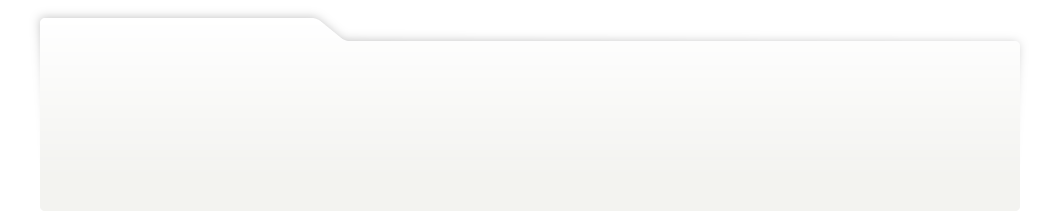
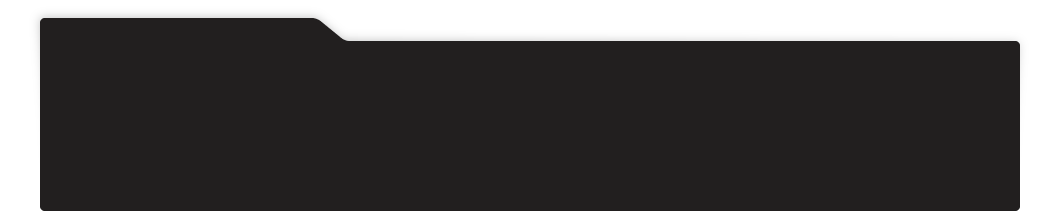
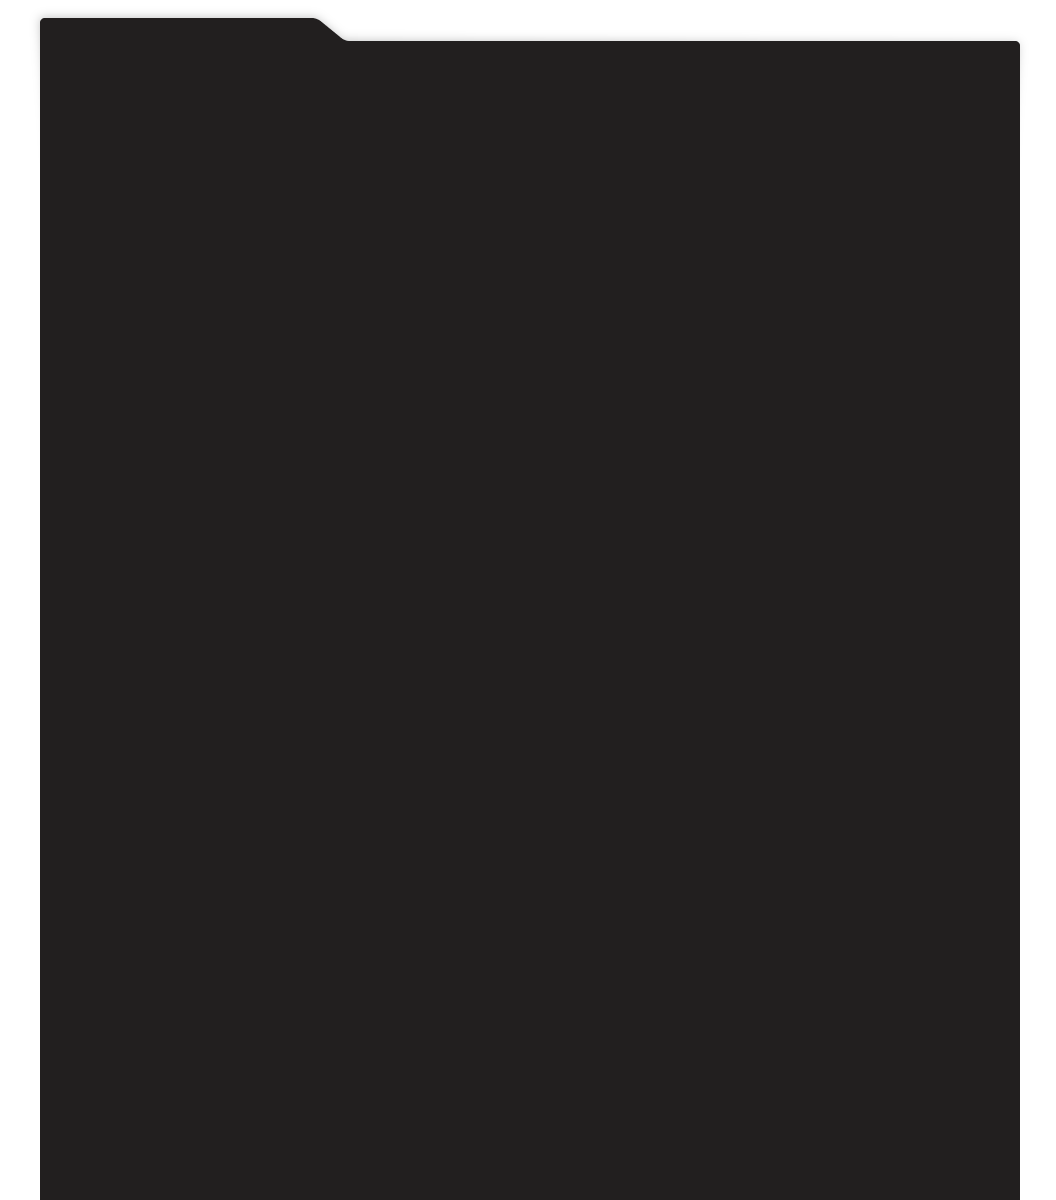
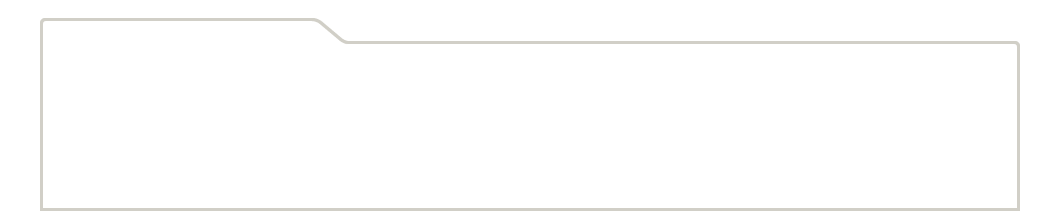
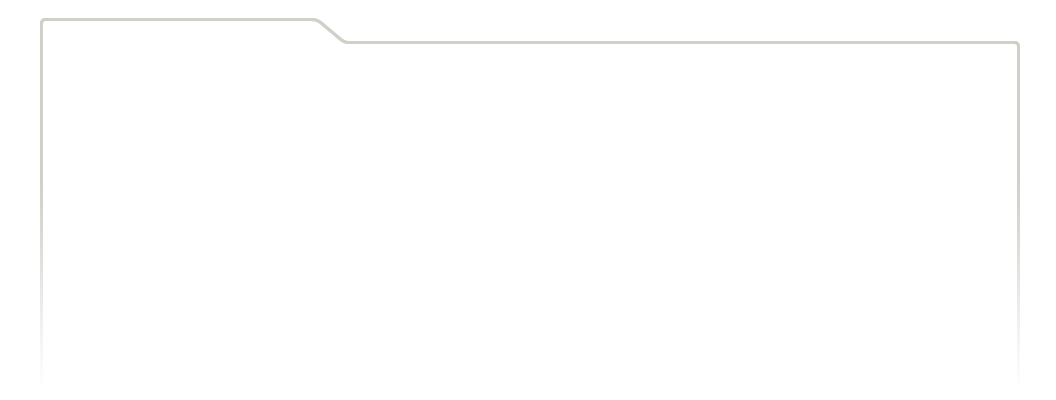
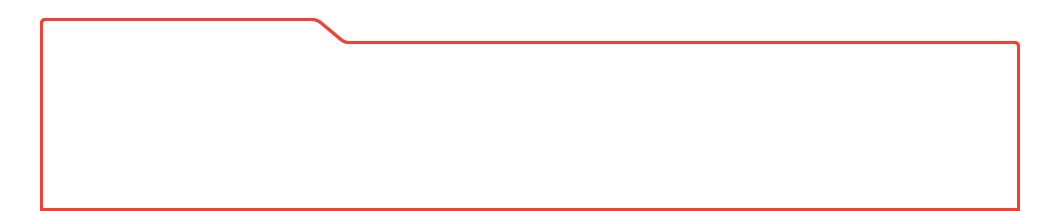
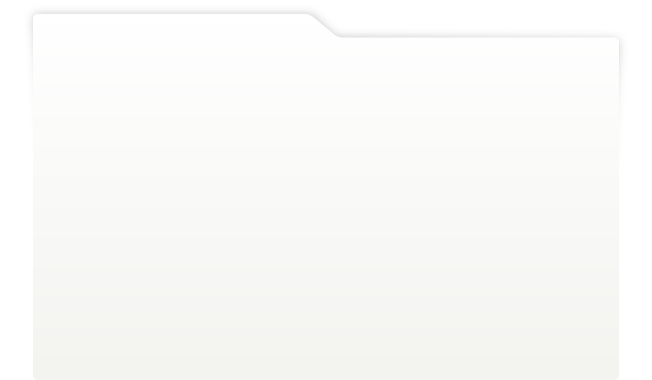
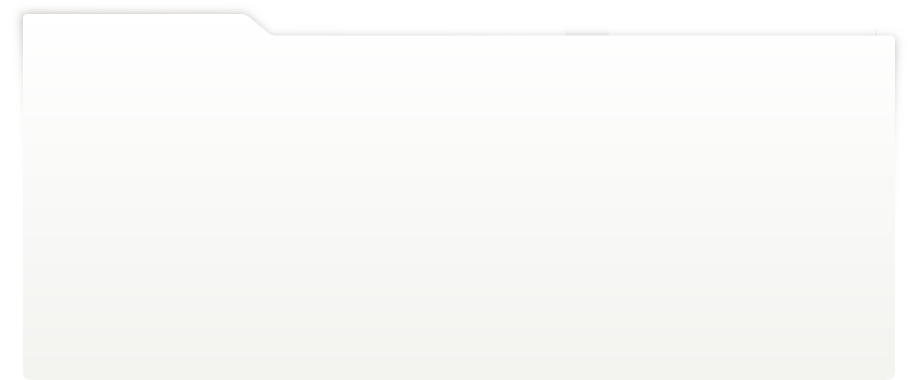
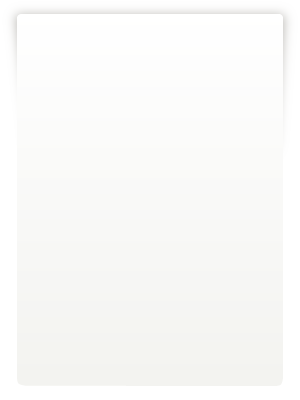
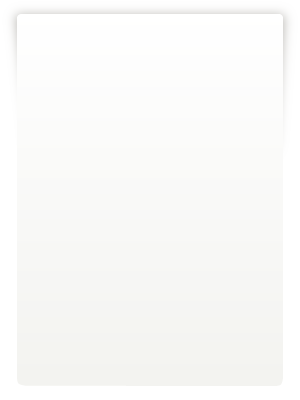
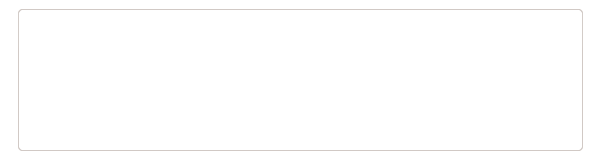
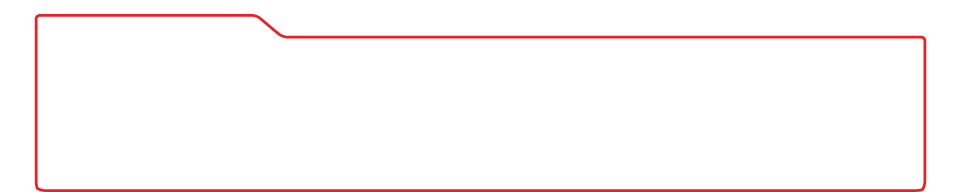
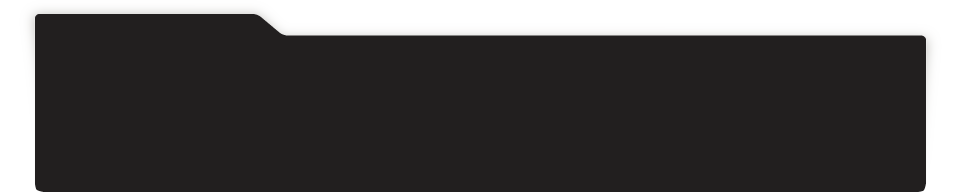
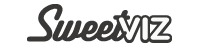
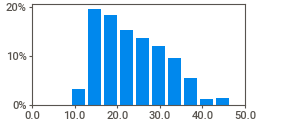
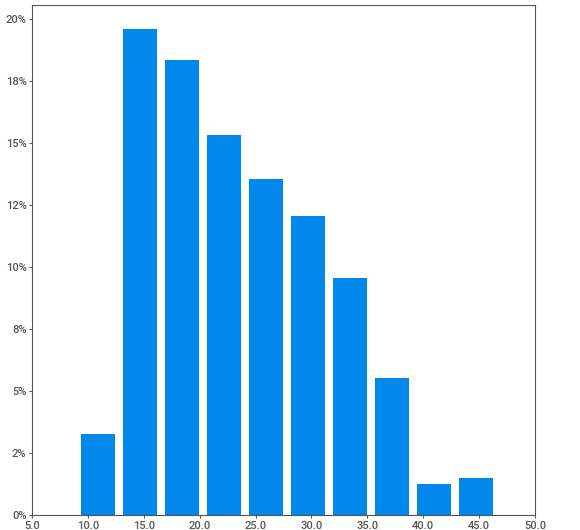
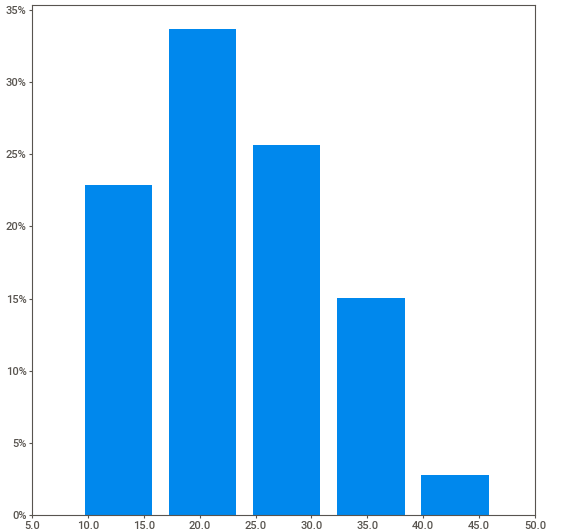
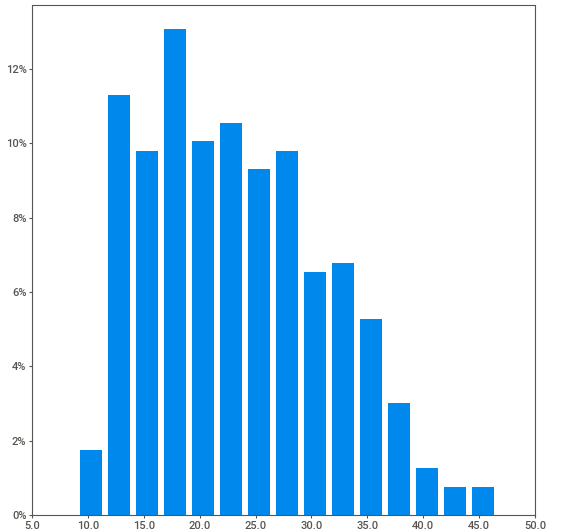
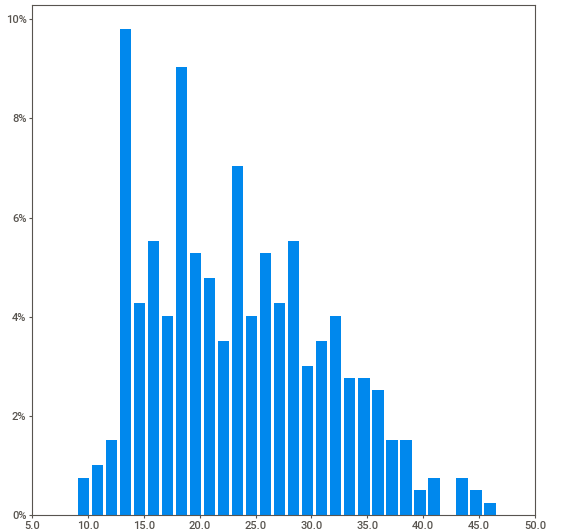
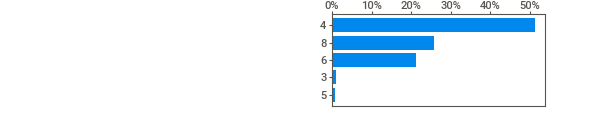
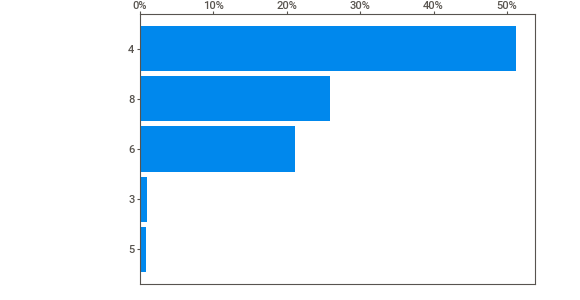
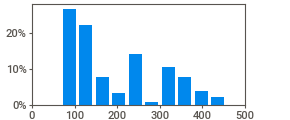
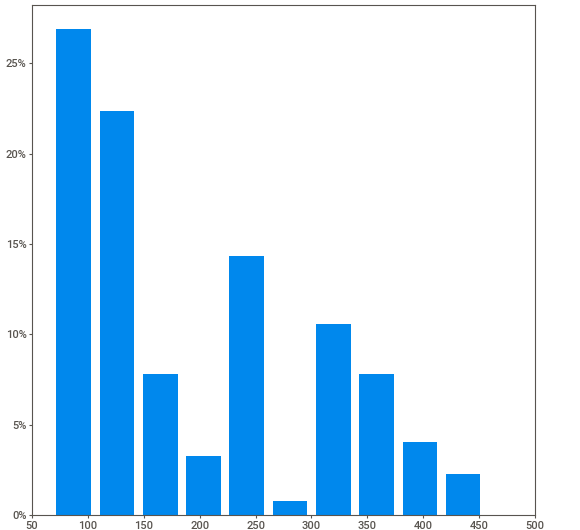
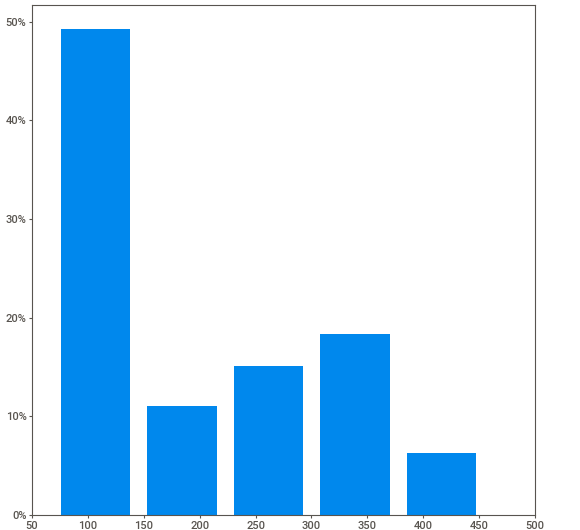
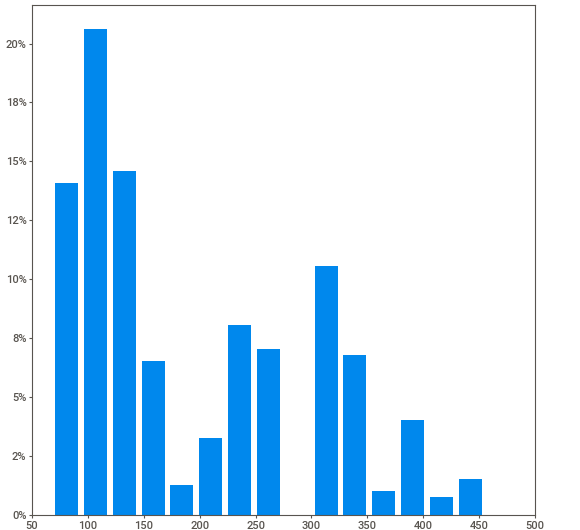
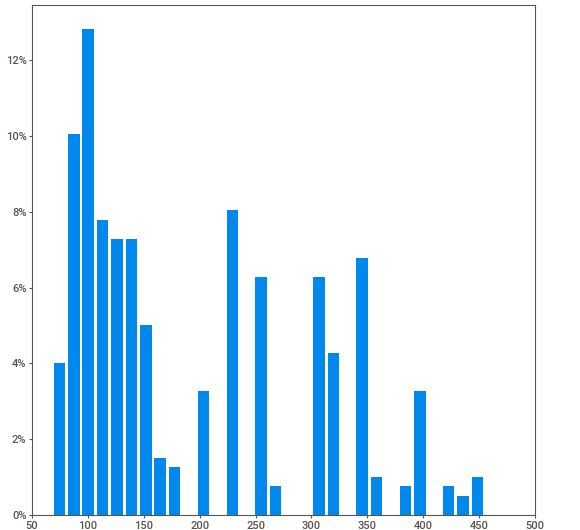
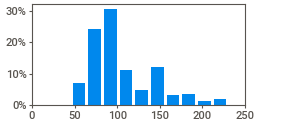
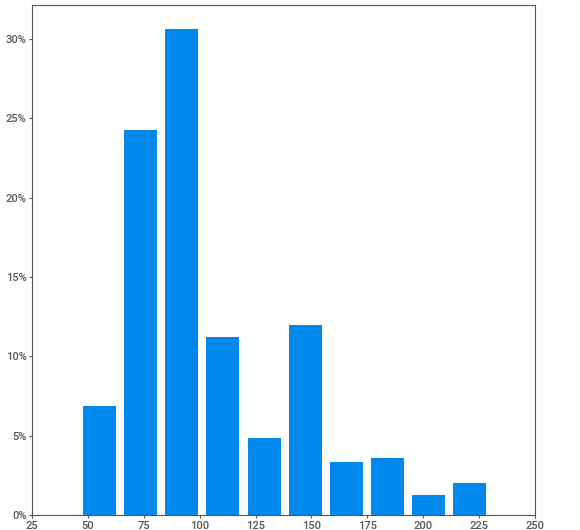
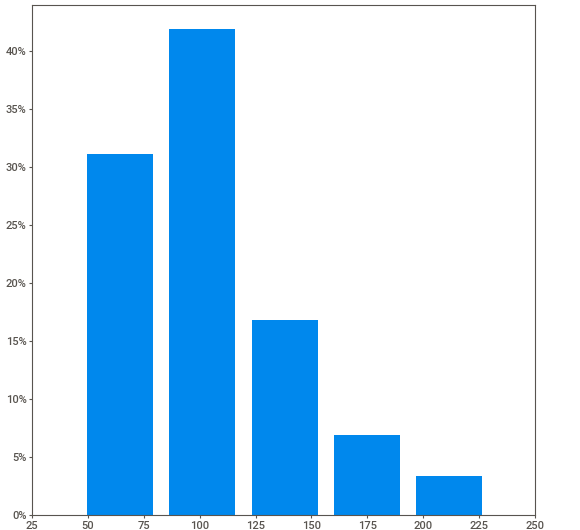
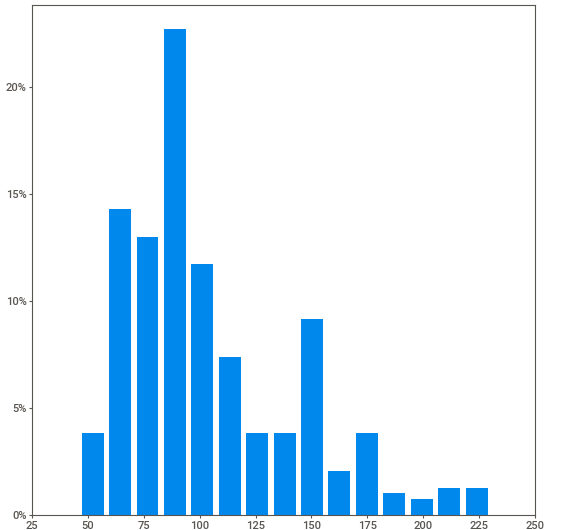
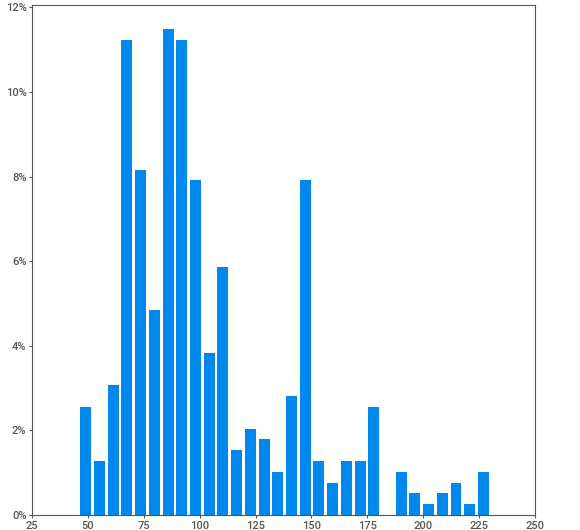
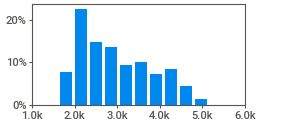
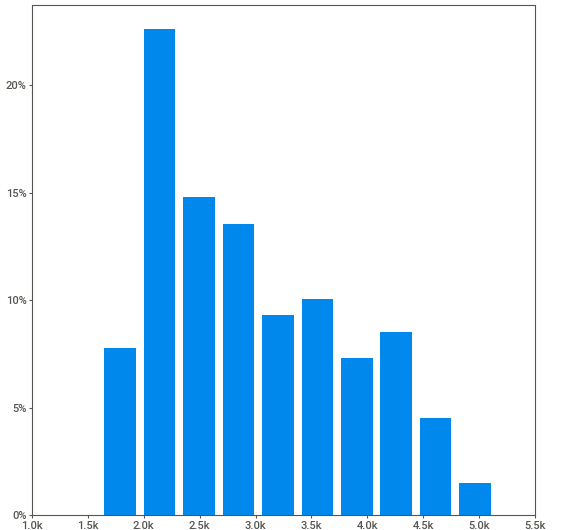
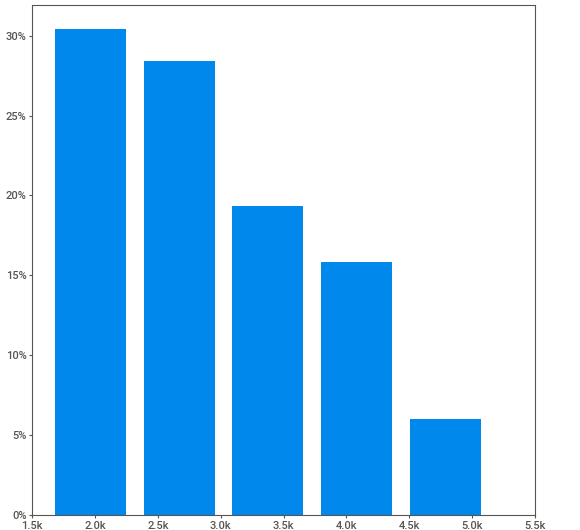
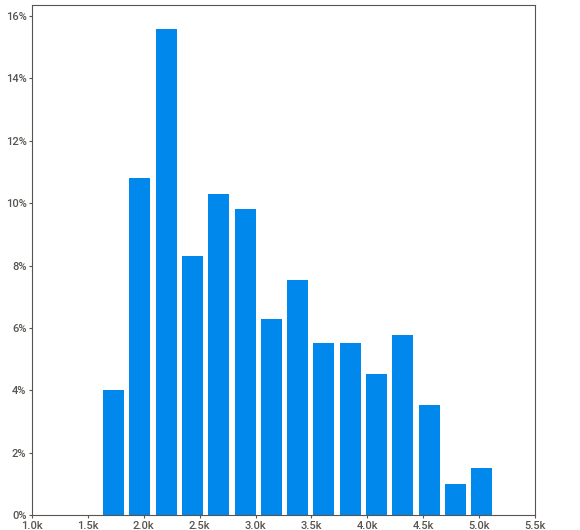
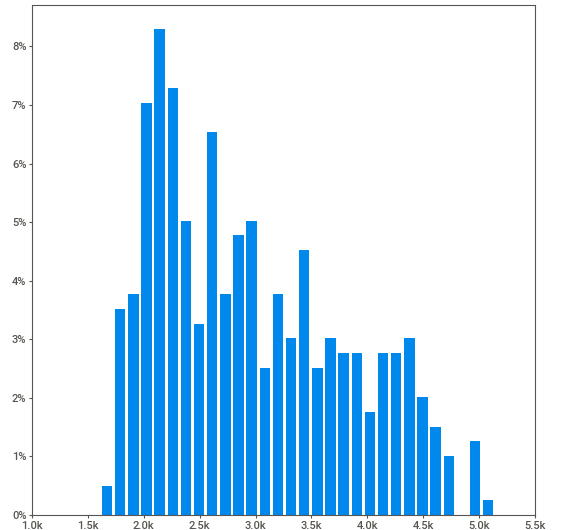
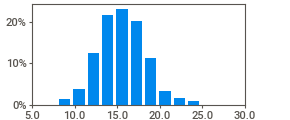
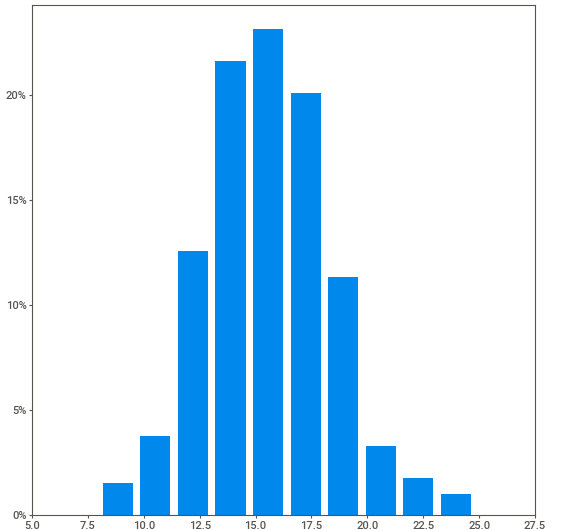
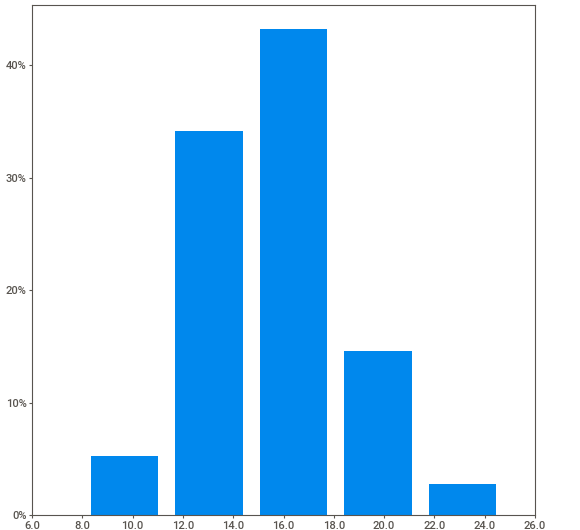
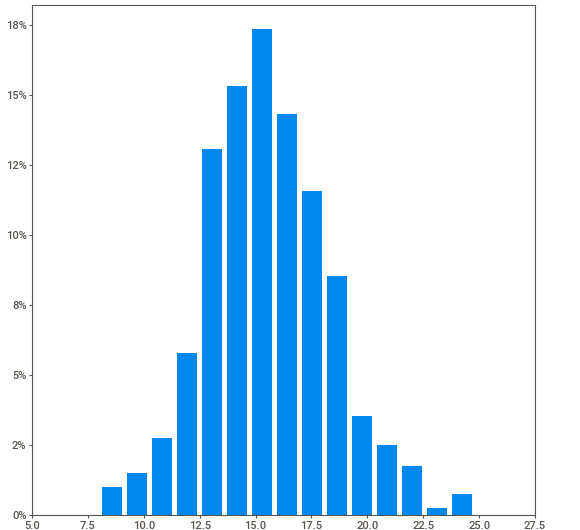
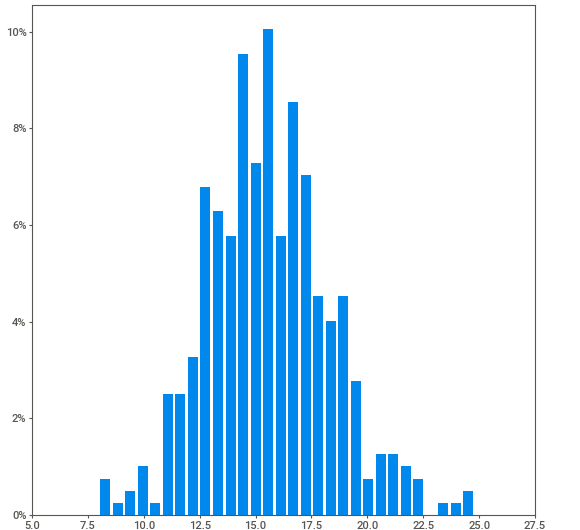
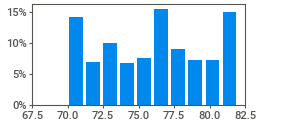
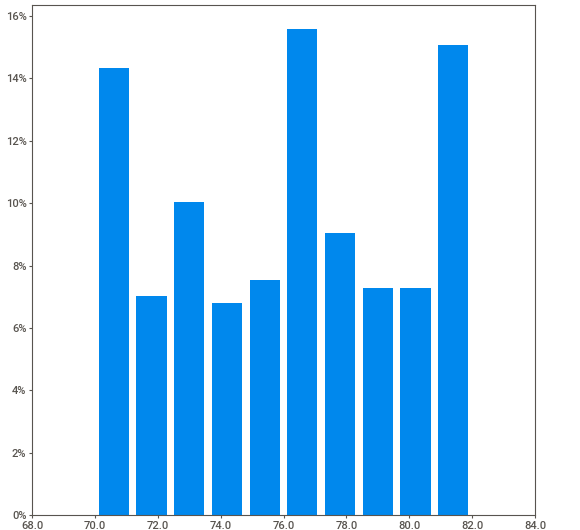
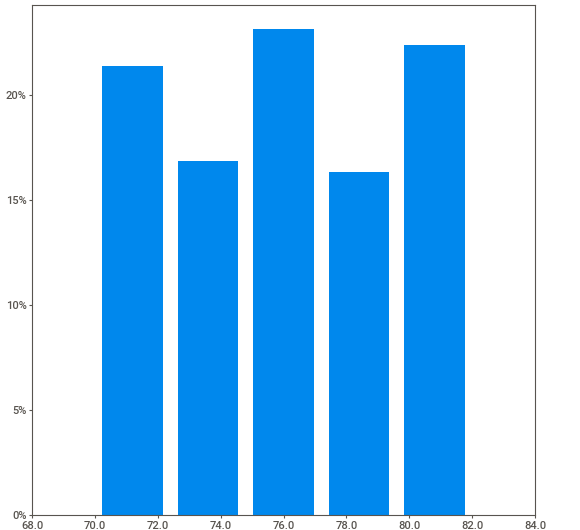
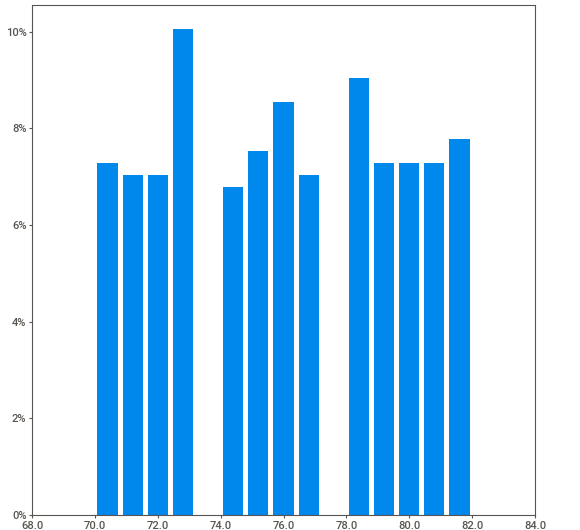
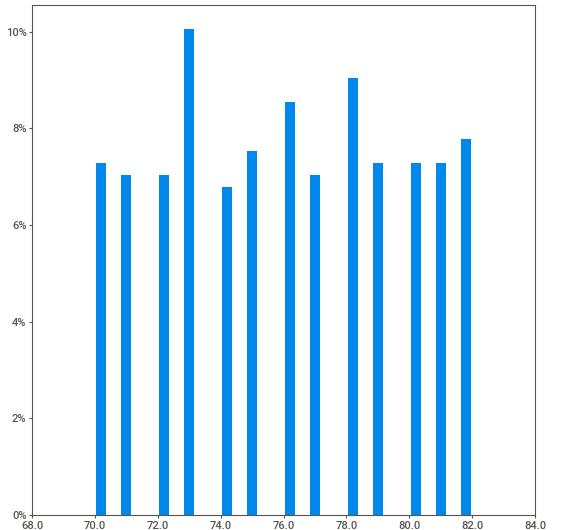
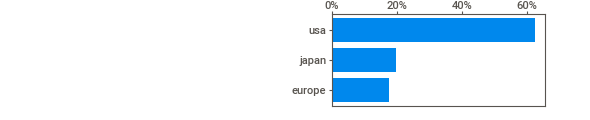
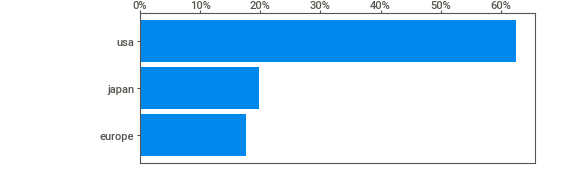
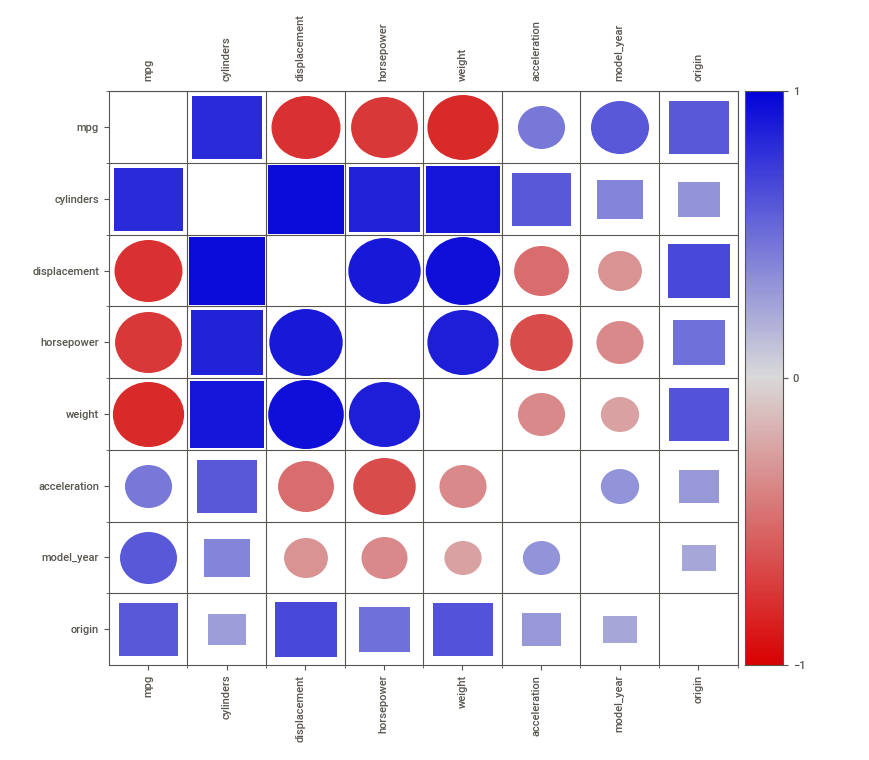
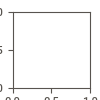

In [33]:
sv_report.show_notebook(w=900, h=450, scale=0.8)

#### Analyze with a target variable

In [34]:
sv_report = sv.analyze(df, "mpg")

                                             |          | [  0%]   00:00 -> (? left)


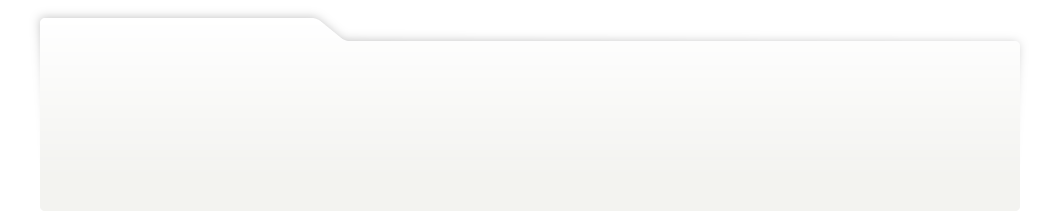
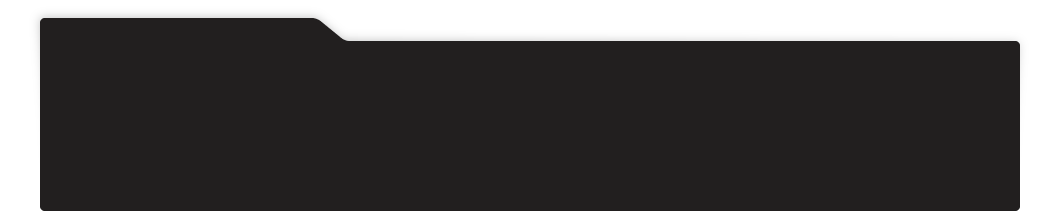
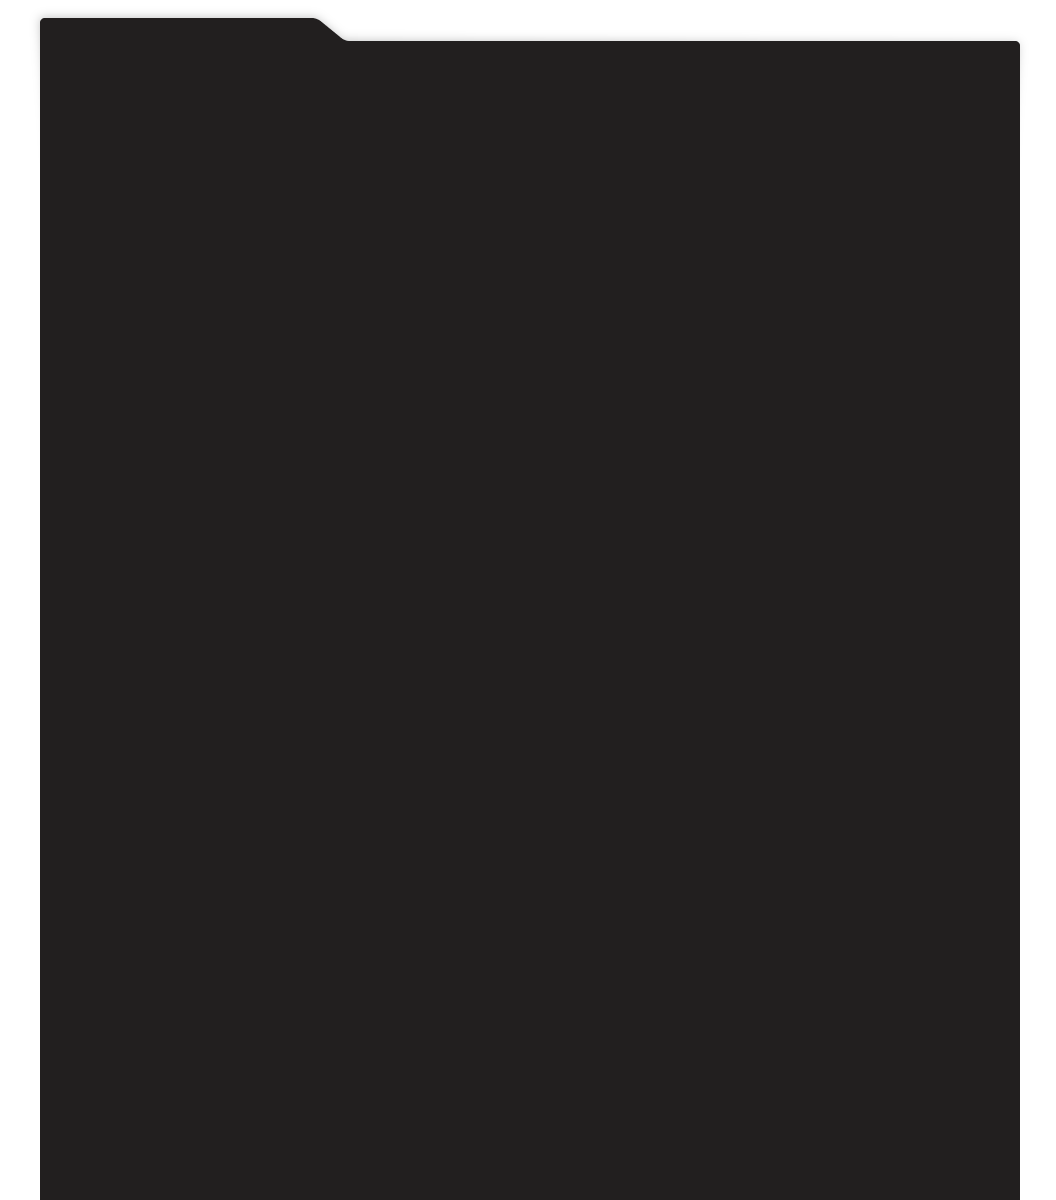
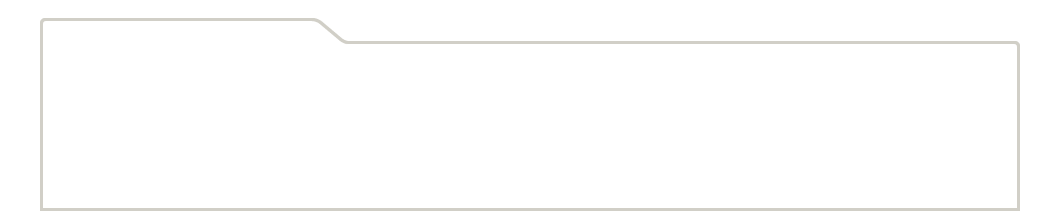
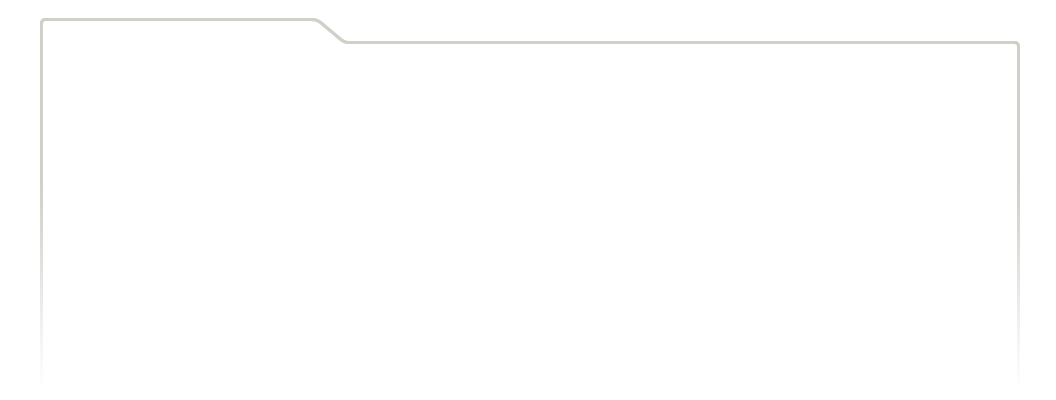
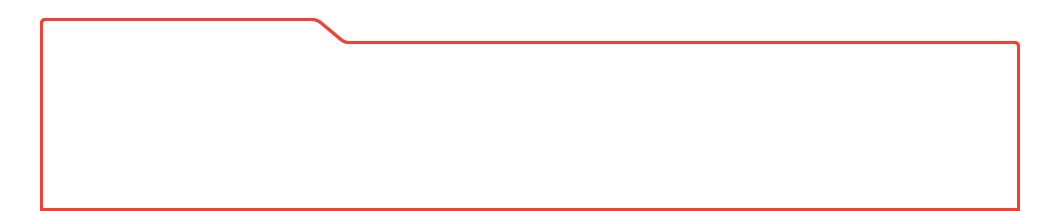
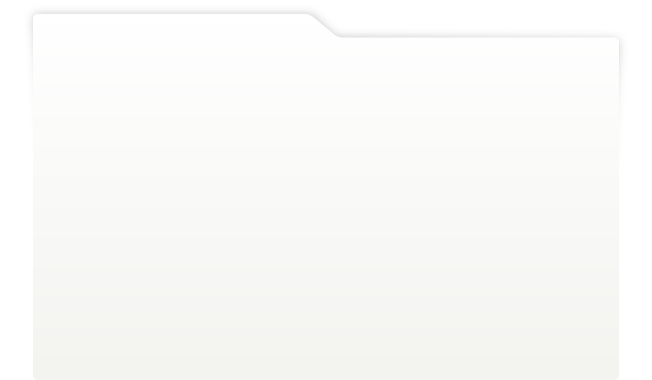
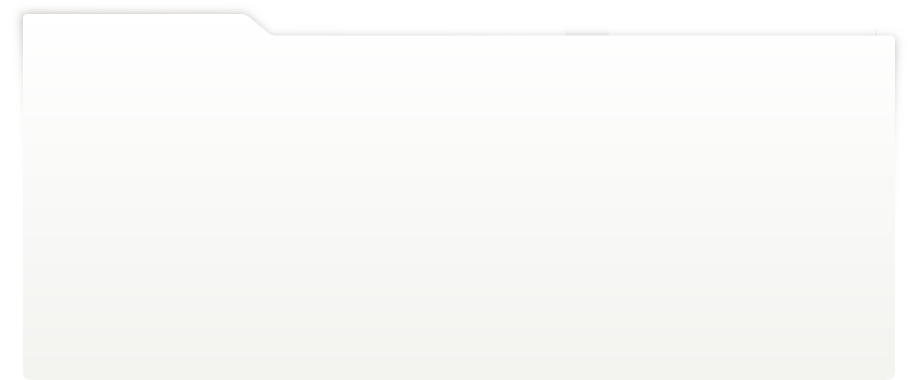
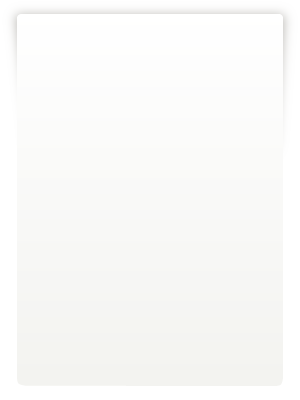
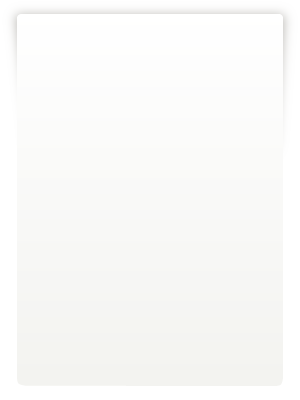
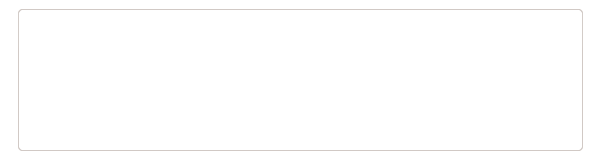
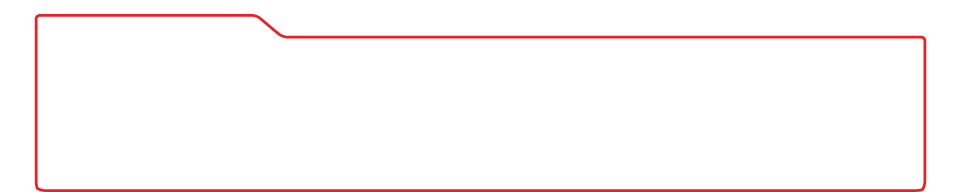
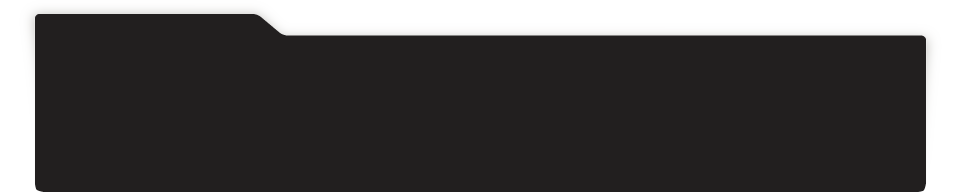
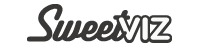
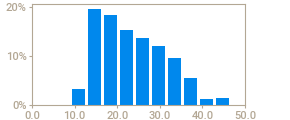
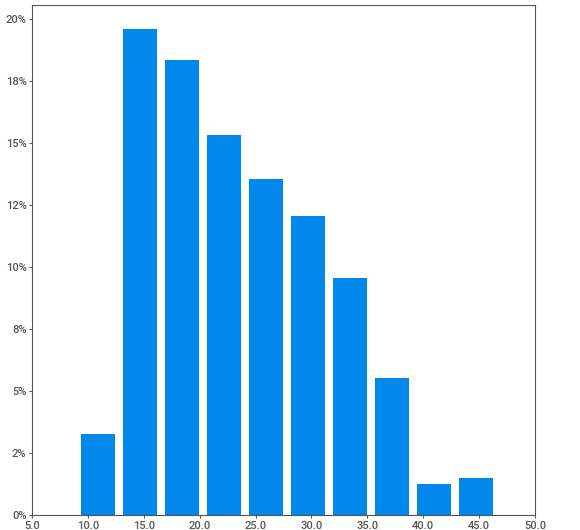
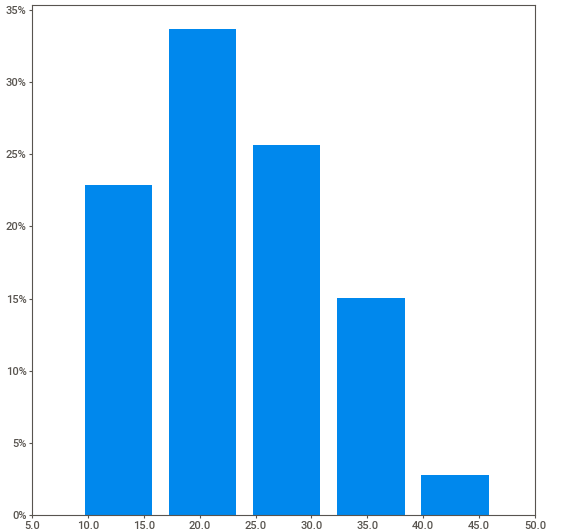
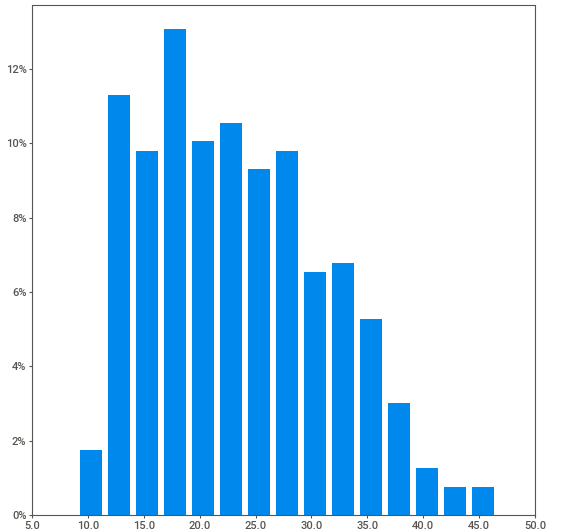
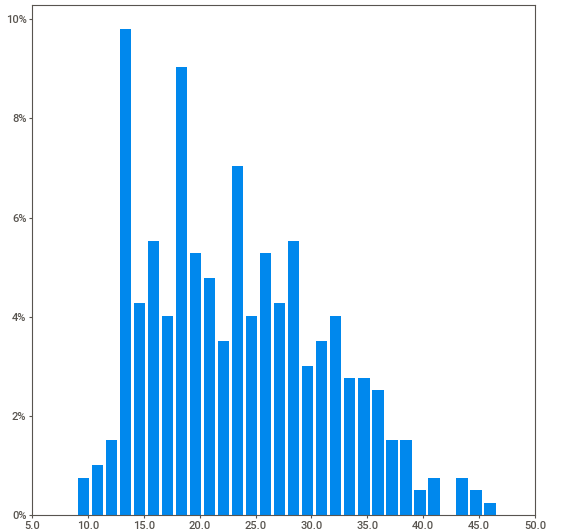
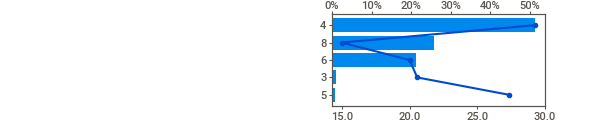
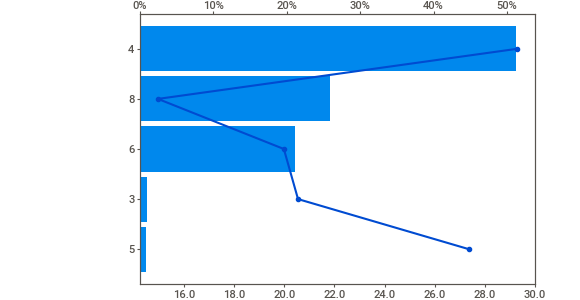
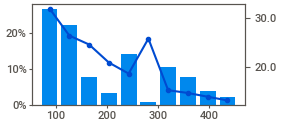
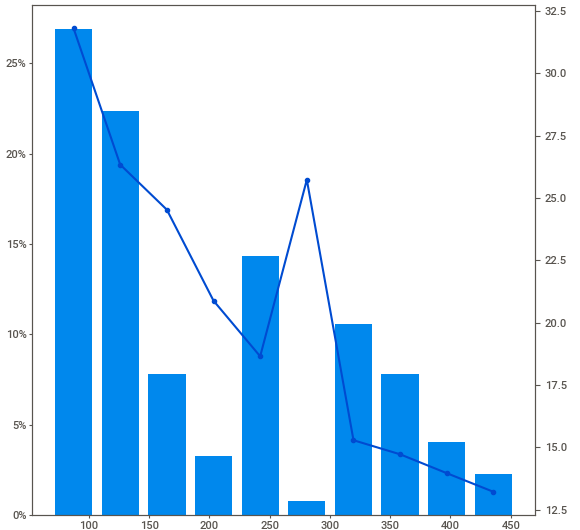
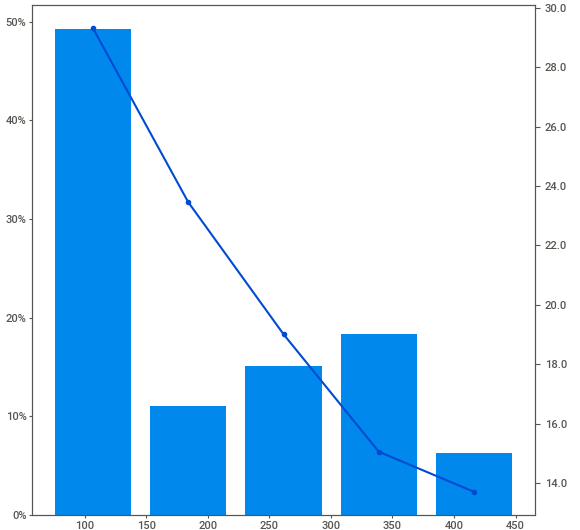
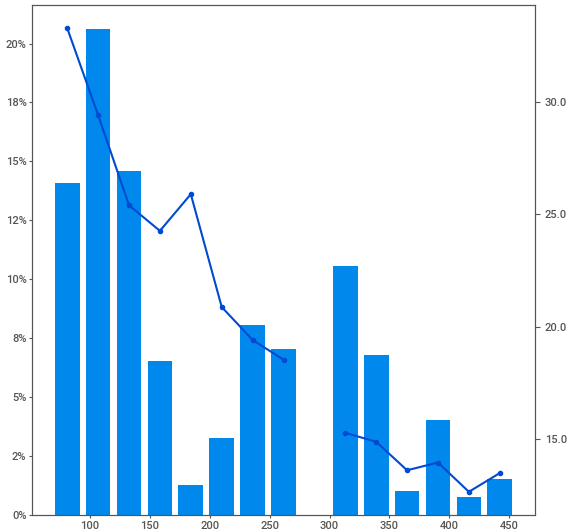
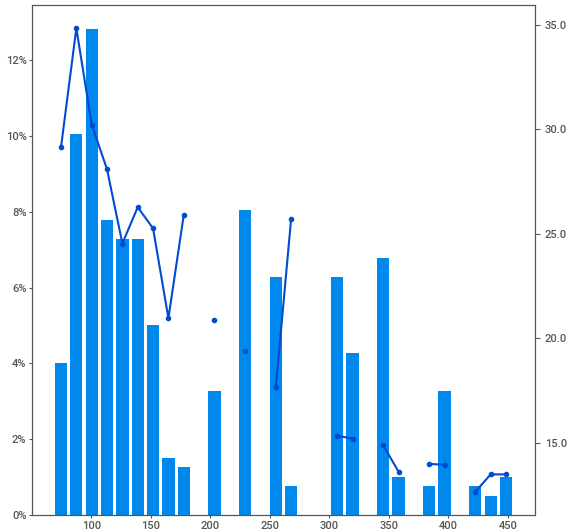
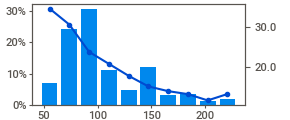
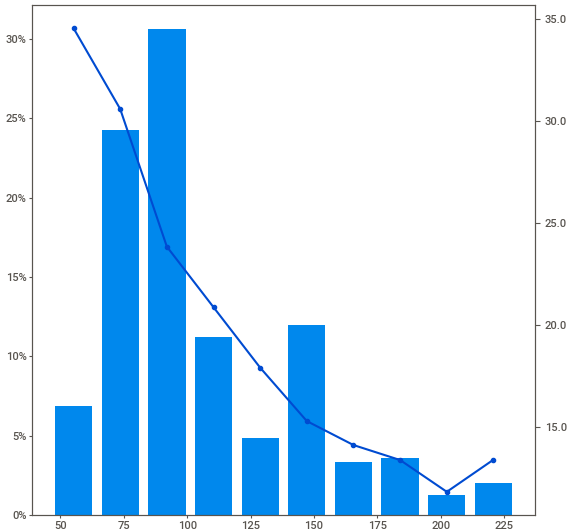
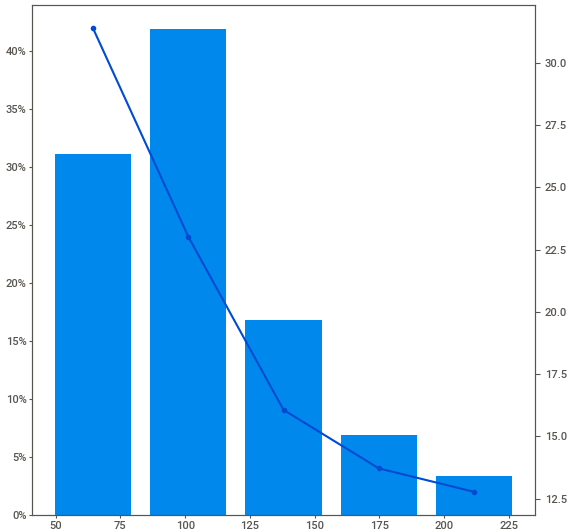
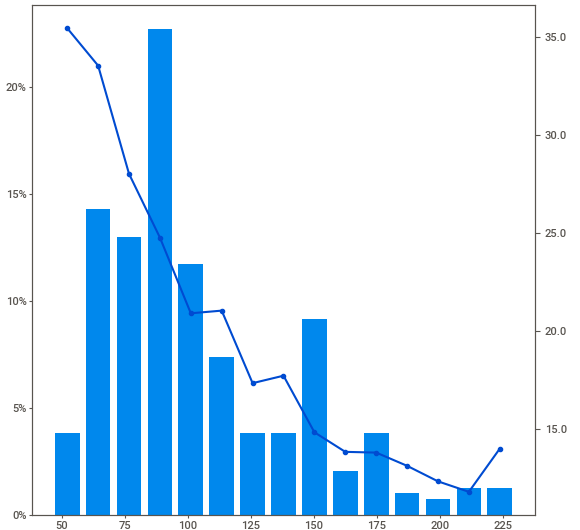
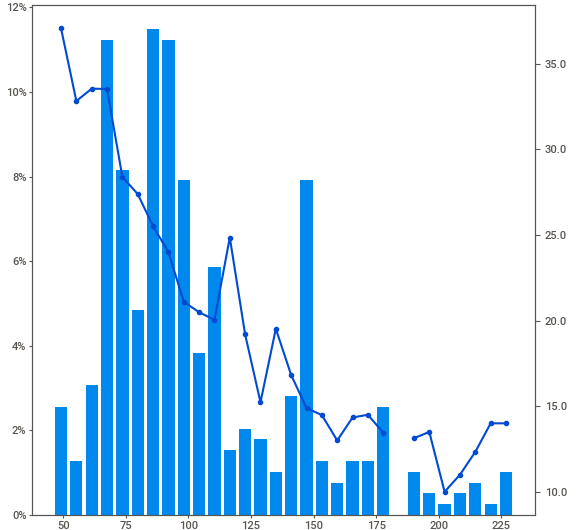
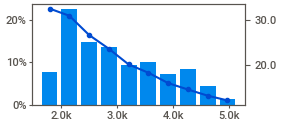
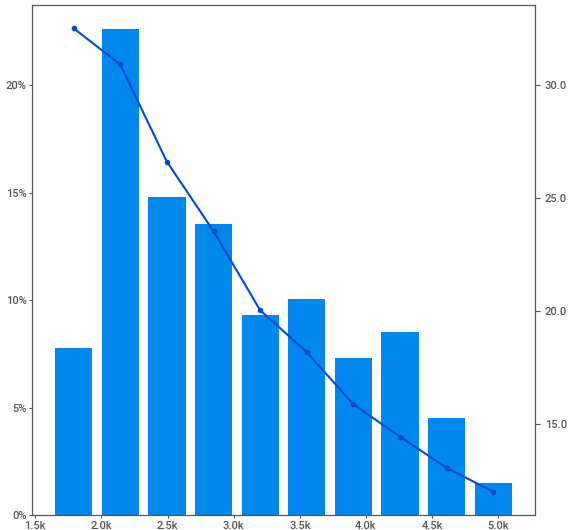
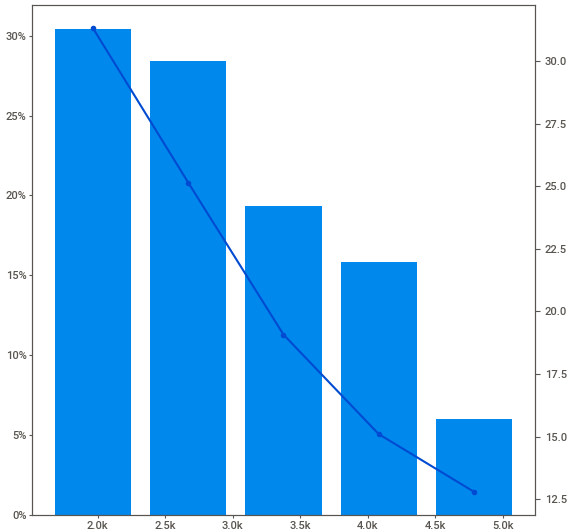
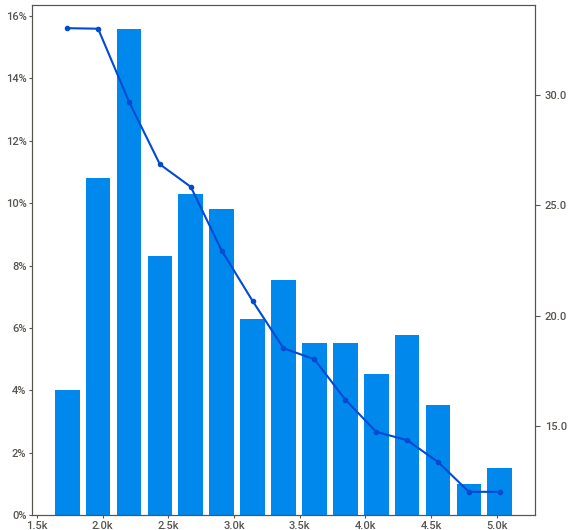
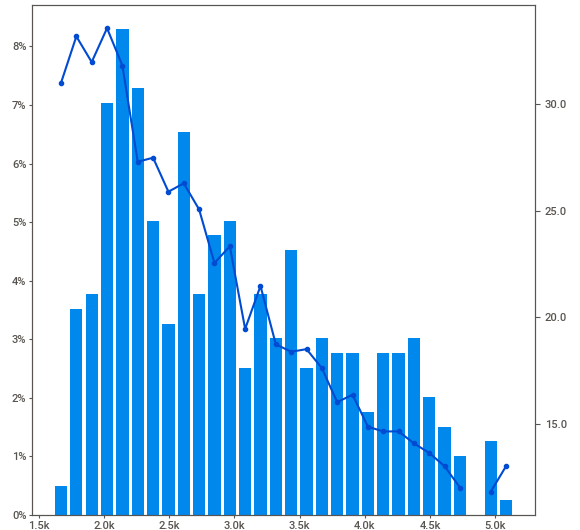
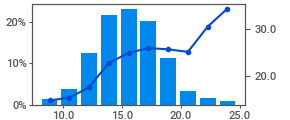
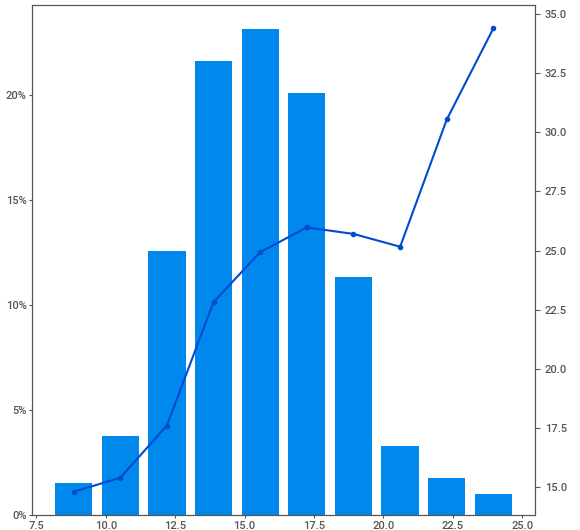
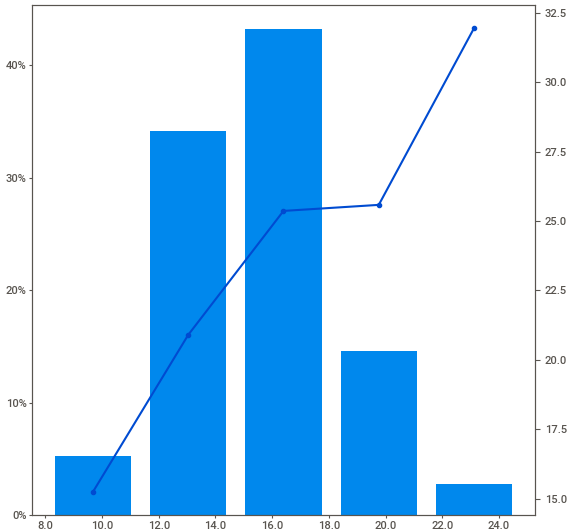
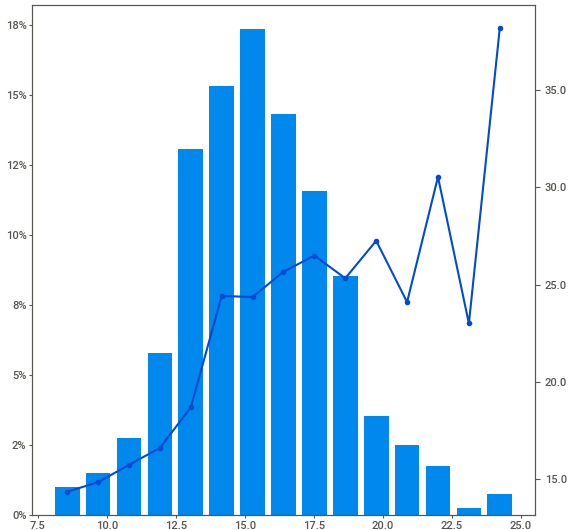
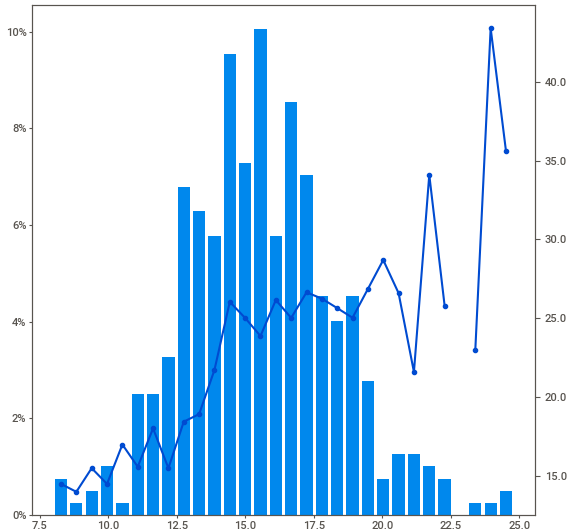
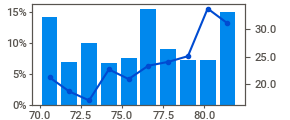
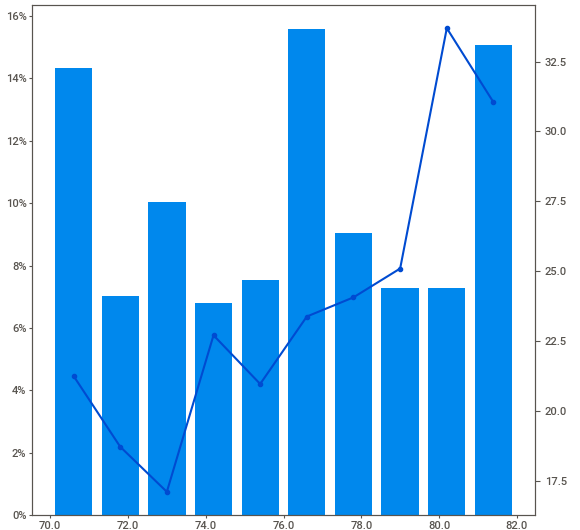
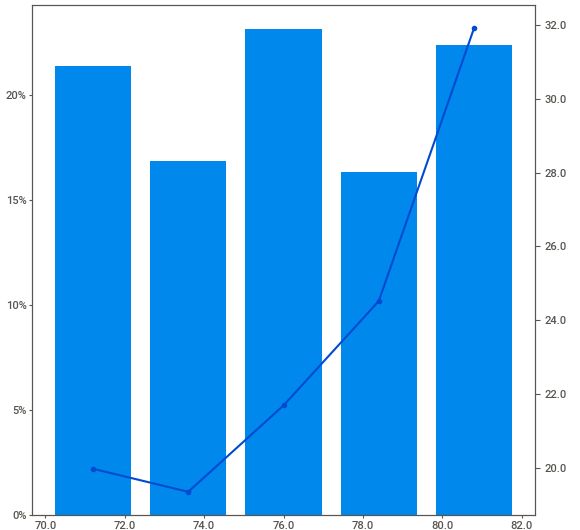
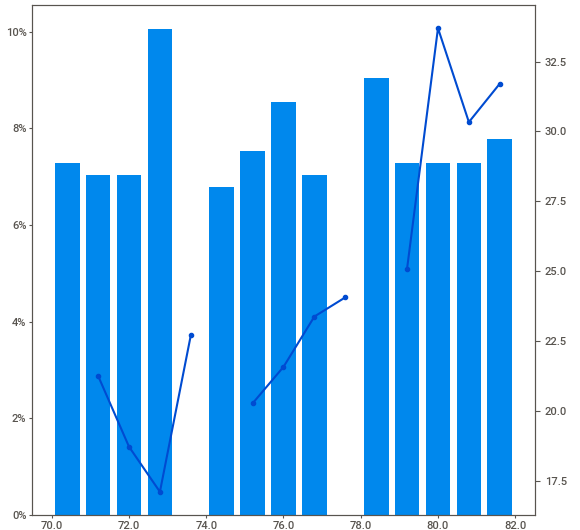
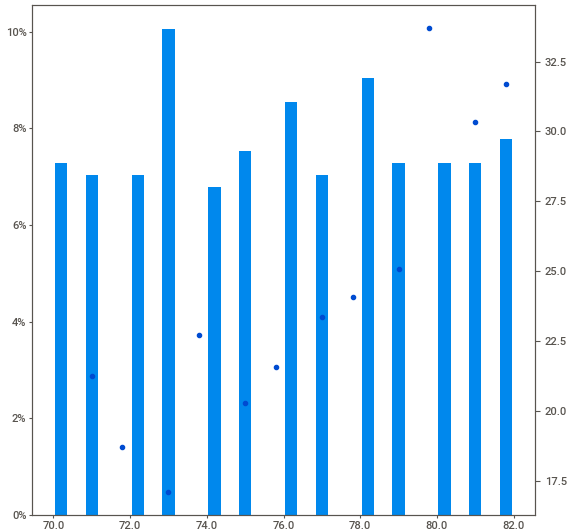
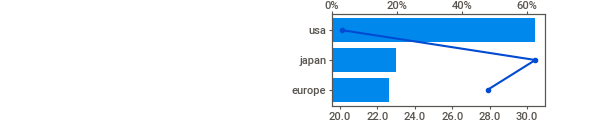
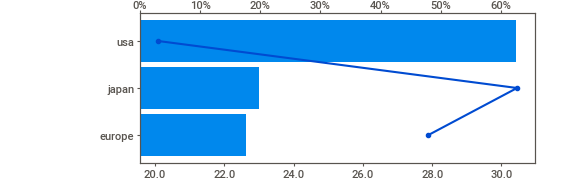
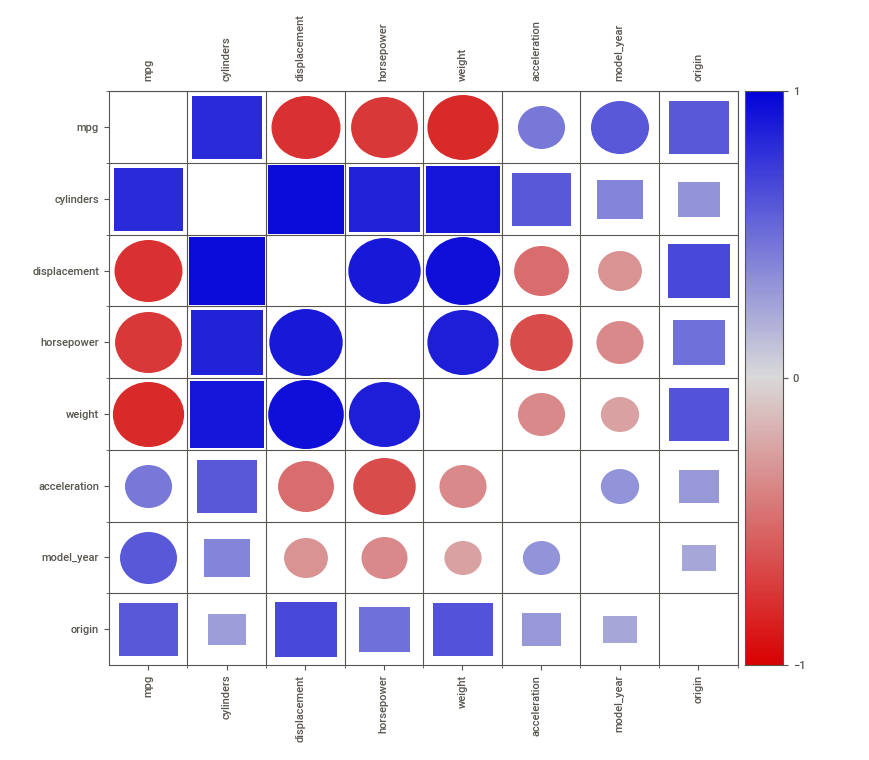
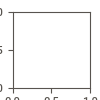

In [35]:
sv_report.show_notebook(w=900, h=450, scale=0.8)

### Compare two datasets

In [36]:
df1 = df.query("model_year < 76")
df2 = df.query("model_year >= 76")

In [37]:
sv_report = sv.compare(source = [df1, "< 76"], compare = [df2,">= 76"])

                                             |          | [  0%]   00:00 -> (? left)


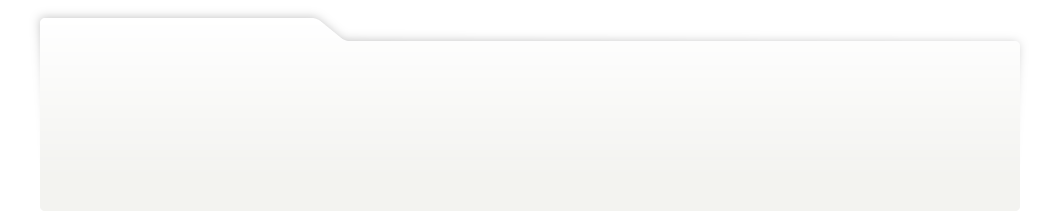
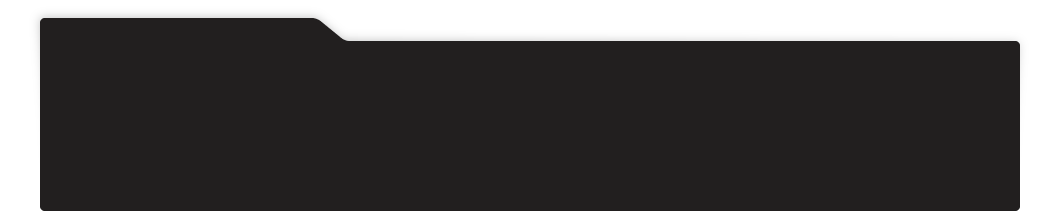
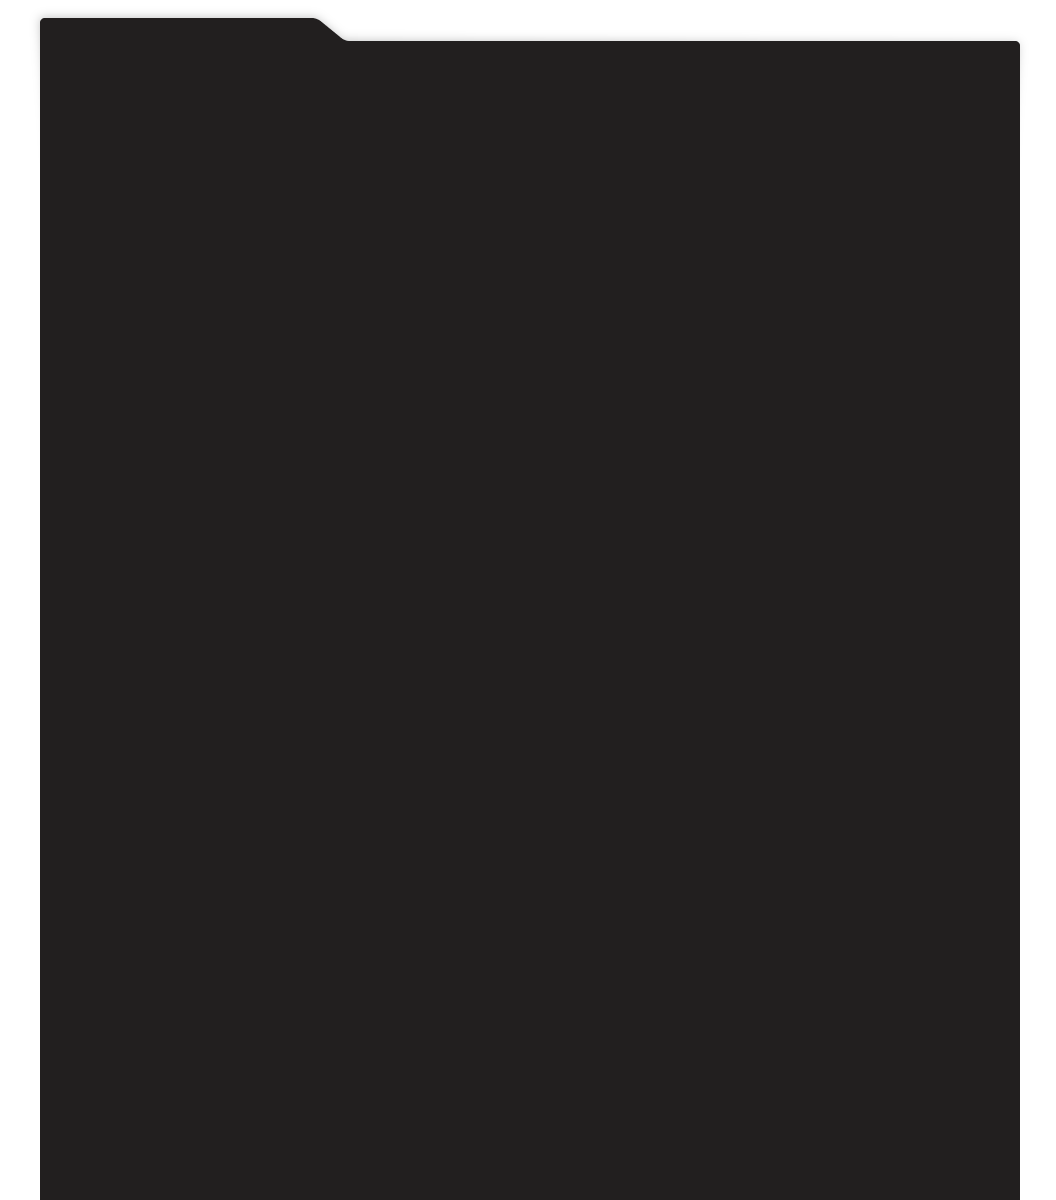
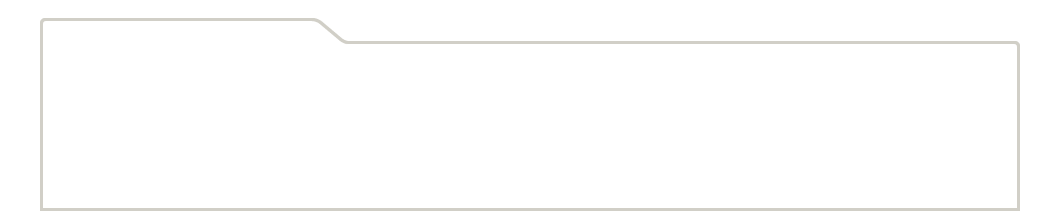
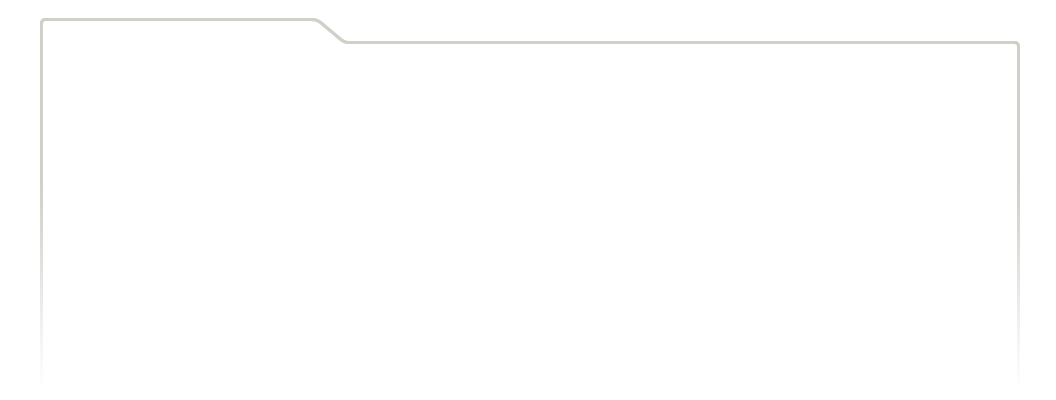
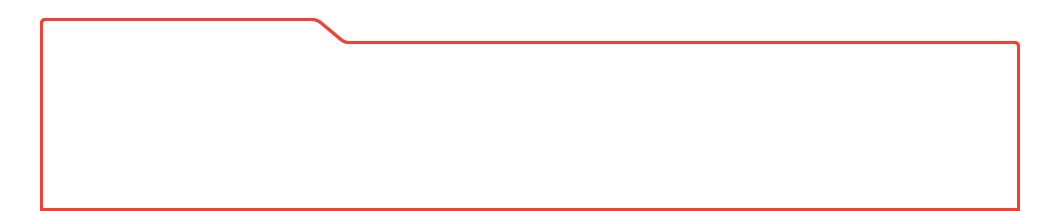
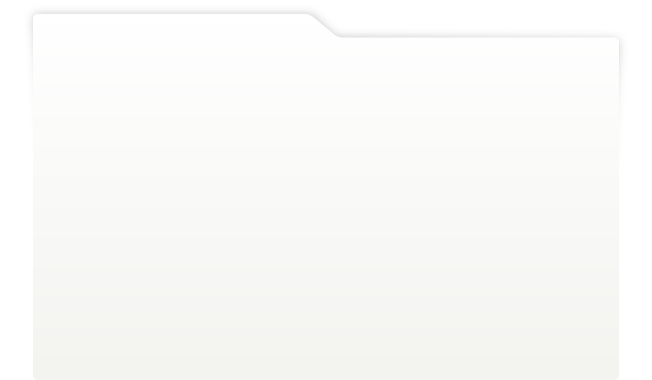
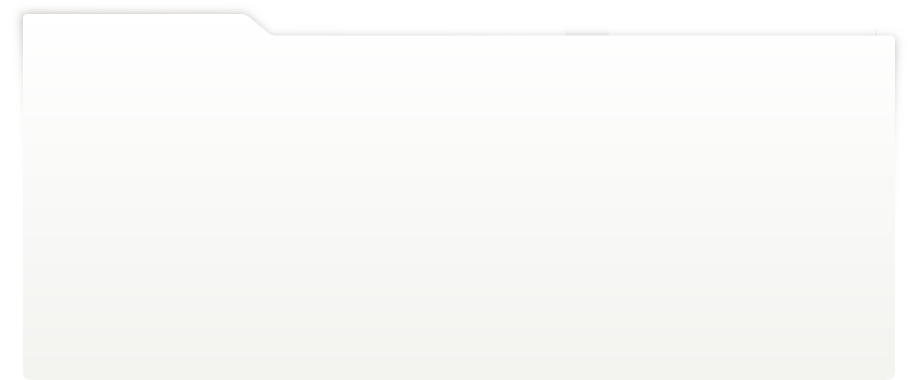
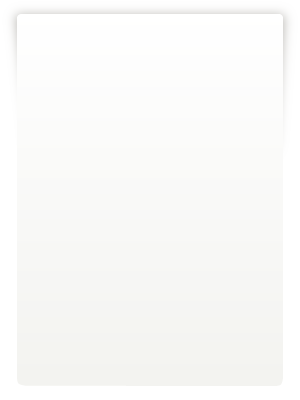
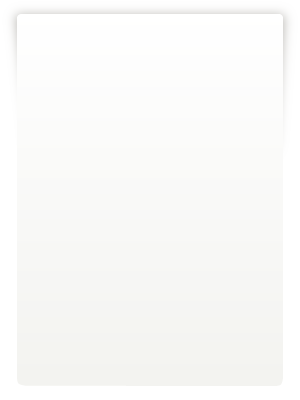
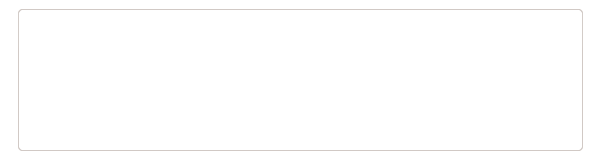
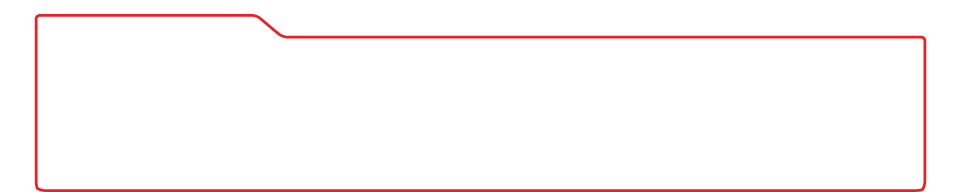
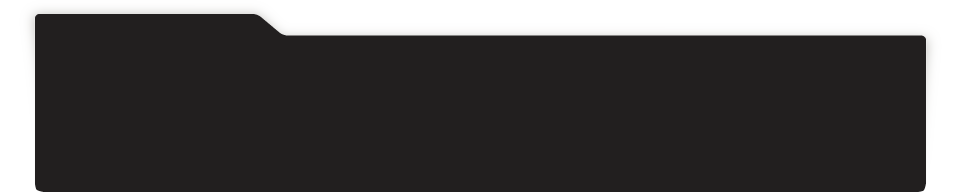
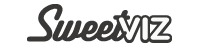
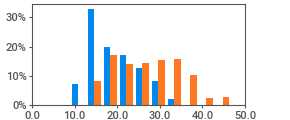
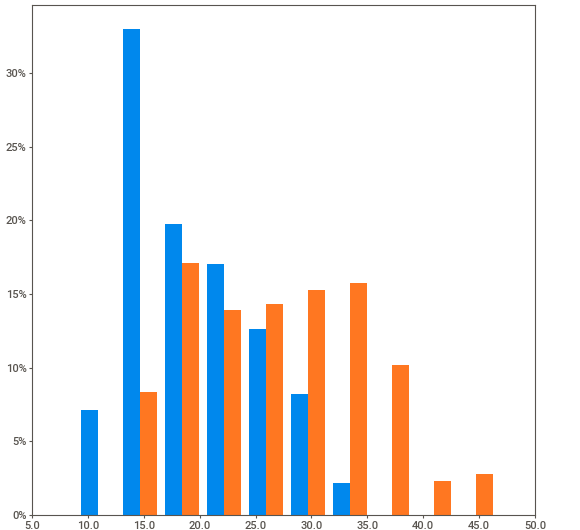
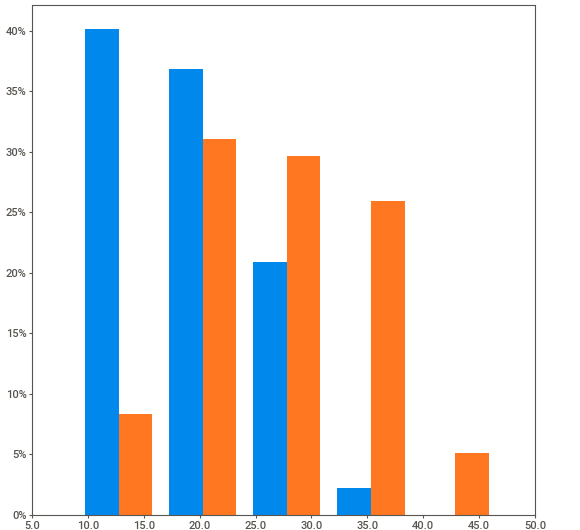
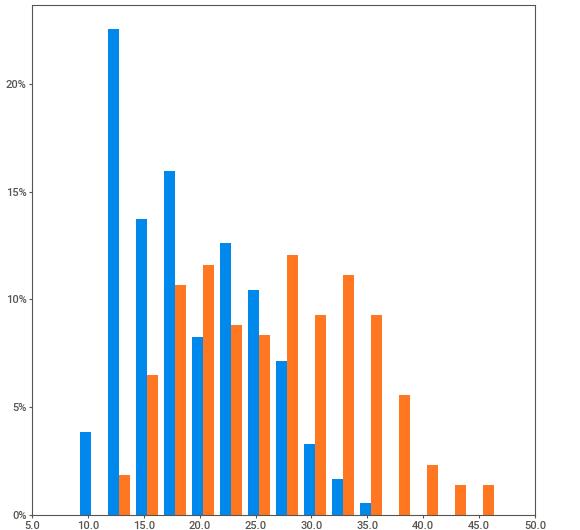
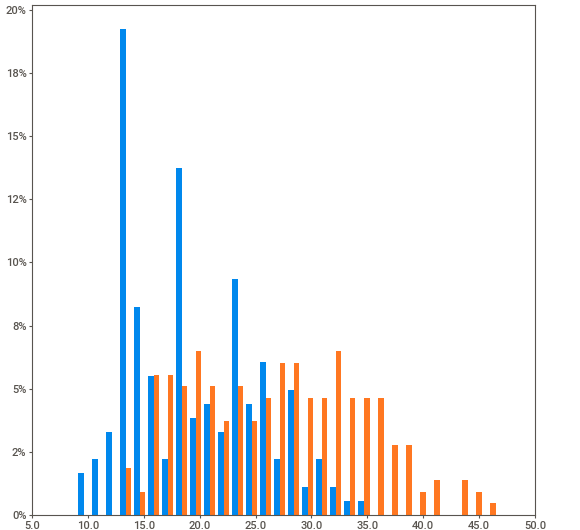
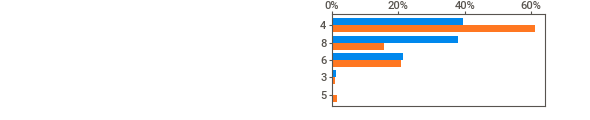
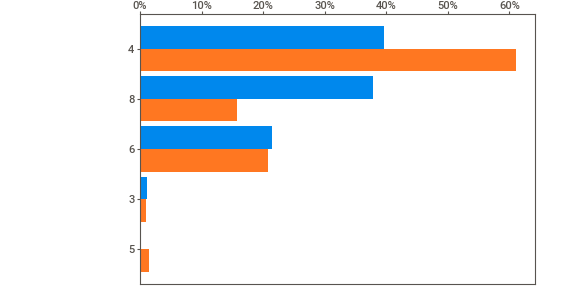
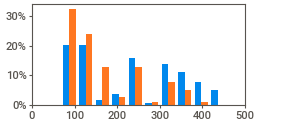
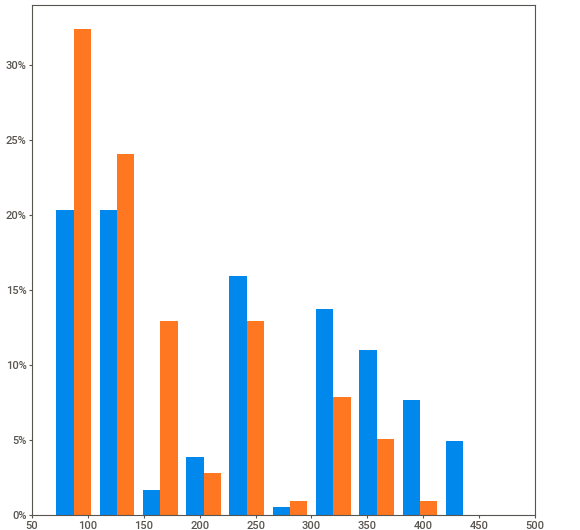
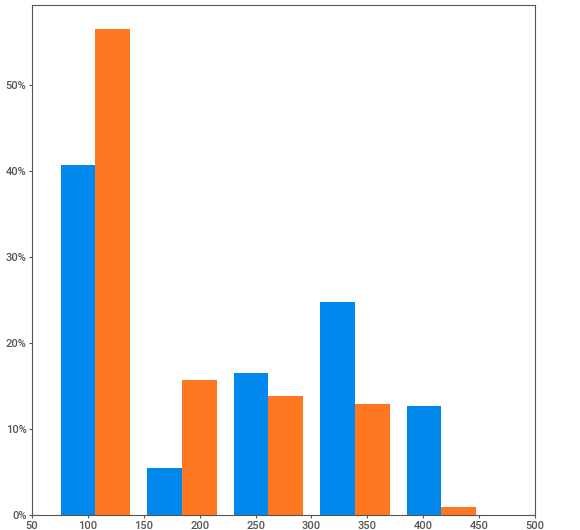
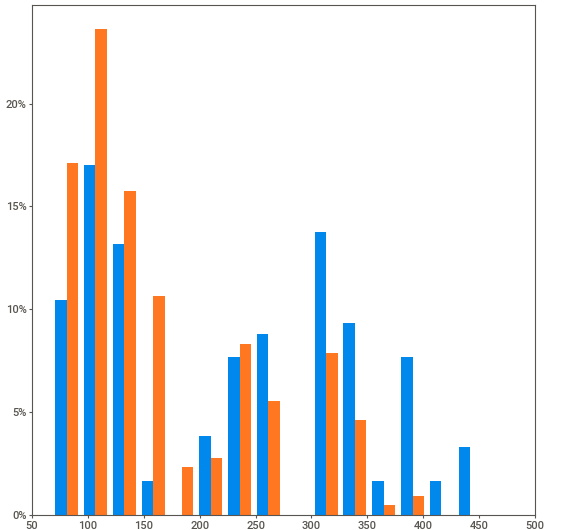
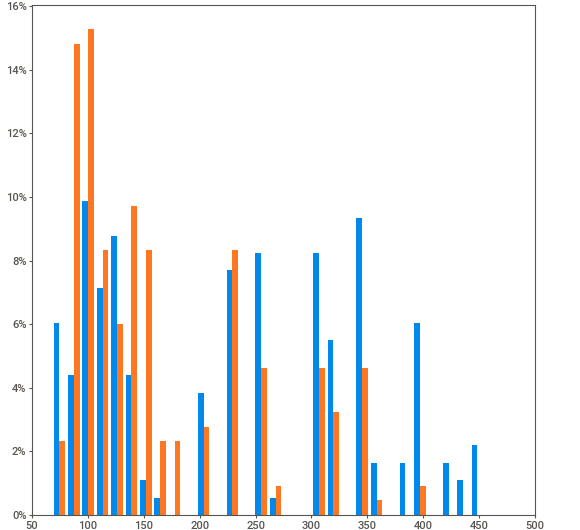
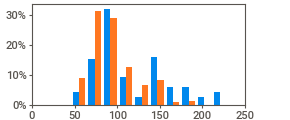
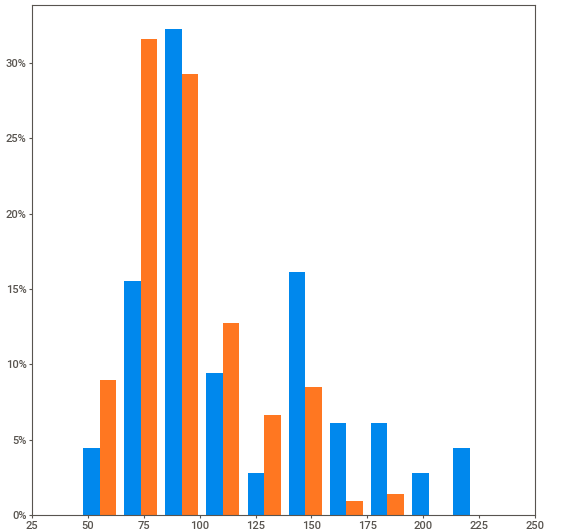
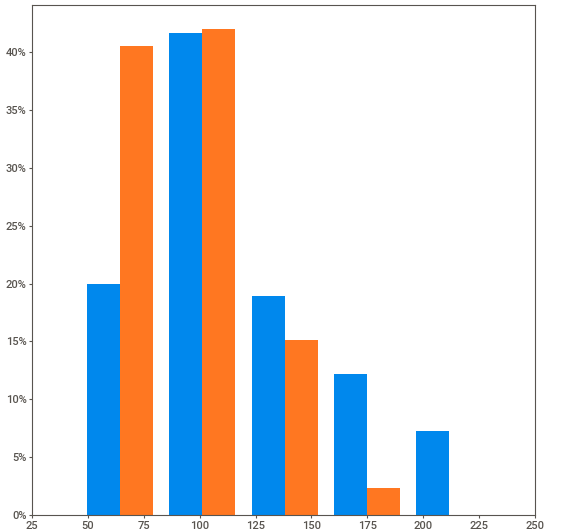
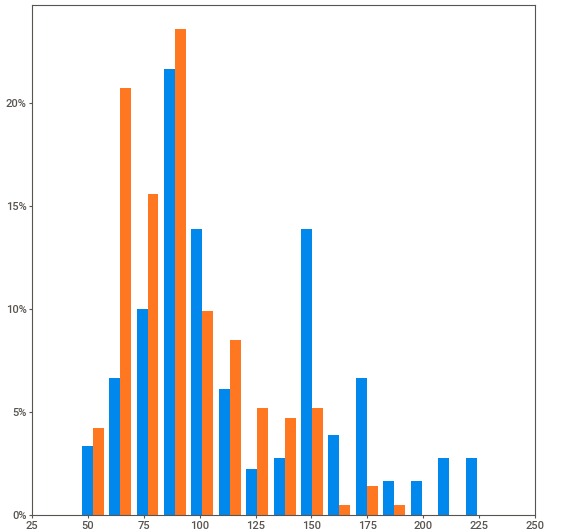
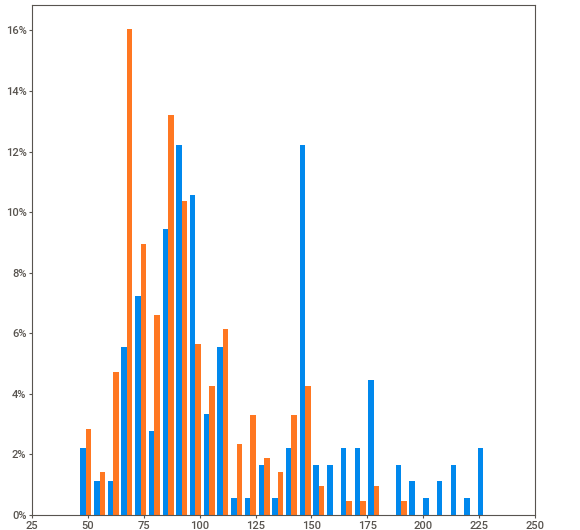
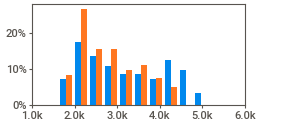
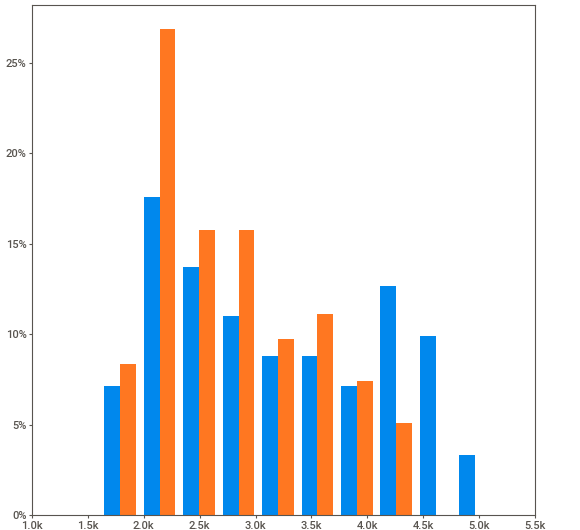
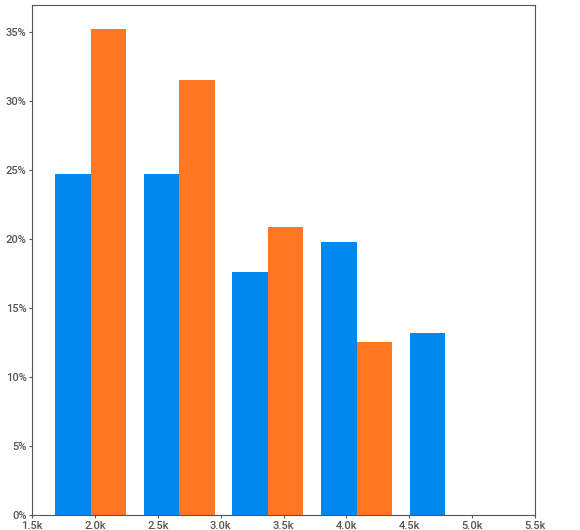
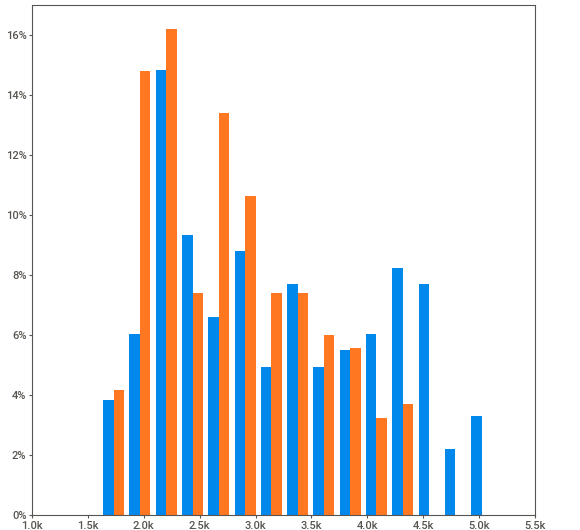
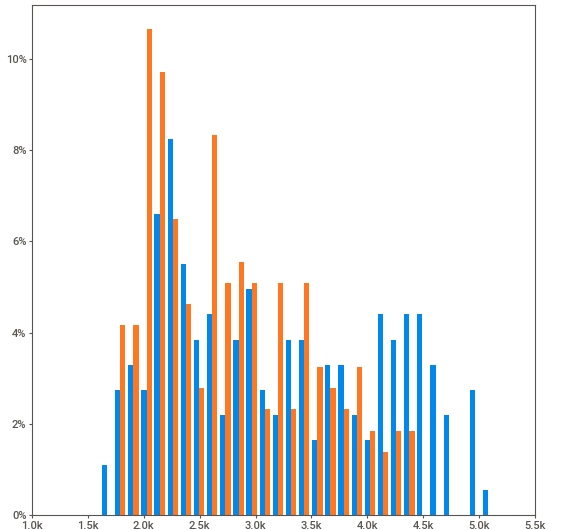
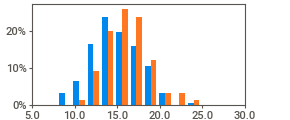
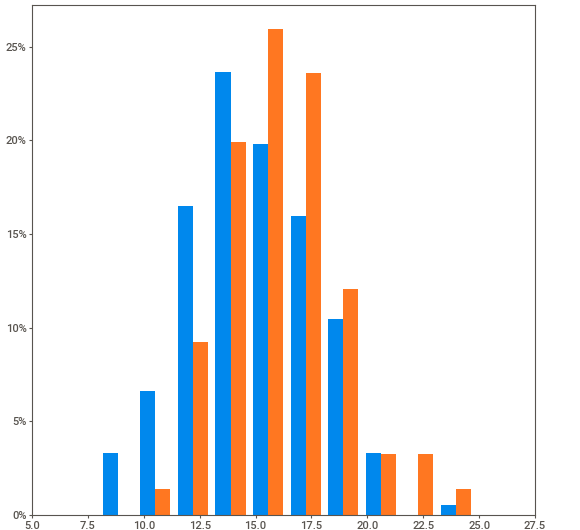
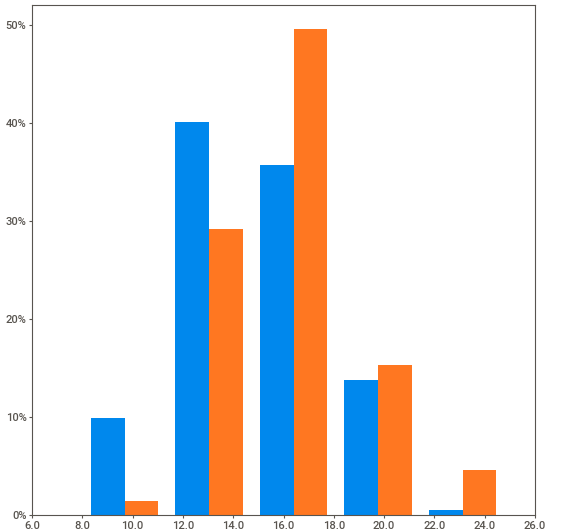
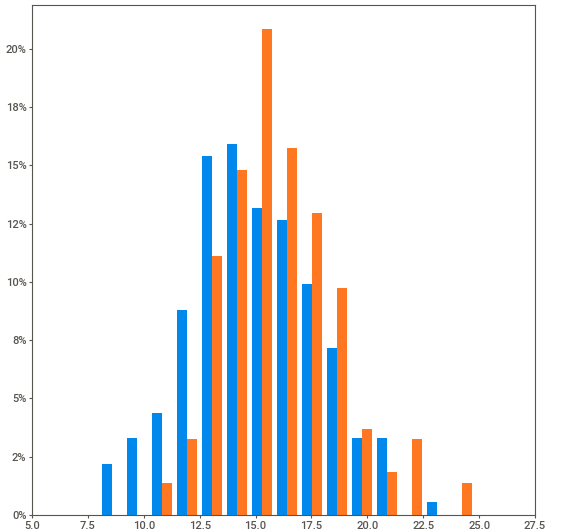
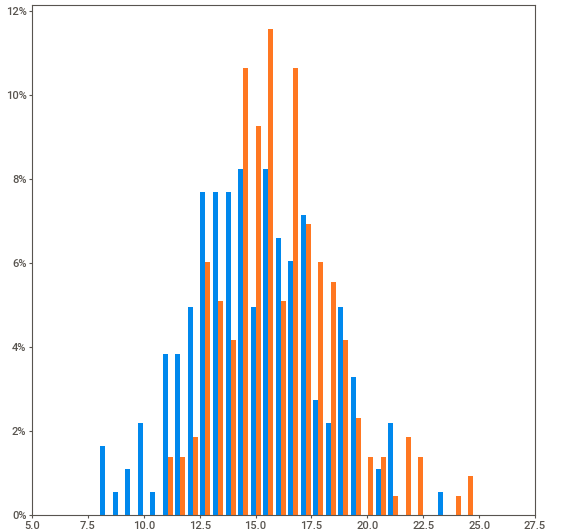
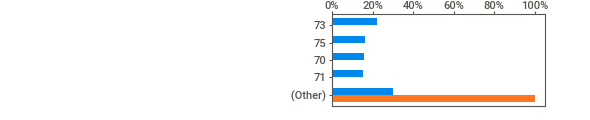
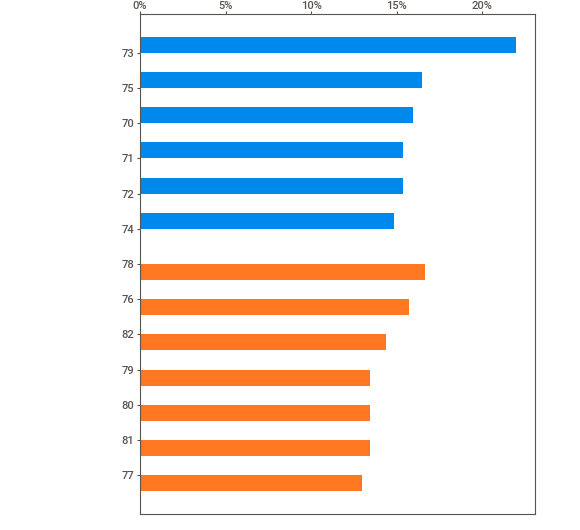
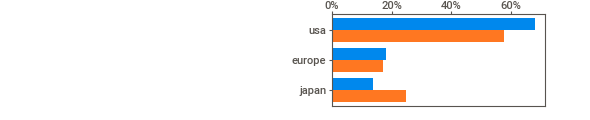
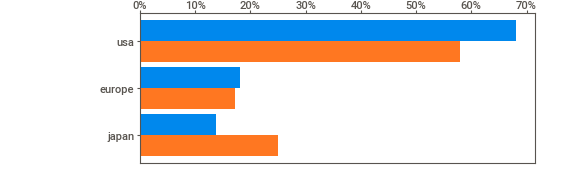
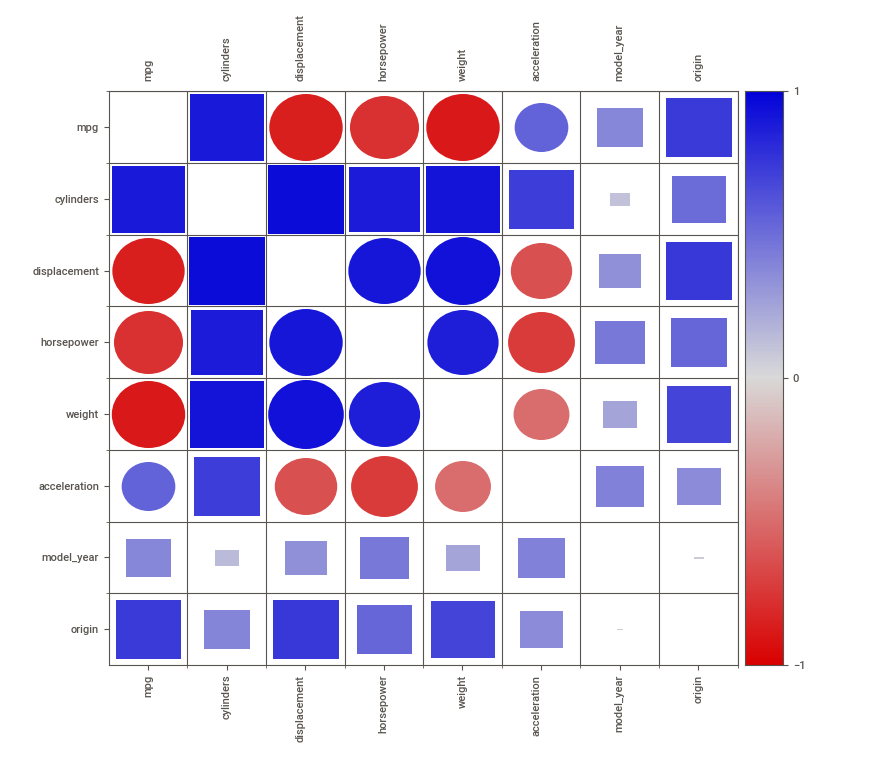
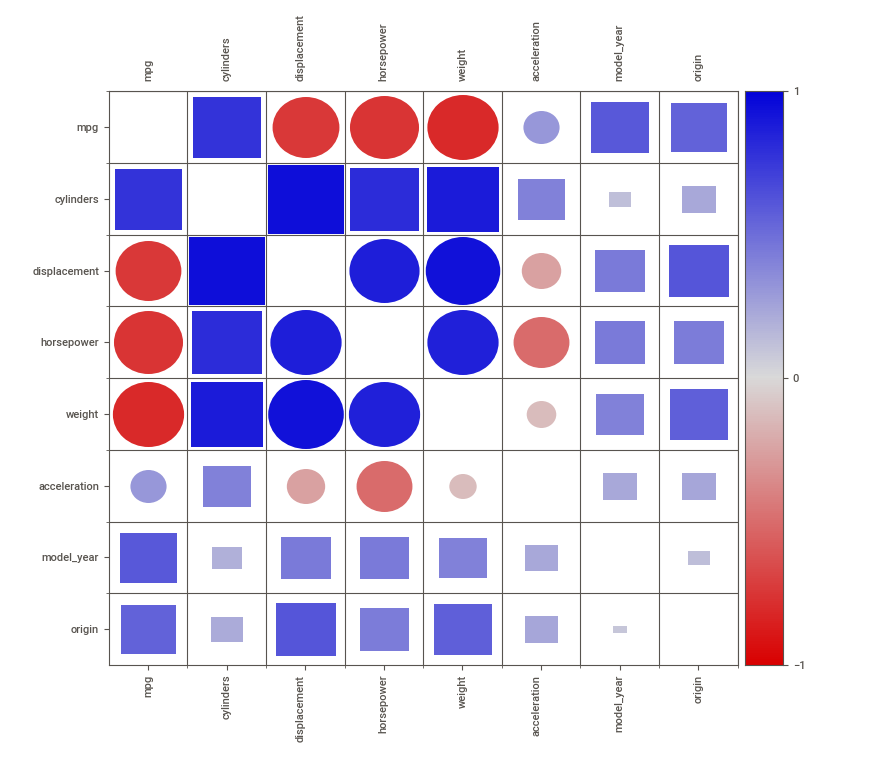

In [38]:
sv_report.show_notebook(w=900, h=450, scale=0.8)

#### Compare two datasets with target

In [39]:
sv_report = sv.compare(source = [df1, "< 76"], compare = [df2,">= 76"], target_feat = "mpg")

                                             |          | [  0%]   00:00 -> (? left)


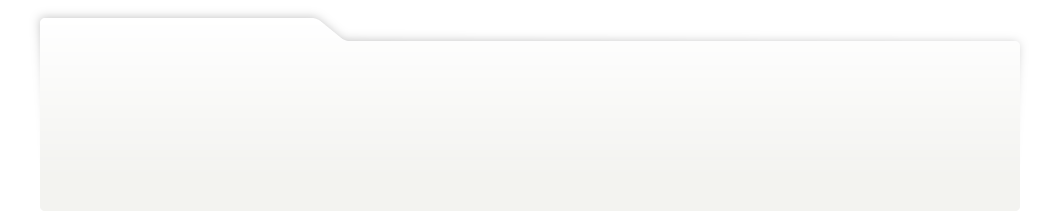
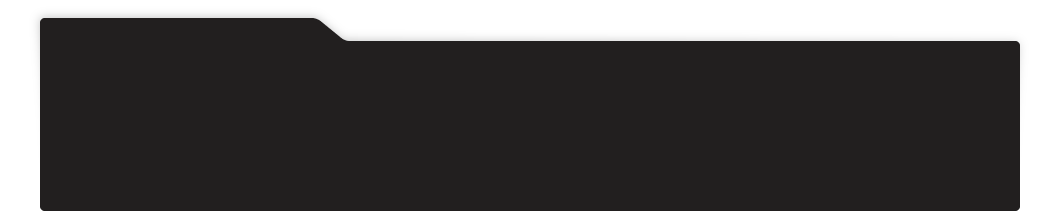
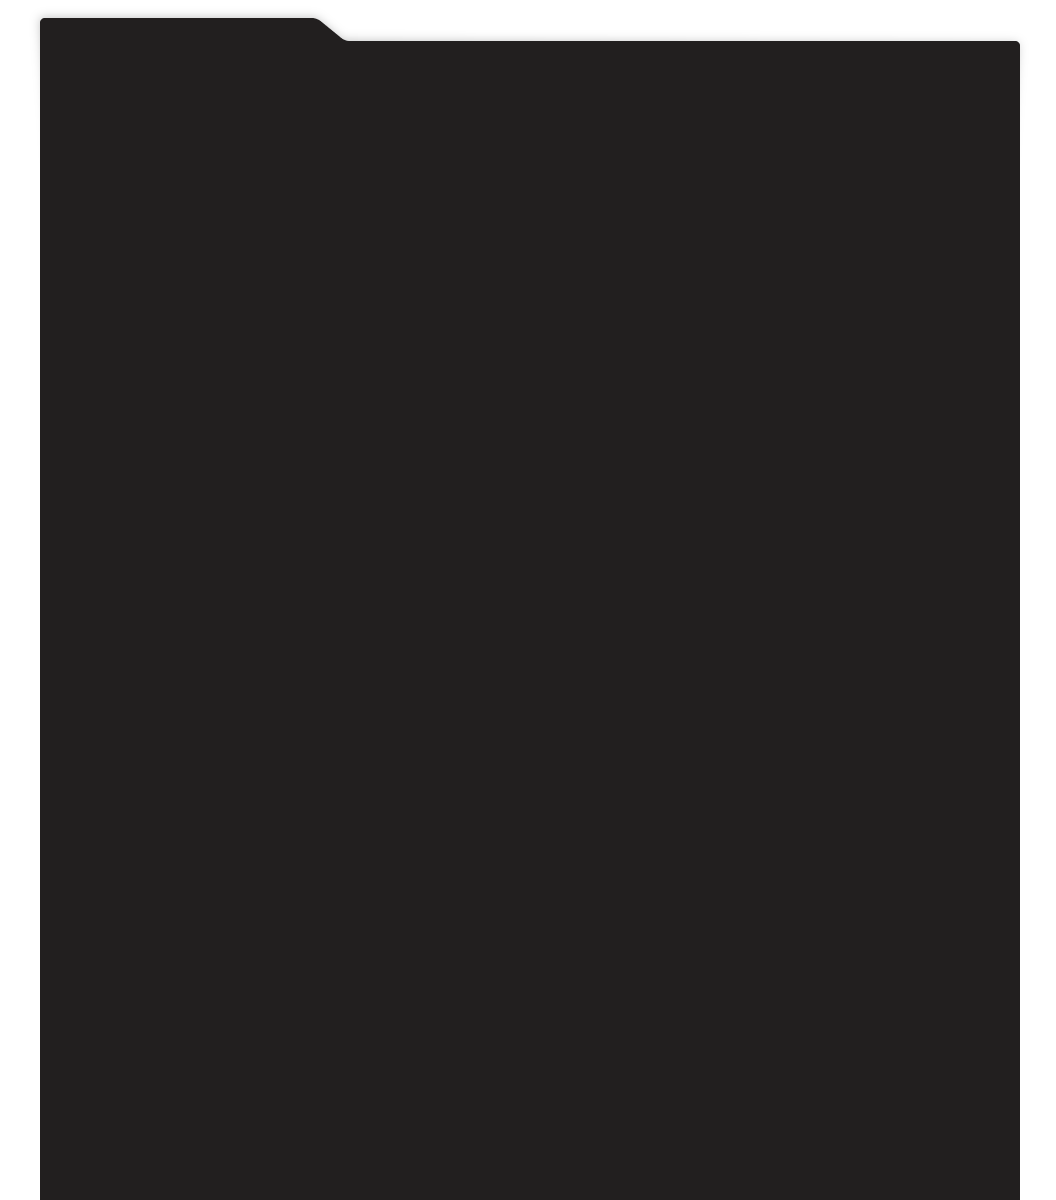
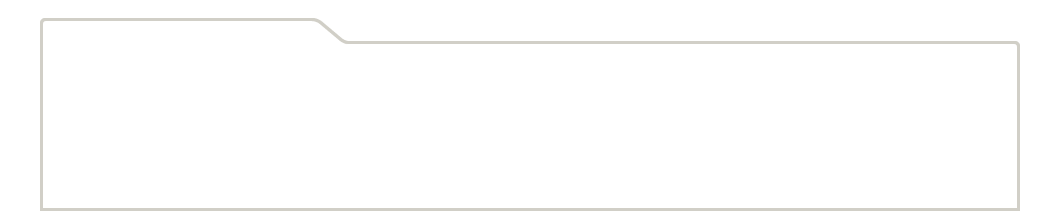
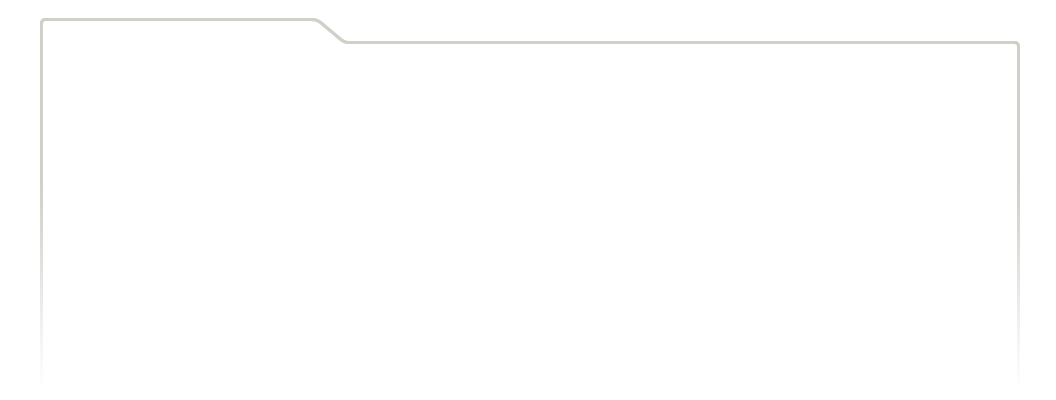
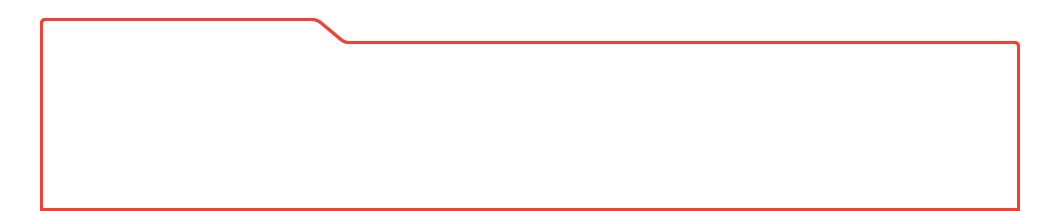
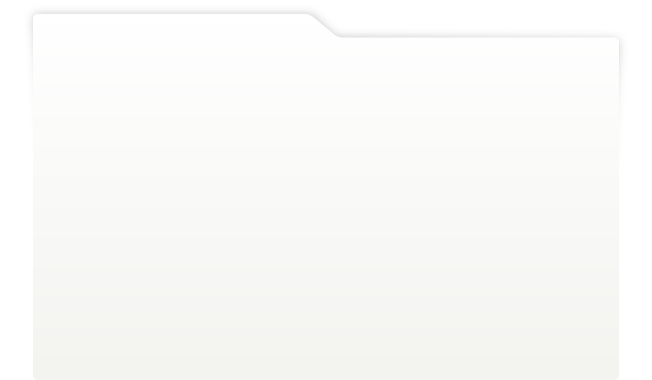
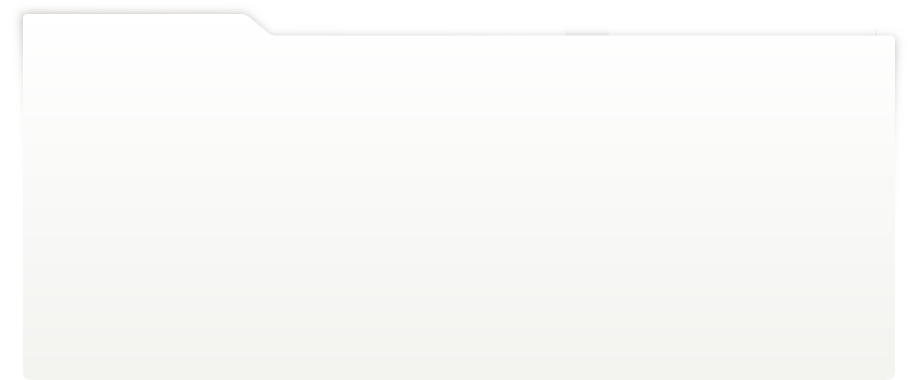
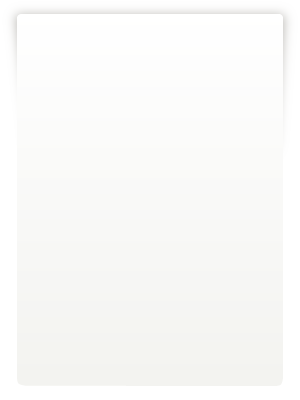
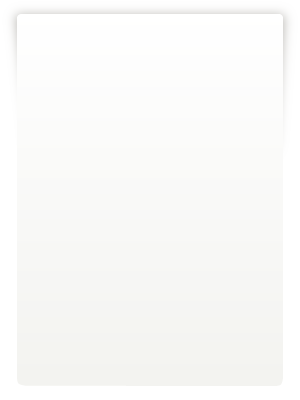
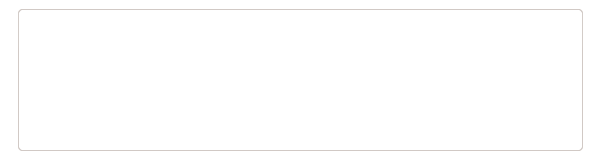
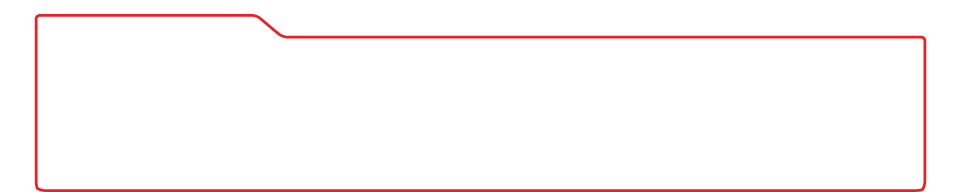
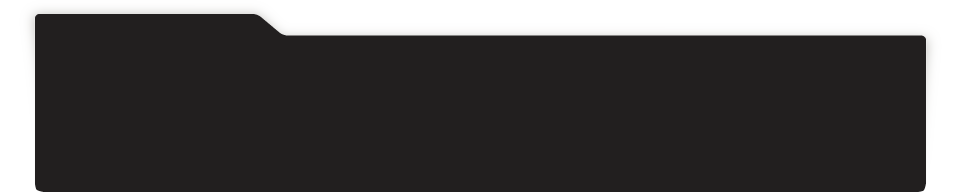
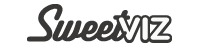
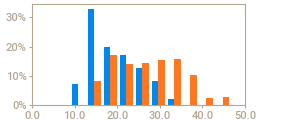
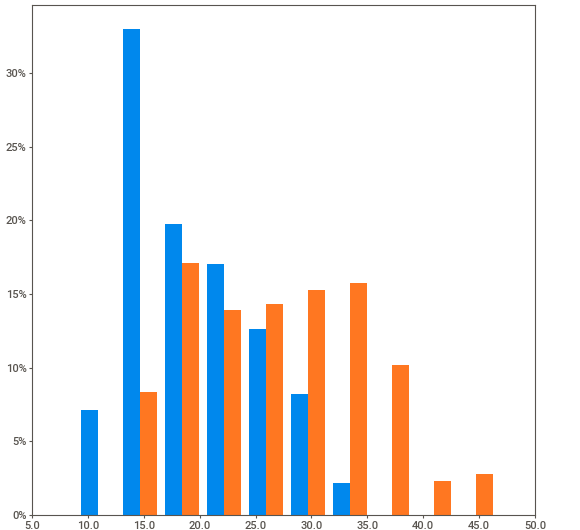
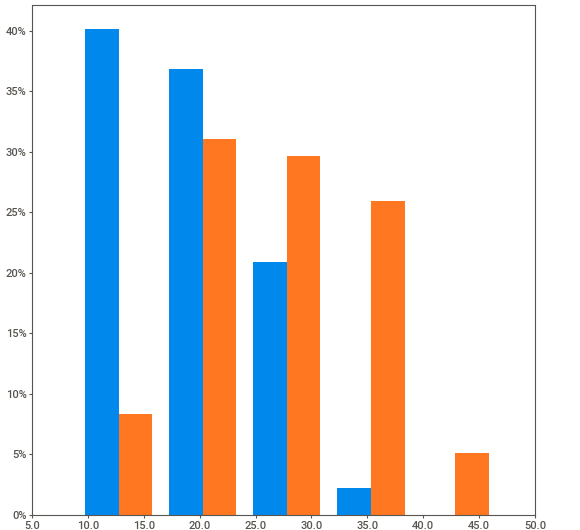
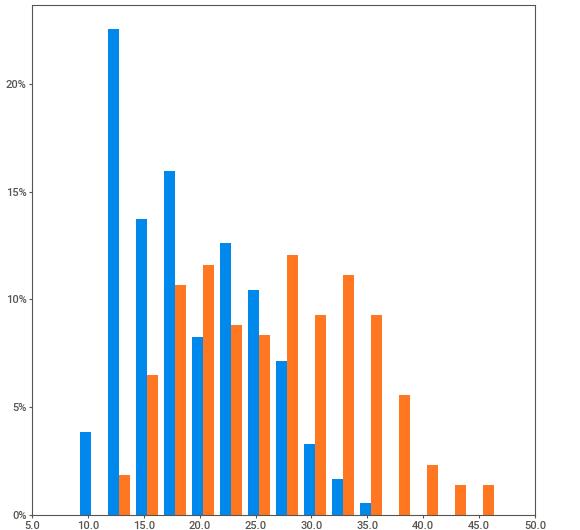
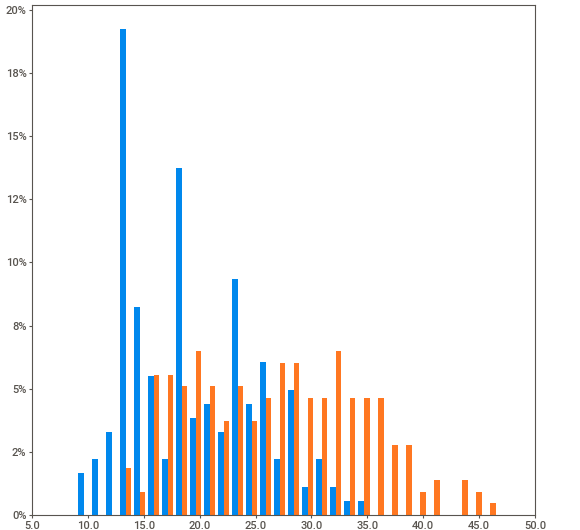
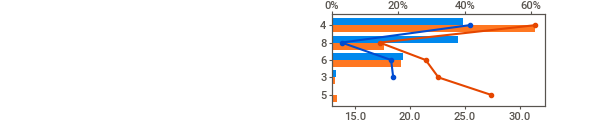
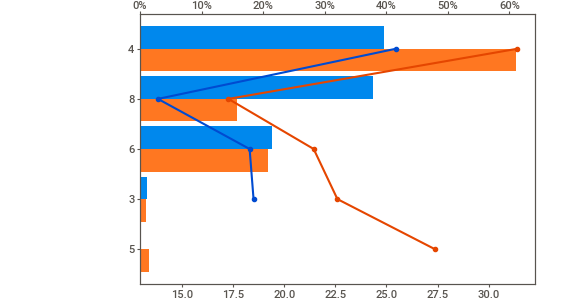
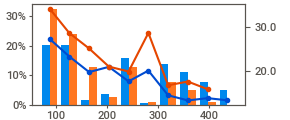
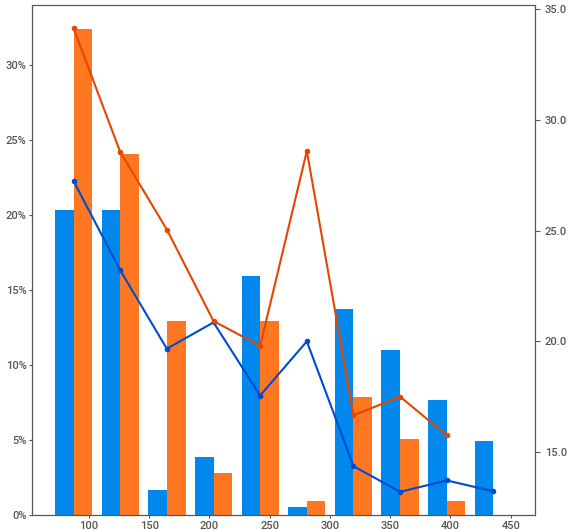
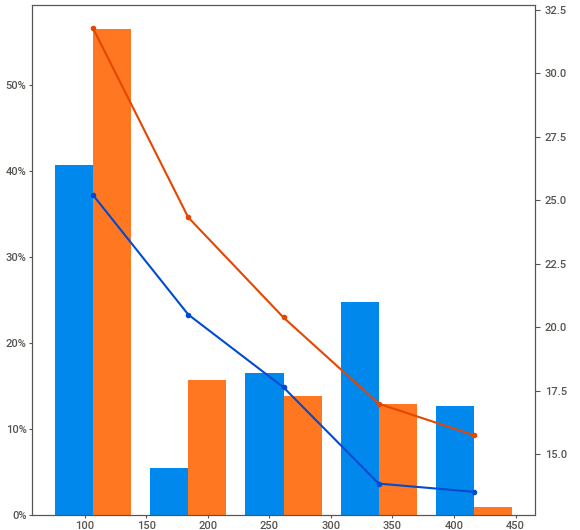
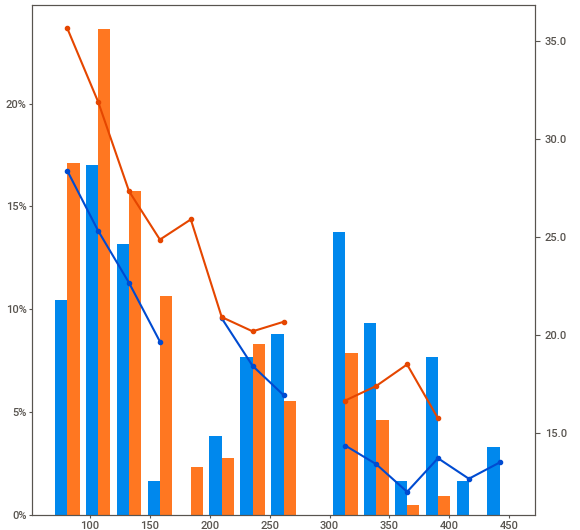
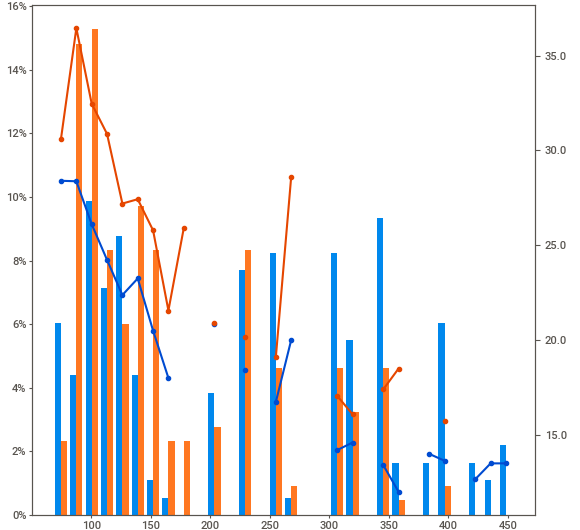
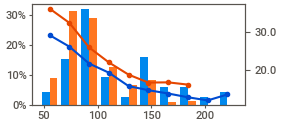
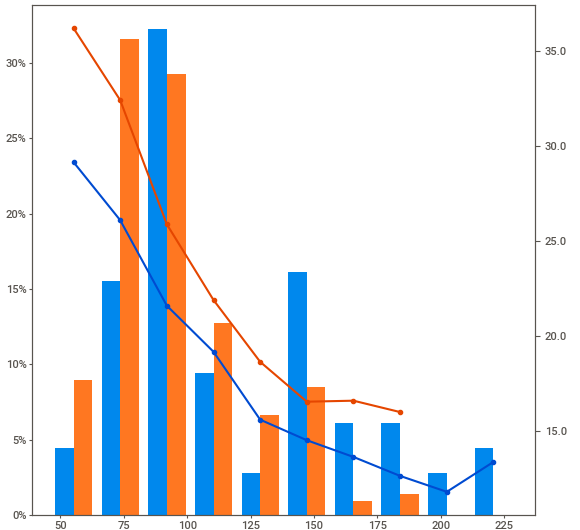
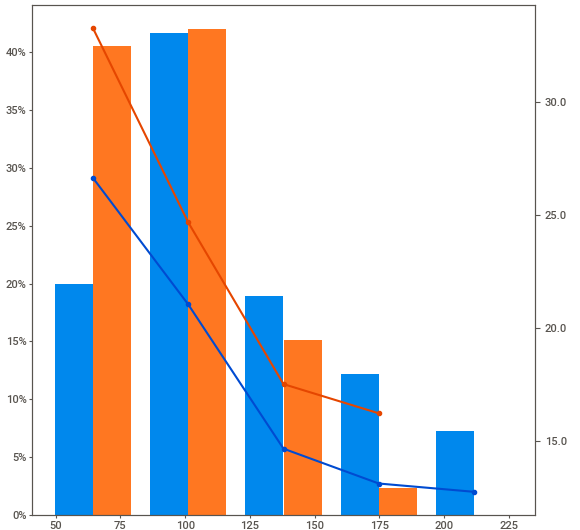
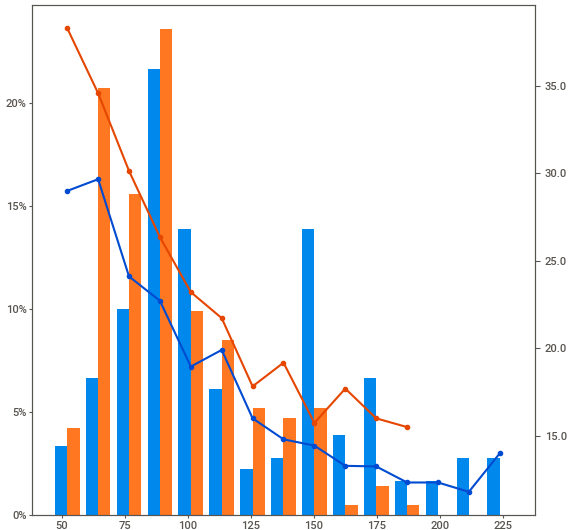
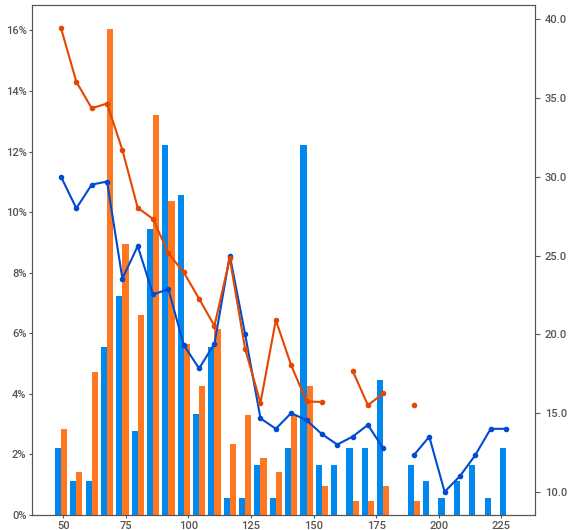
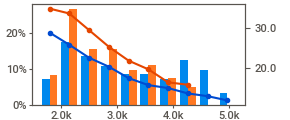
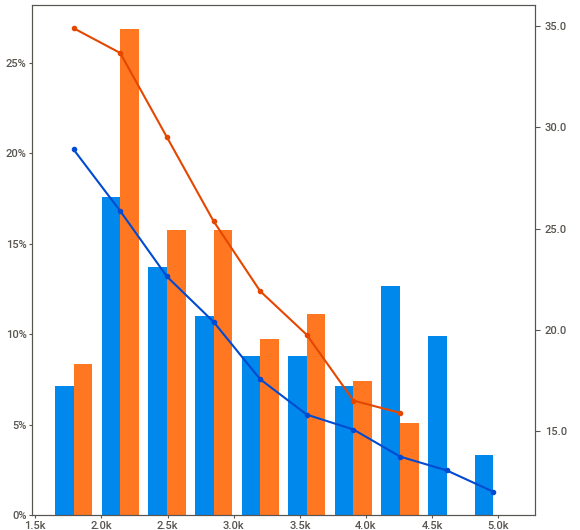
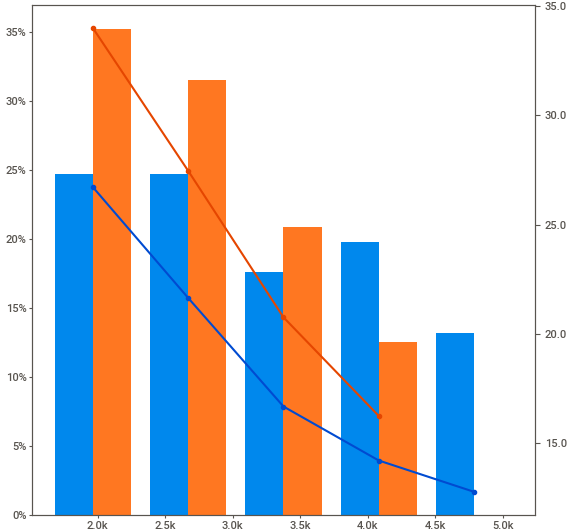
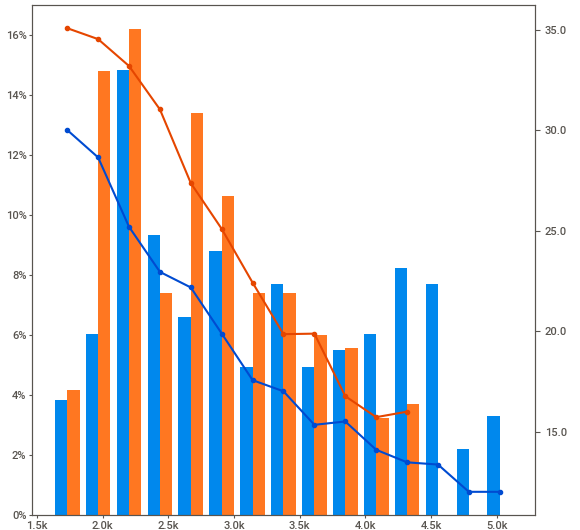
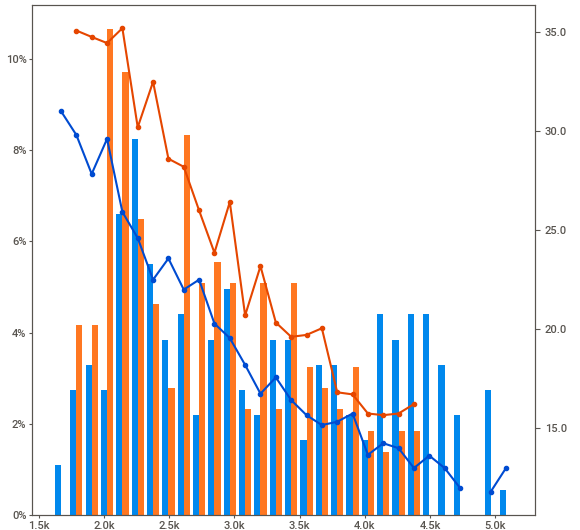
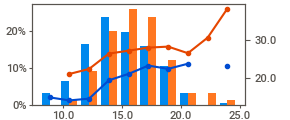
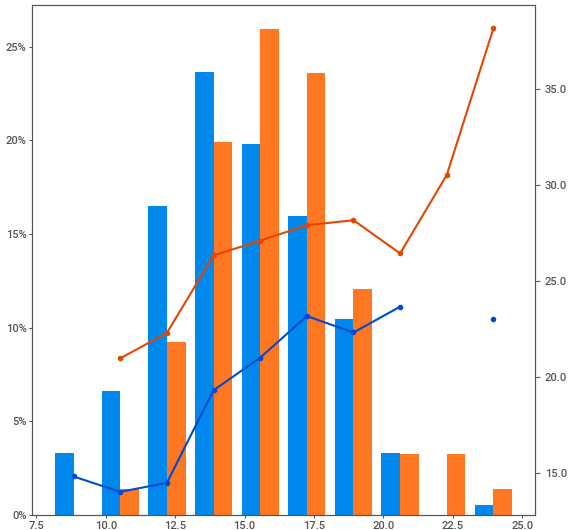
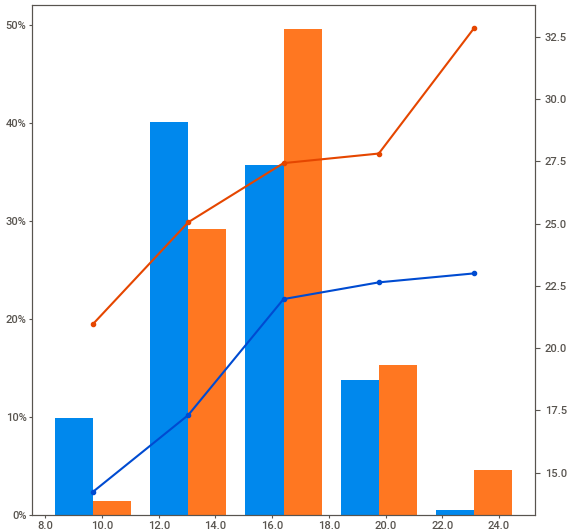
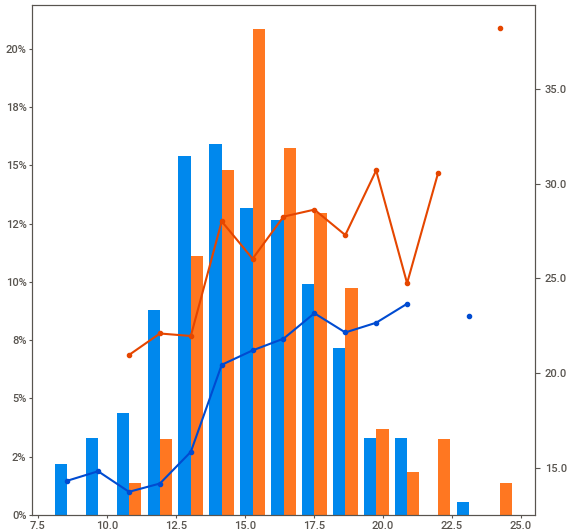
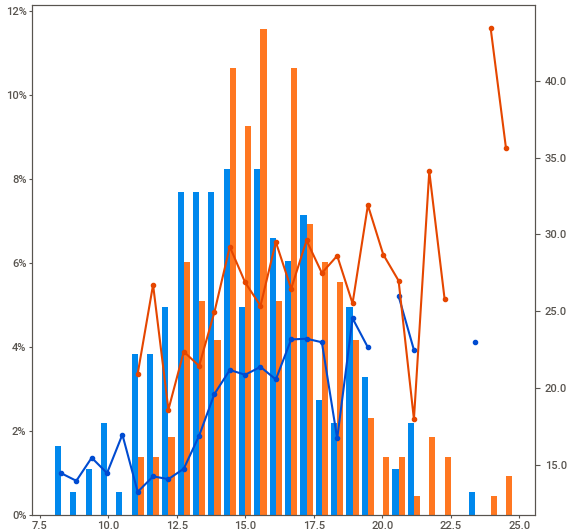
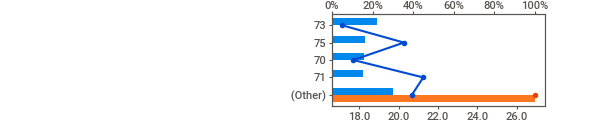
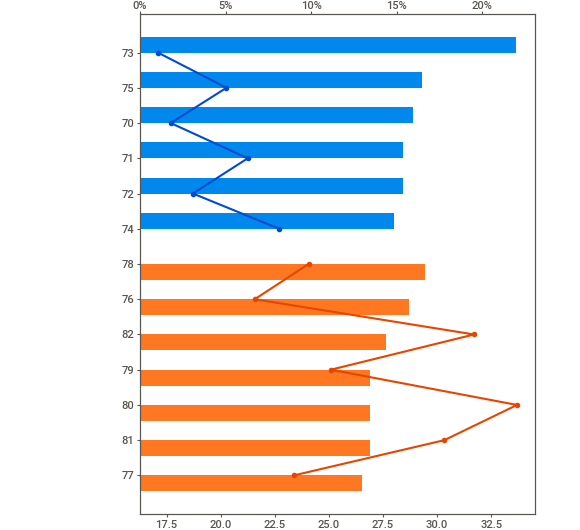
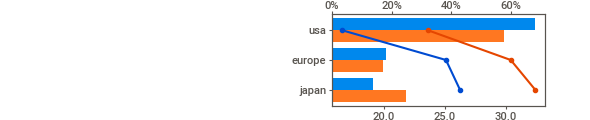
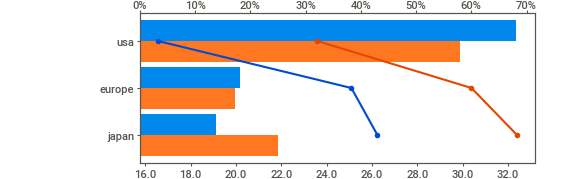
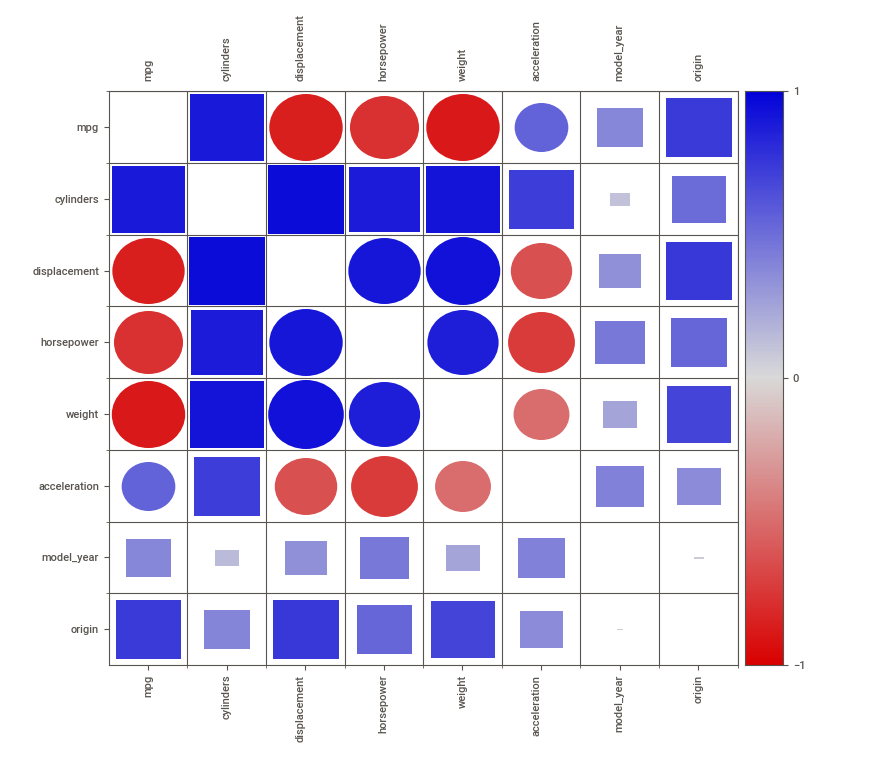
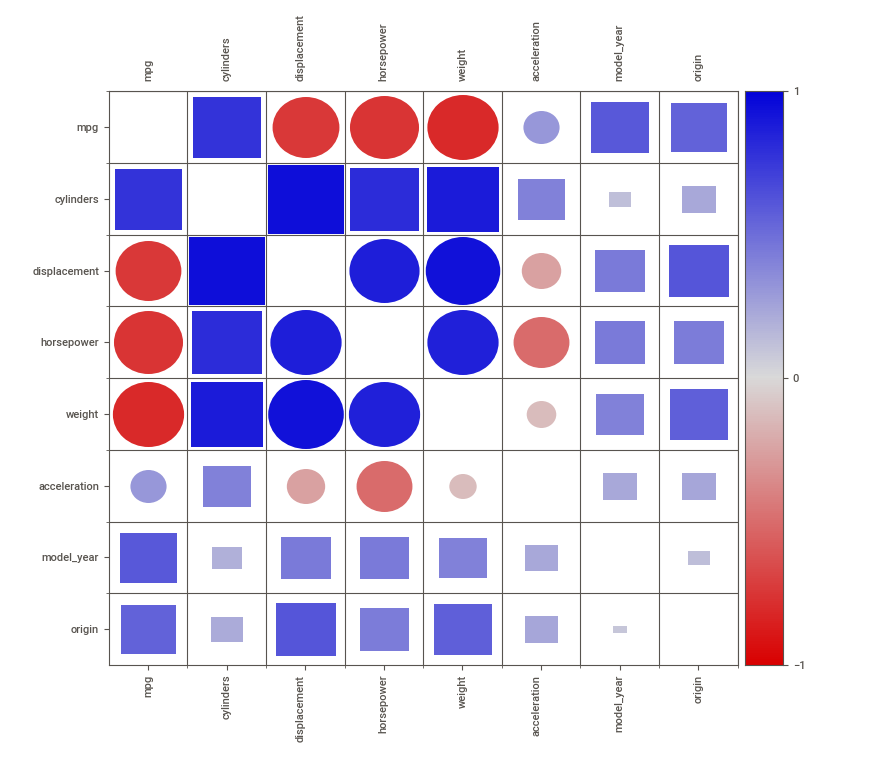

In [40]:
sv_report.show_notebook(w=900, h=450, scale=0.8)

### Compare intra
(two variables inside one dataset)

In [41]:
sv_report = sv.compare_intra(df, df['origin'] == 'usa', ["US", "Non-US"])

                                             |          | [  0%]   00:00 -> (? left)


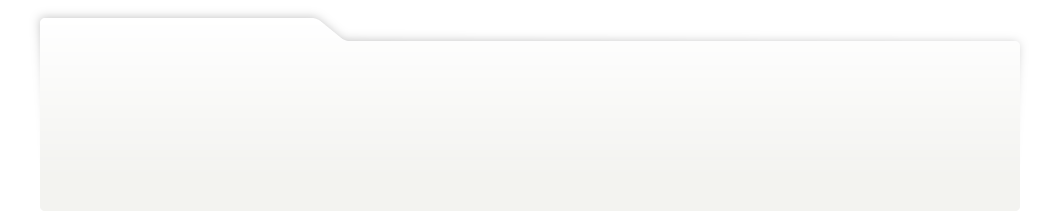
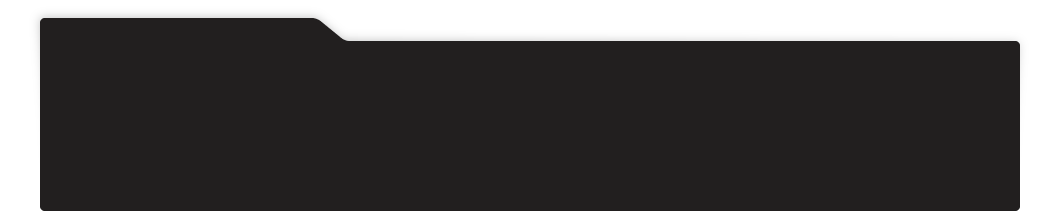
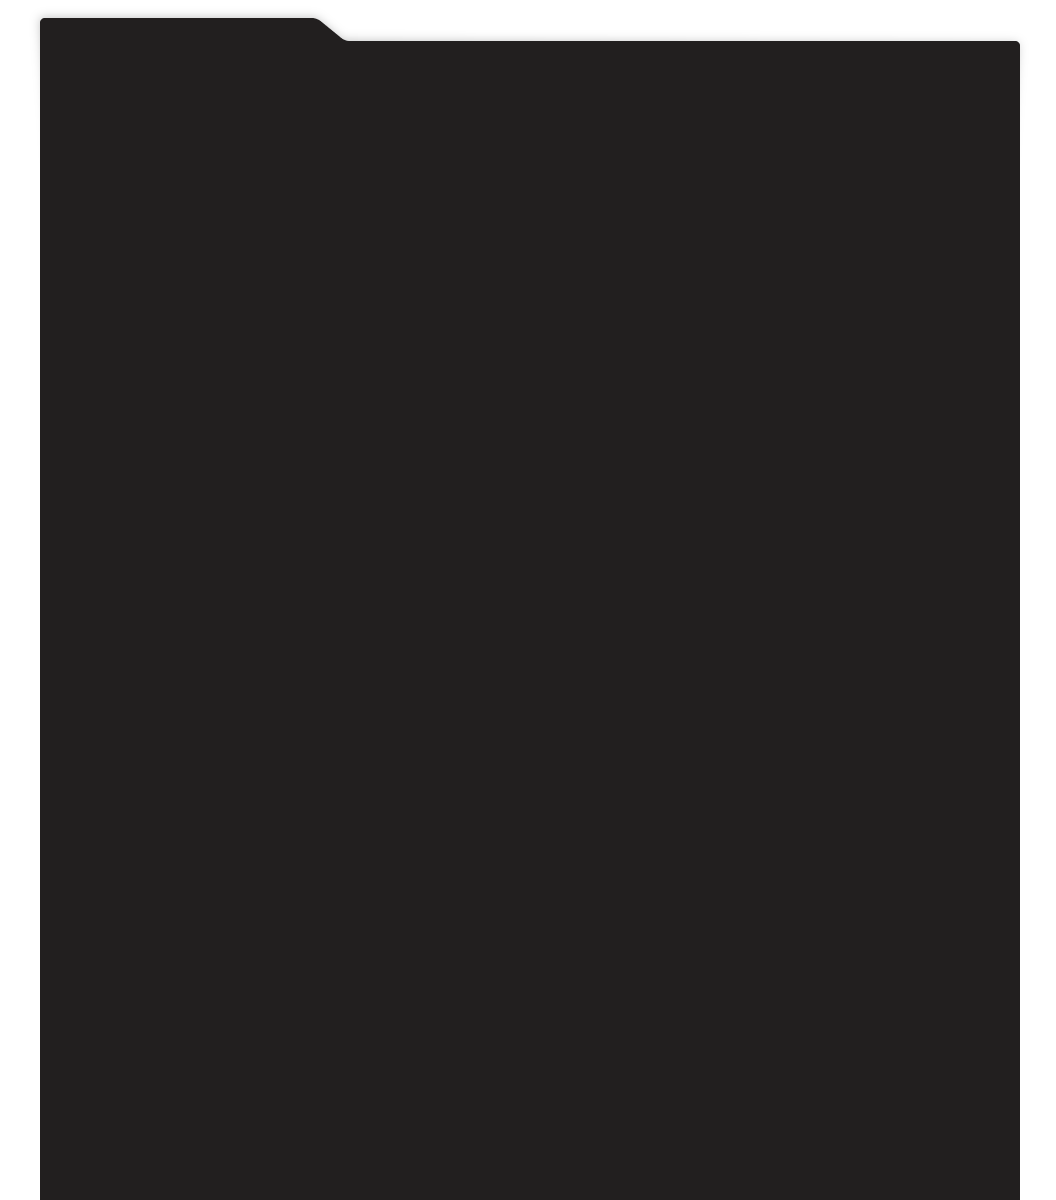
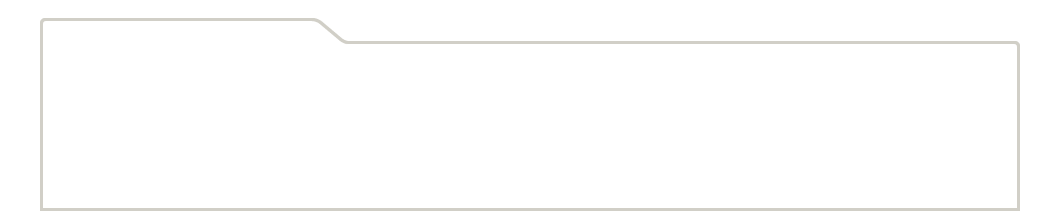
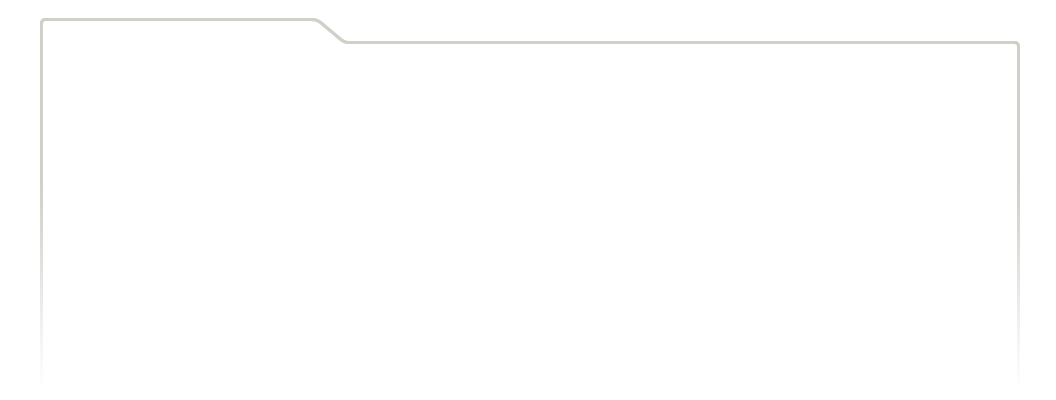
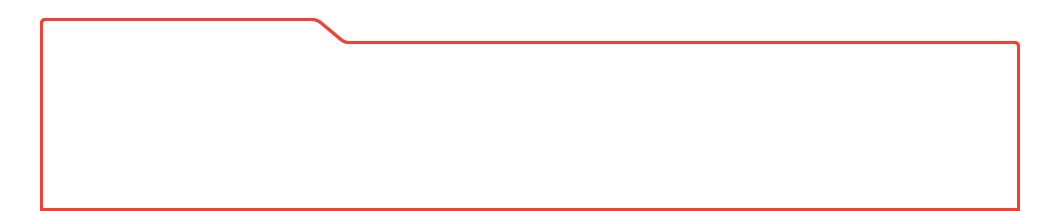
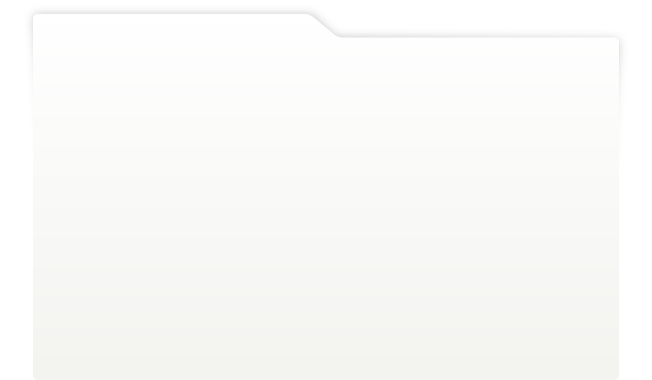
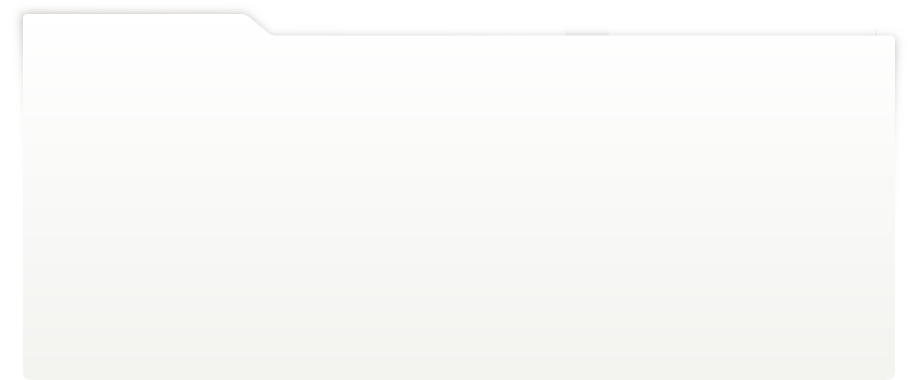
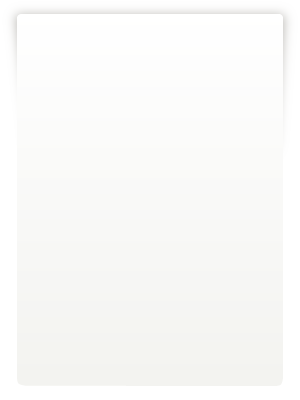
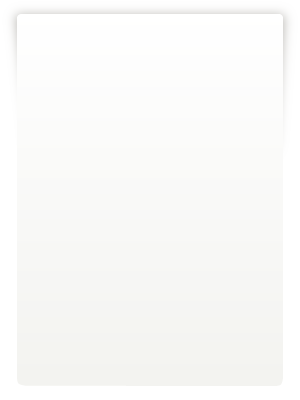
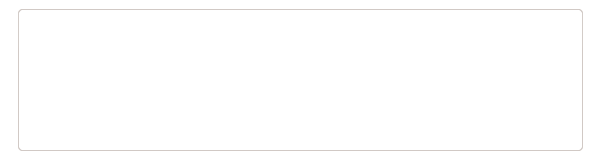
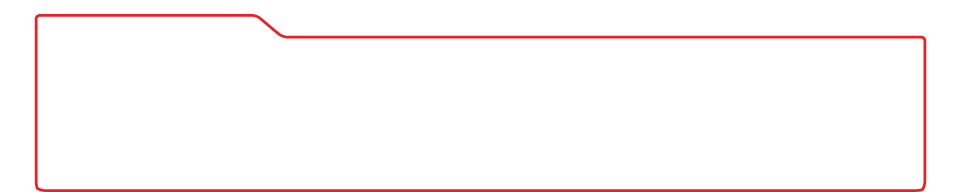
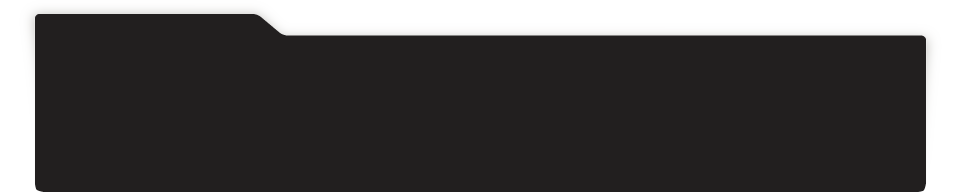
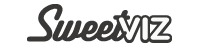
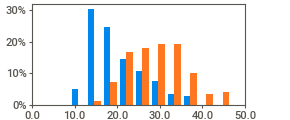
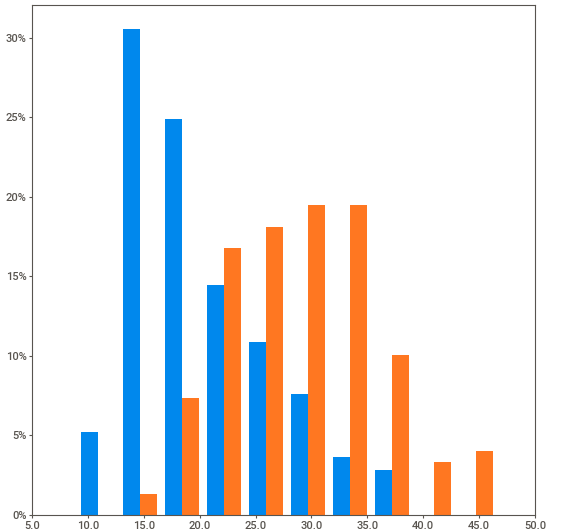
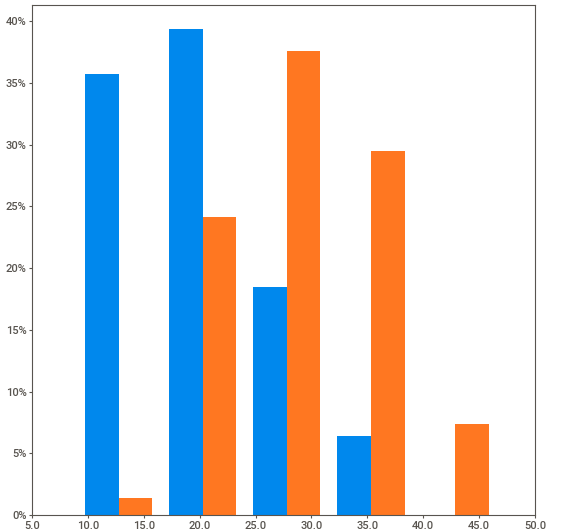
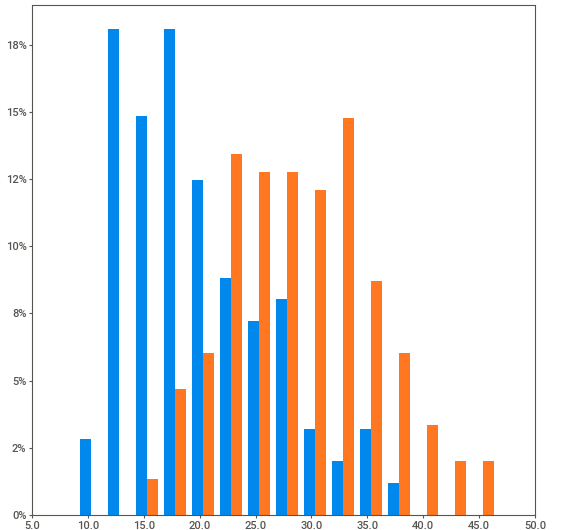
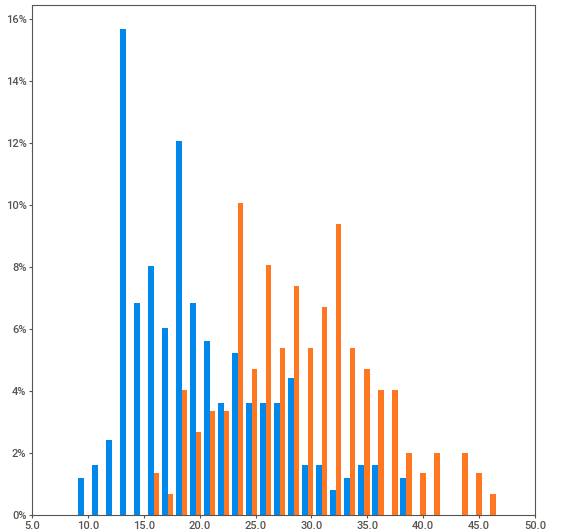
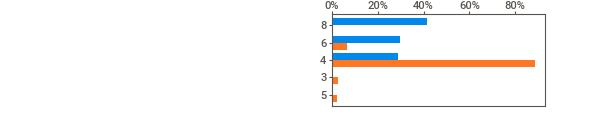
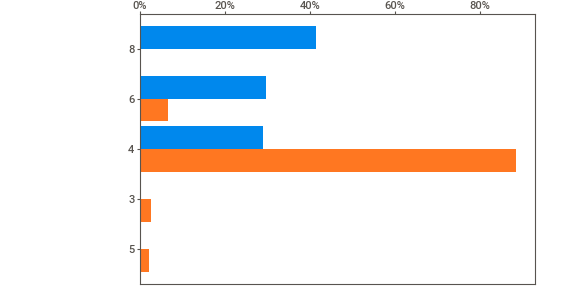
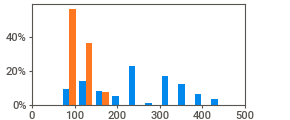
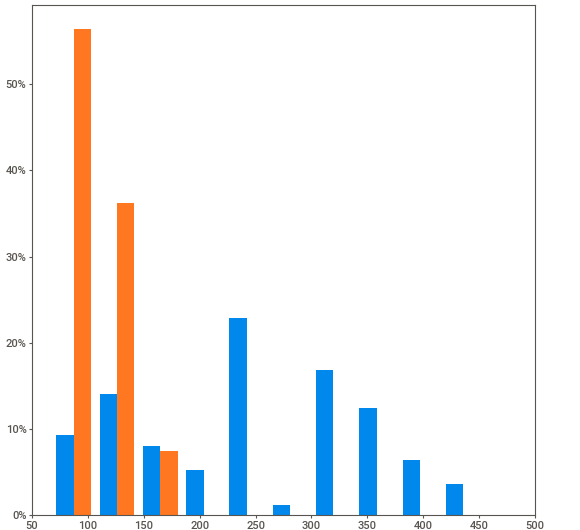
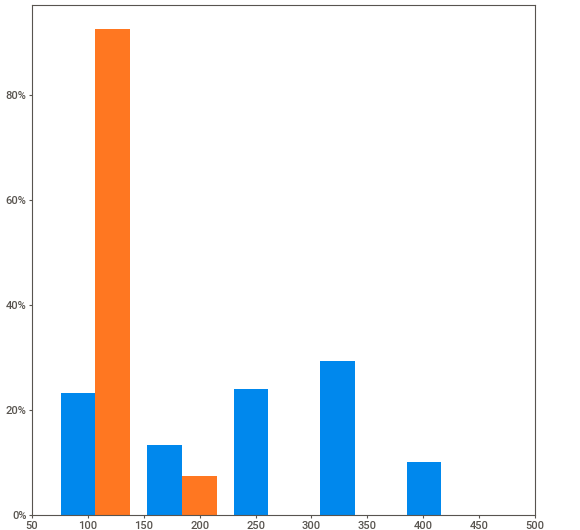
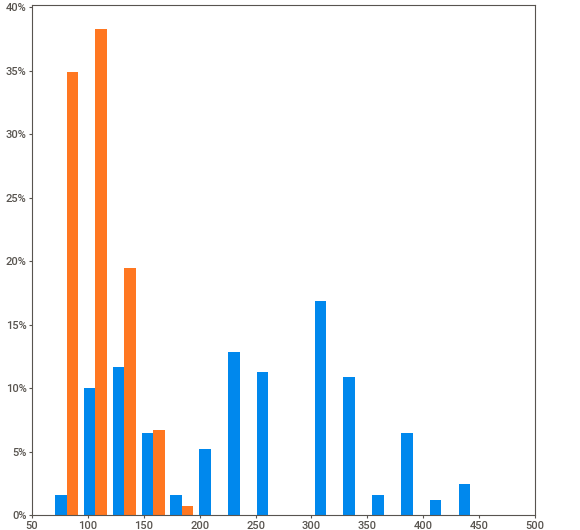
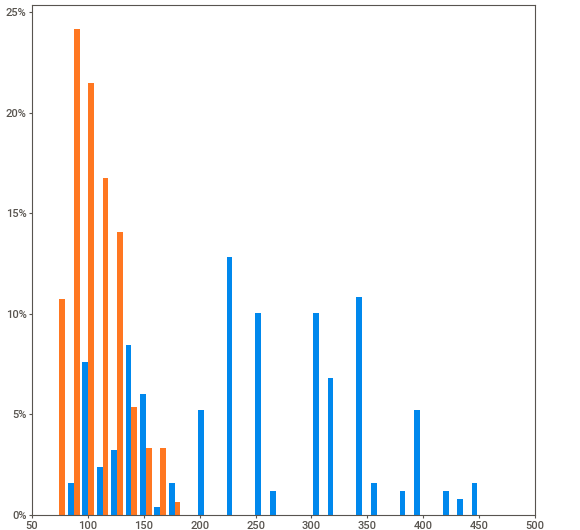
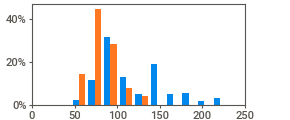
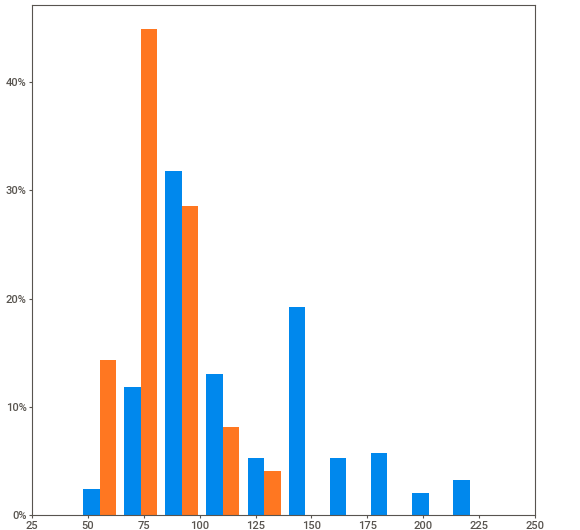
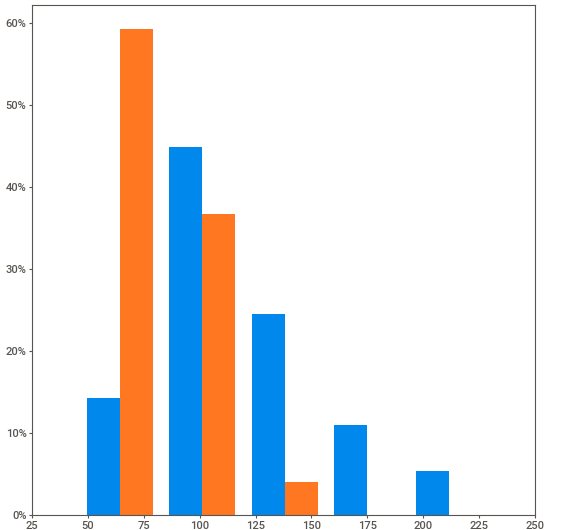
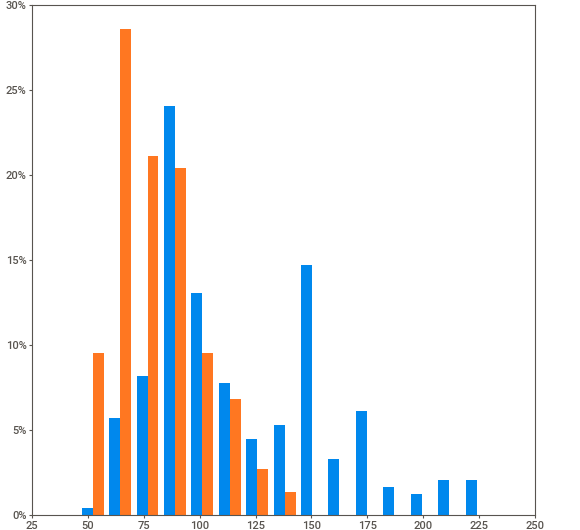
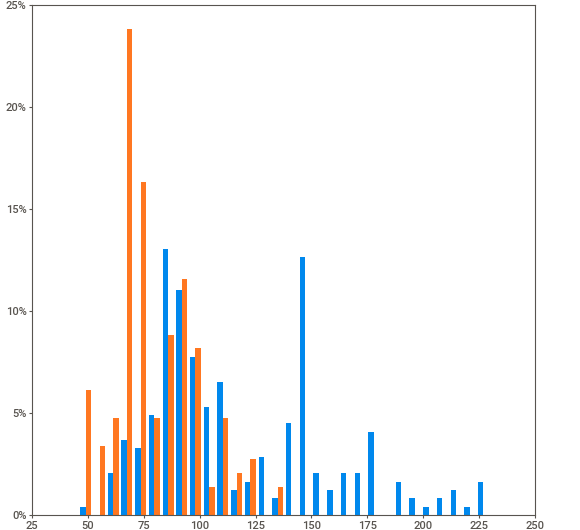
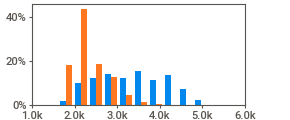
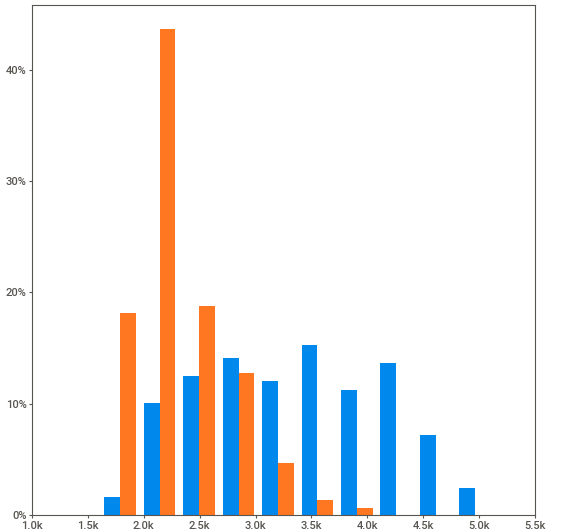
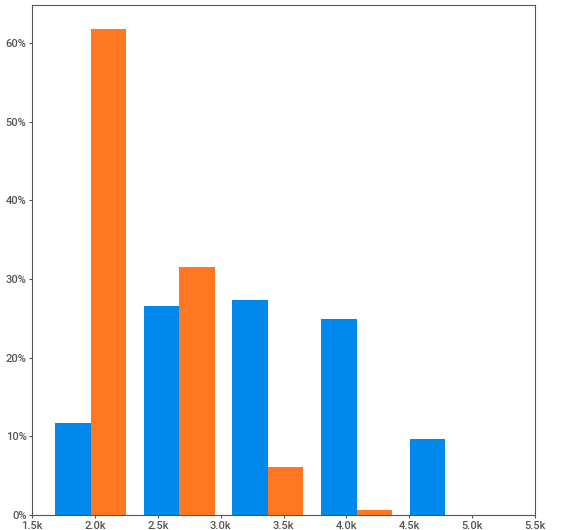
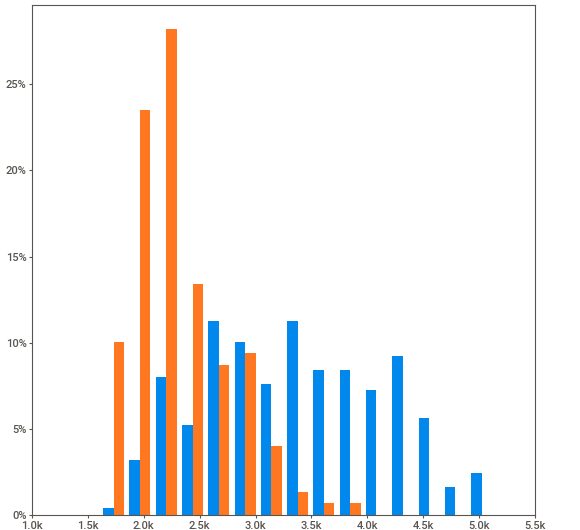
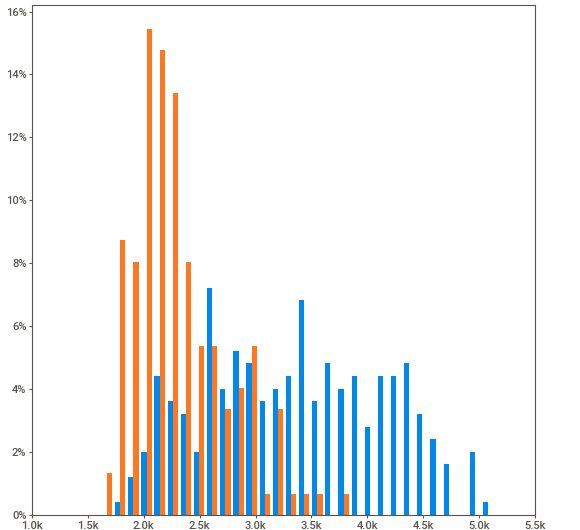
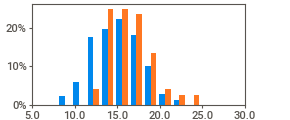
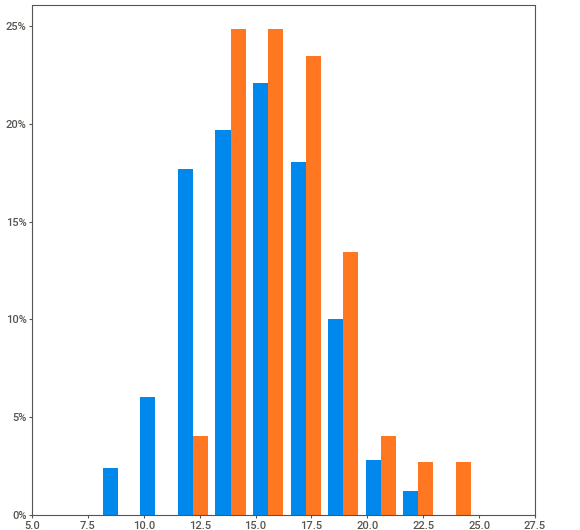
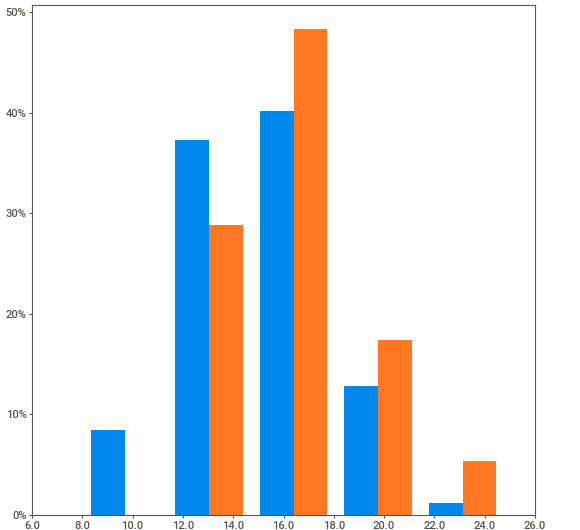
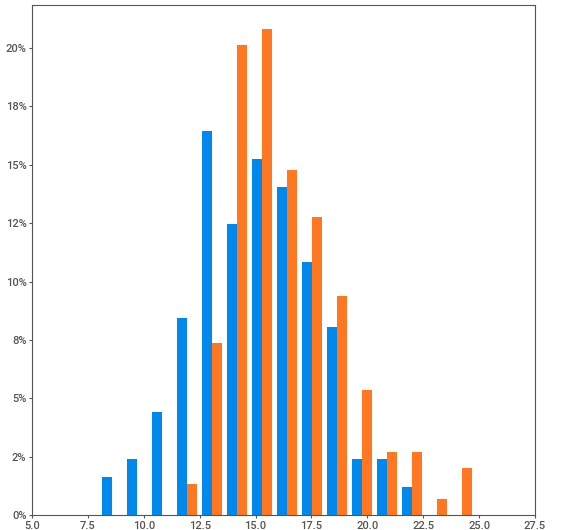
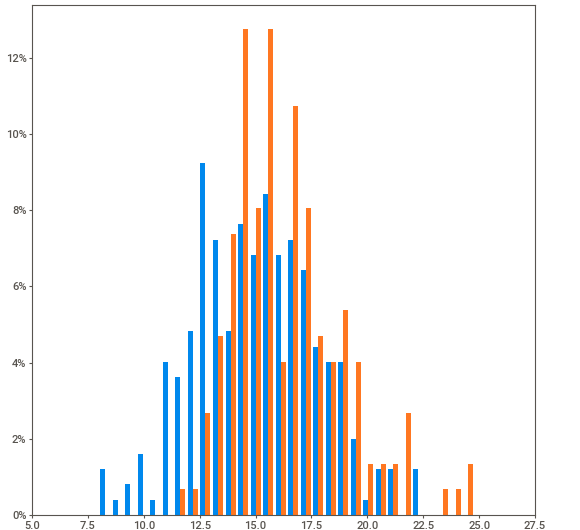
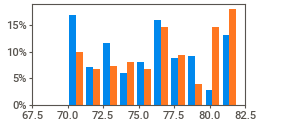
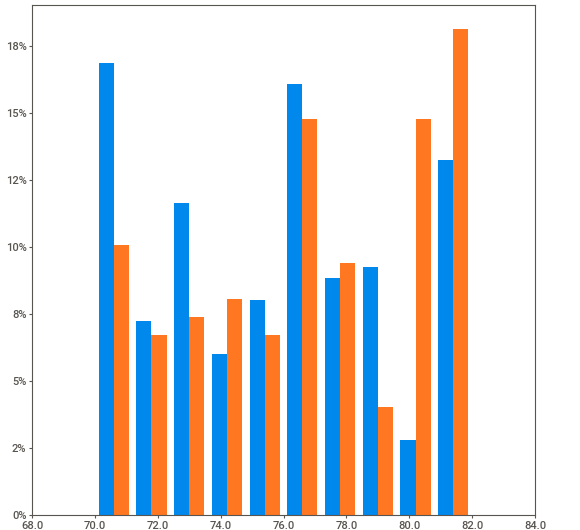
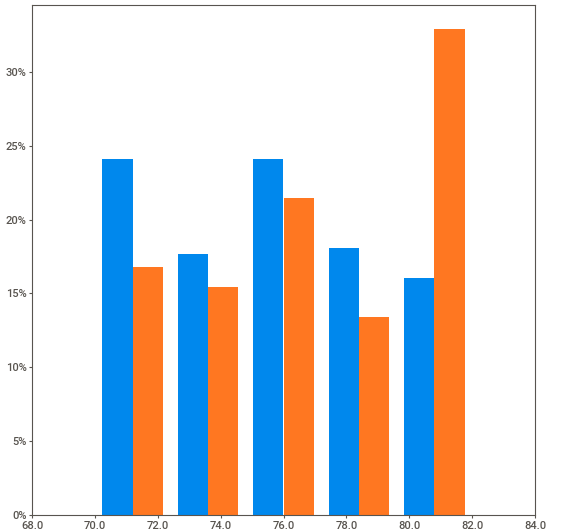
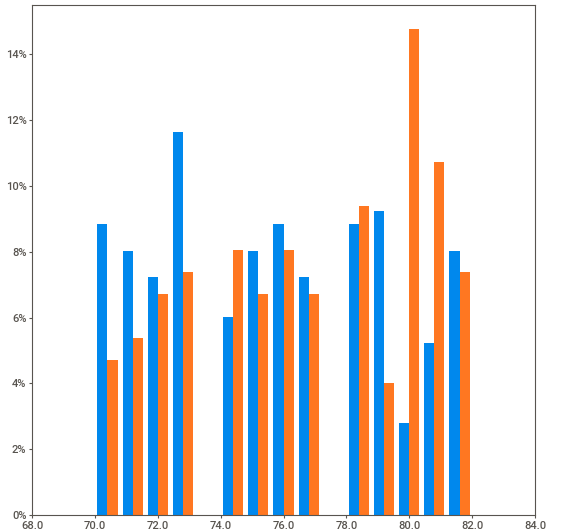
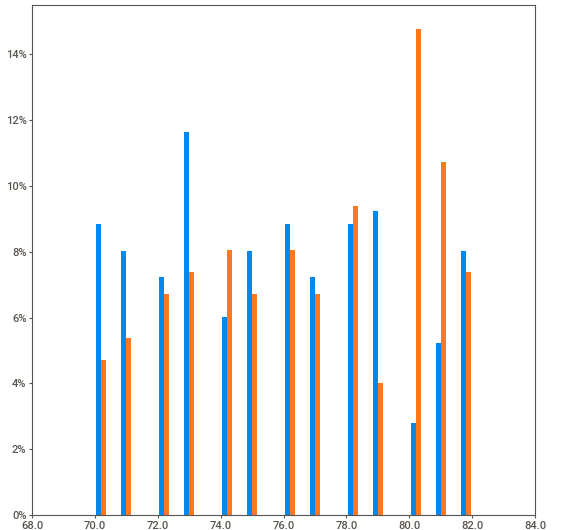
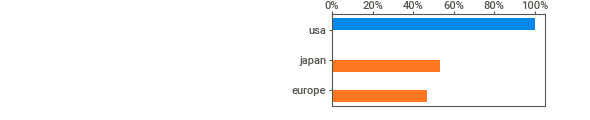
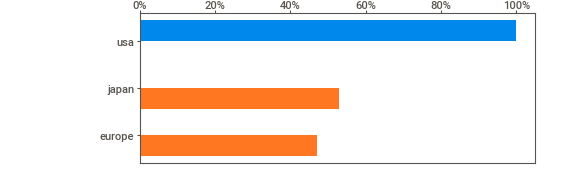
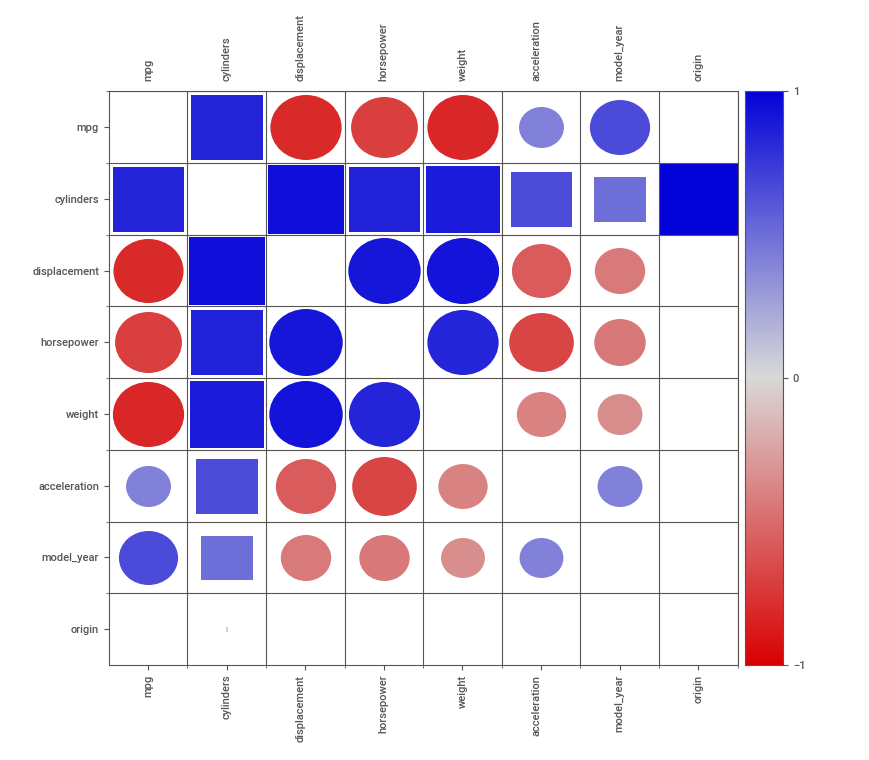
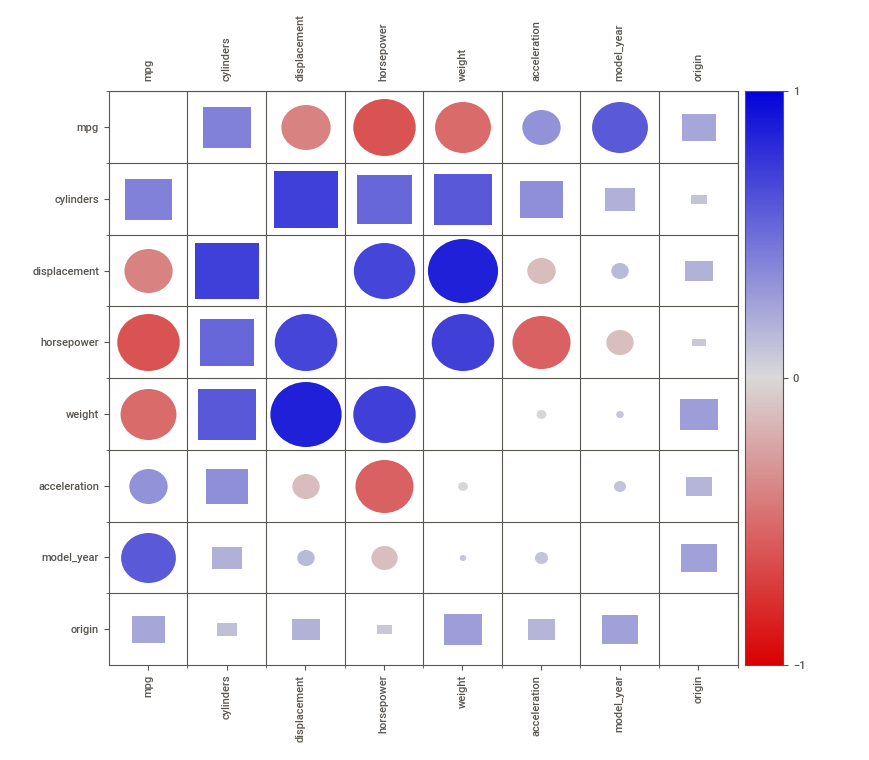

In [42]:
sv_report.show_notebook(w=900, h=450, scale=0.8)

#### Compare variables inside dataset with target

In [43]:
sv_report = sv.compare_intra(df, df['origin'] == 'usa', ["US", "Non-US"], "mpg")

                                             |          | [  0%]   00:00 -> (? left)


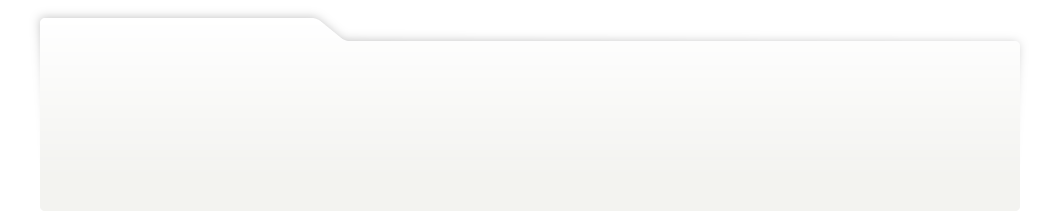
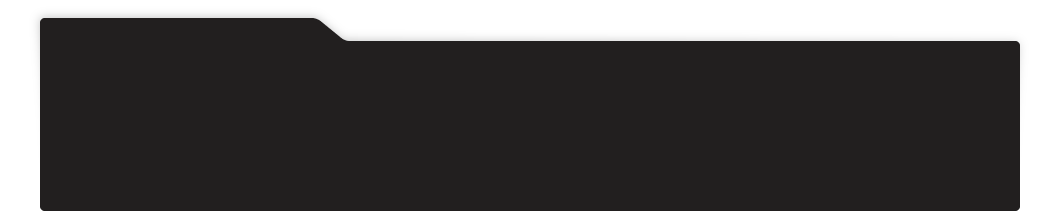
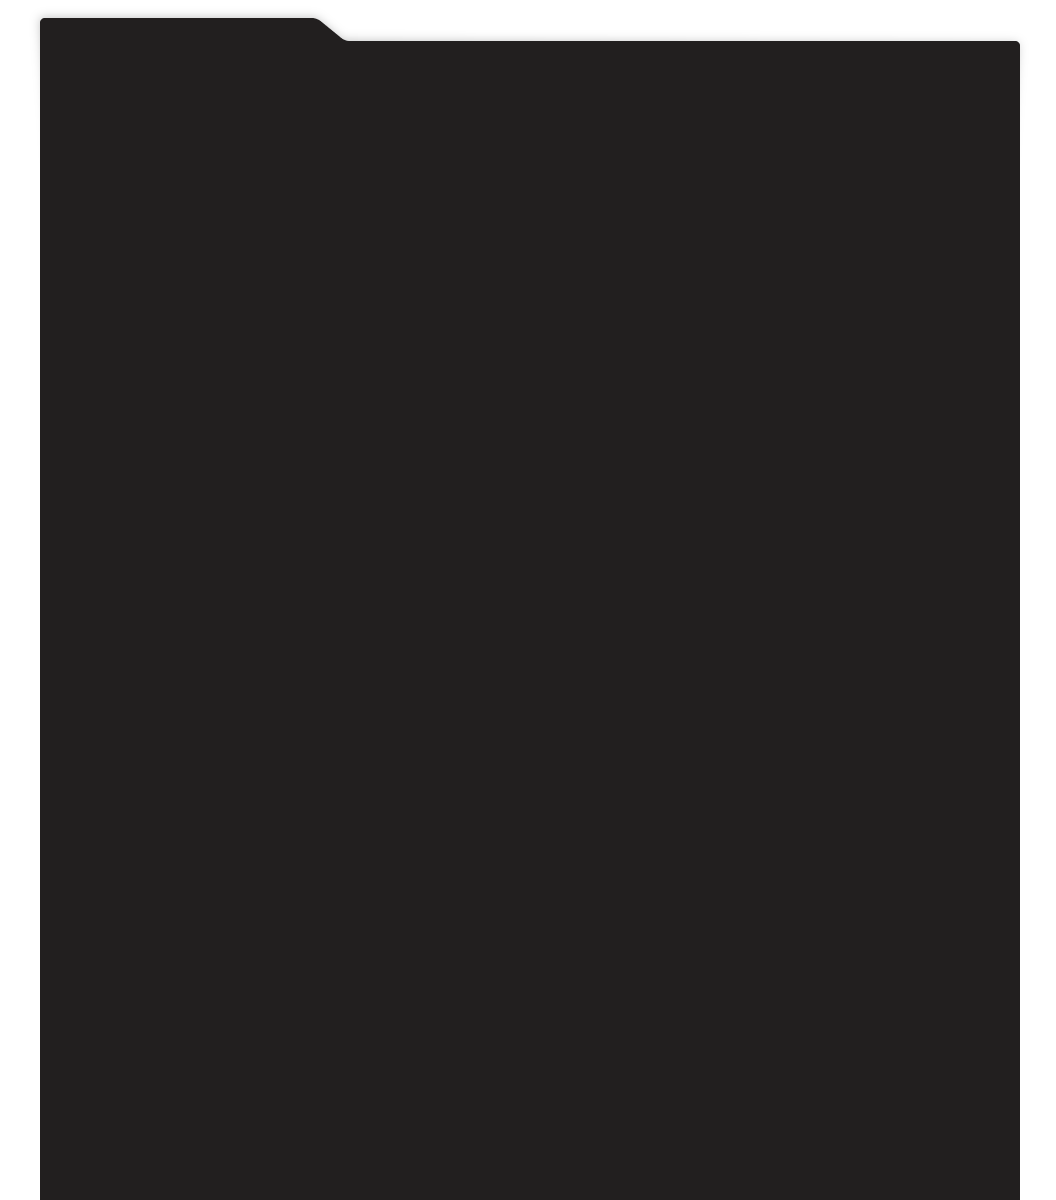
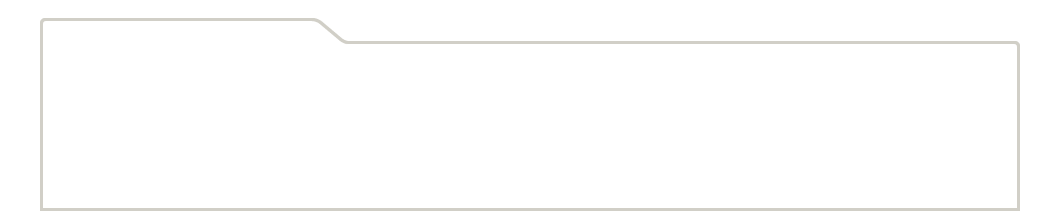
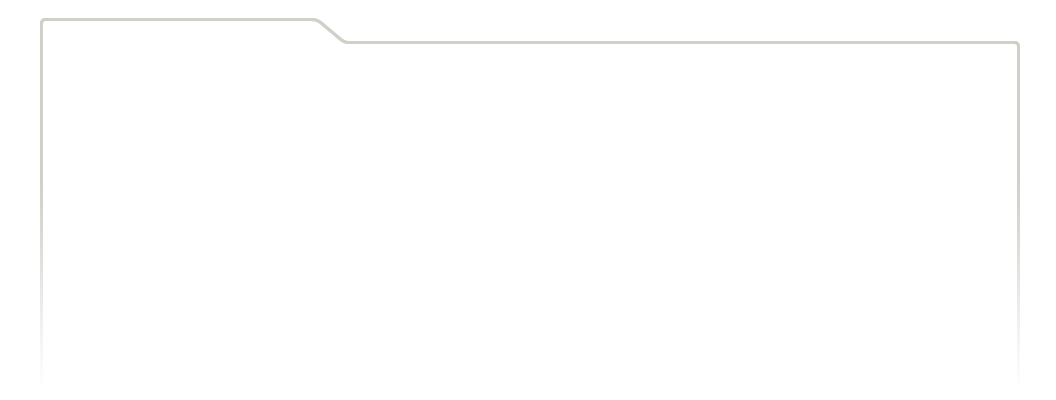
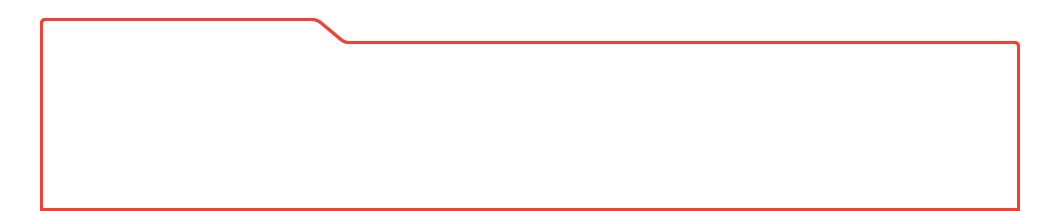
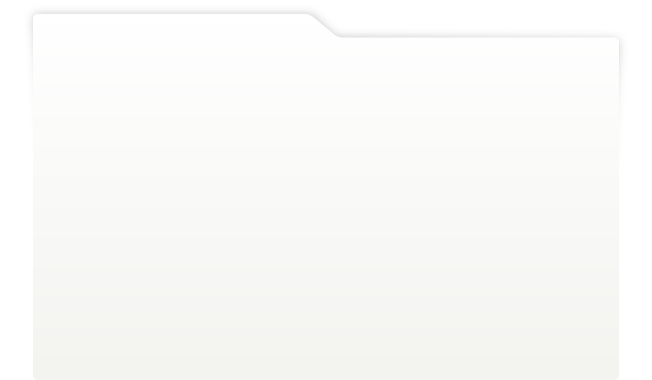
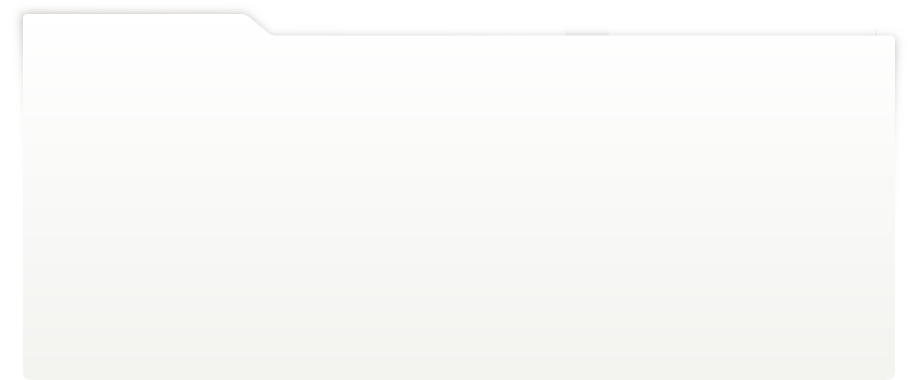
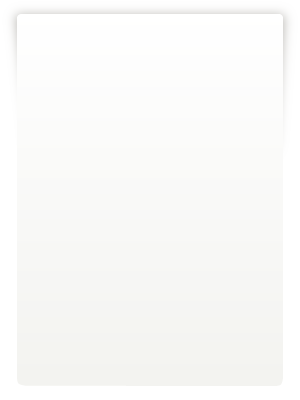
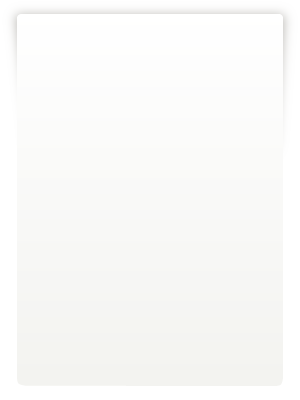
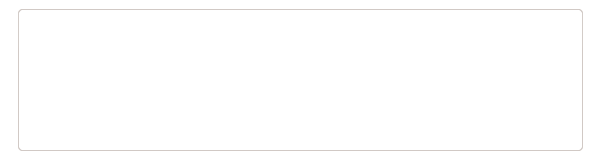
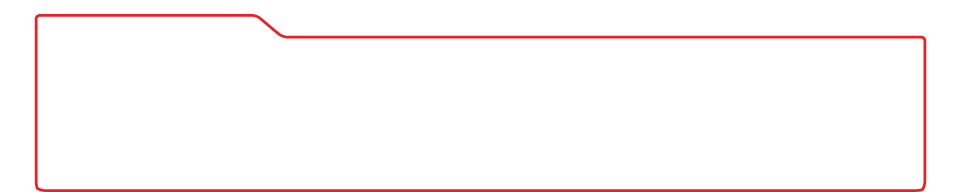
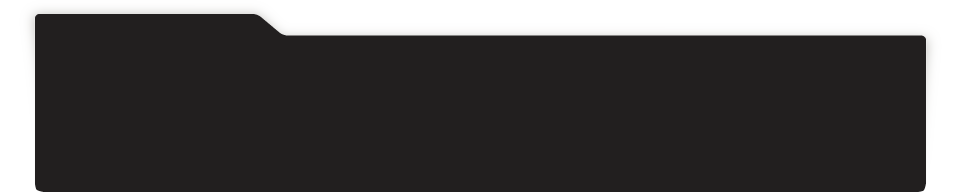
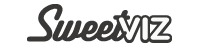
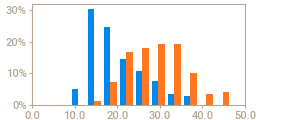
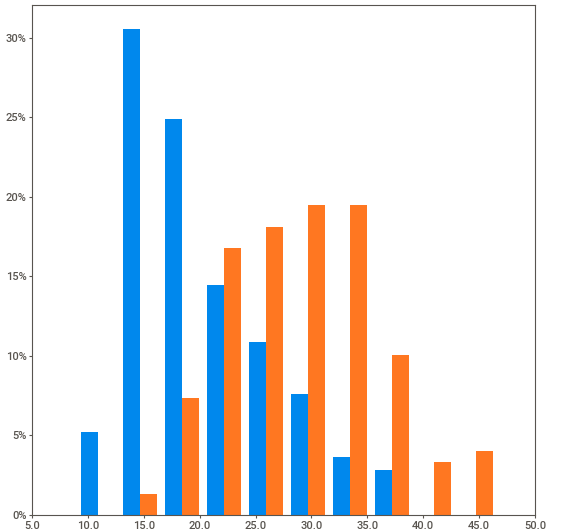
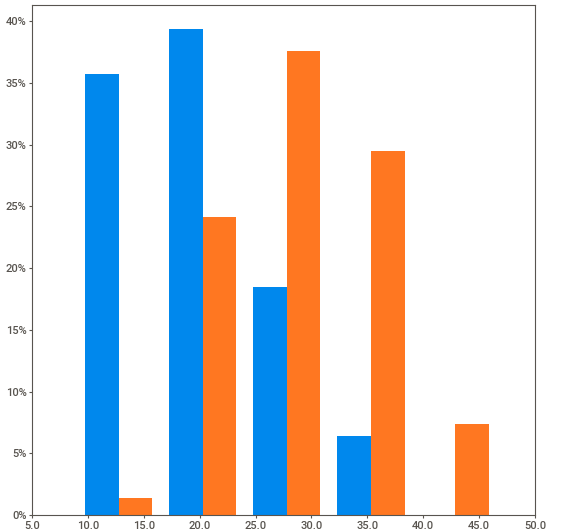
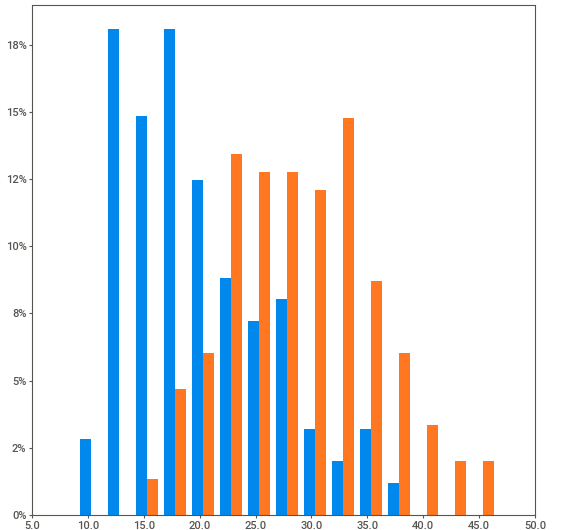
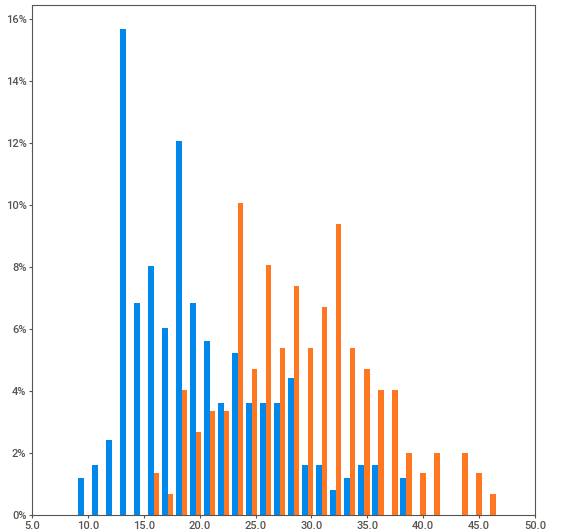
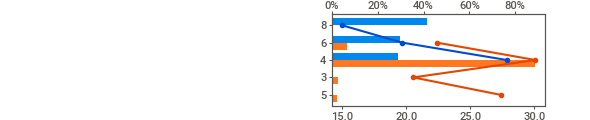
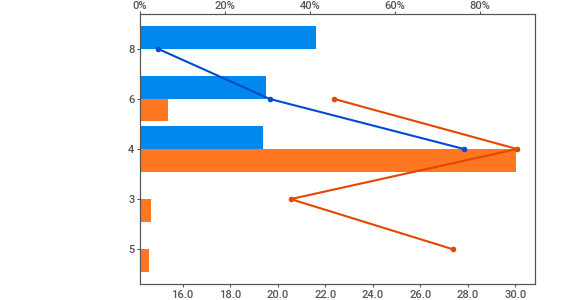
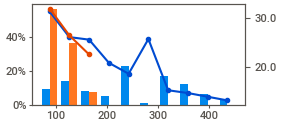
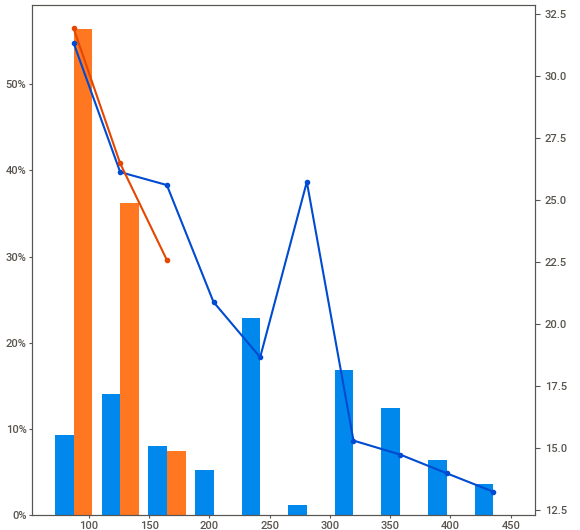
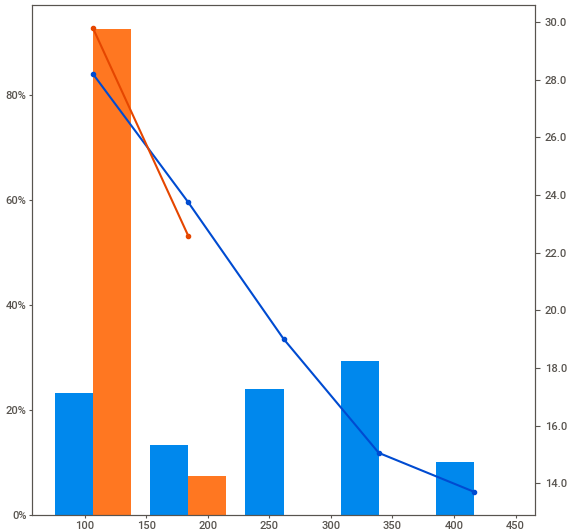
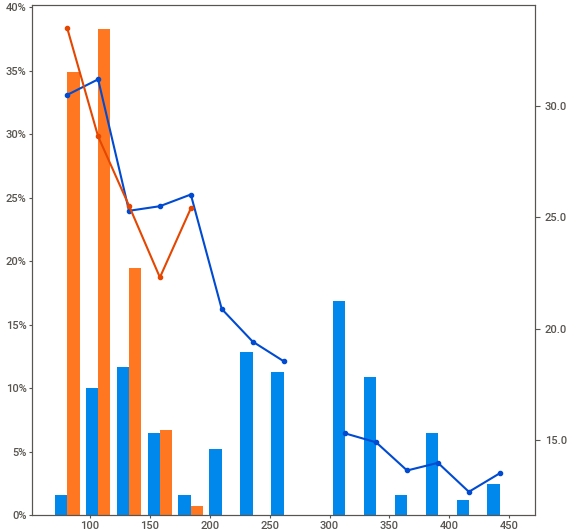
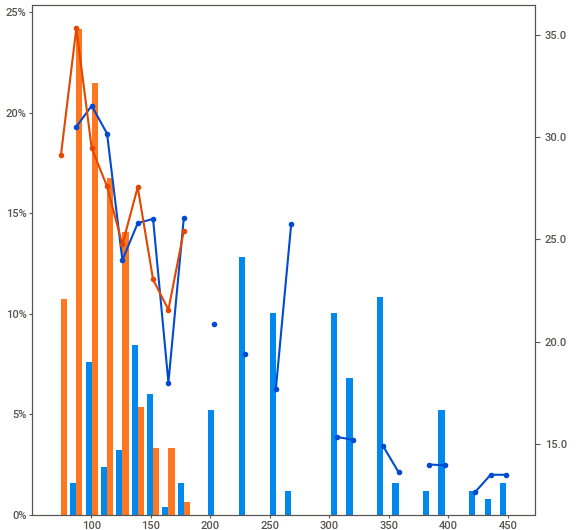
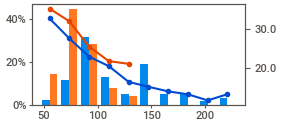
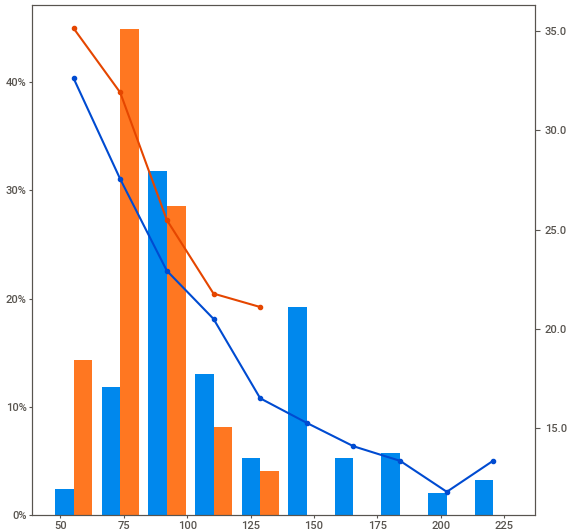
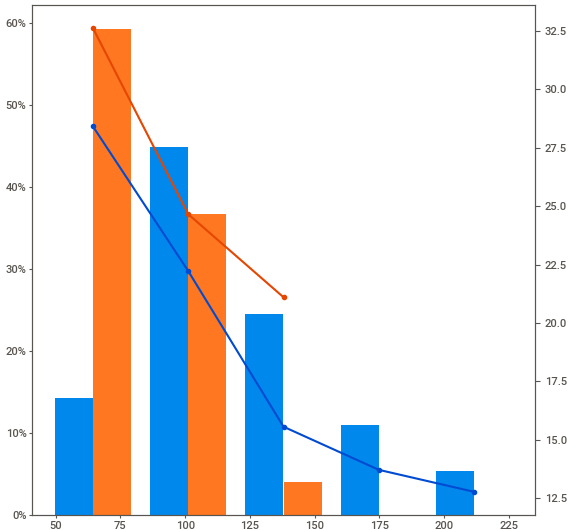
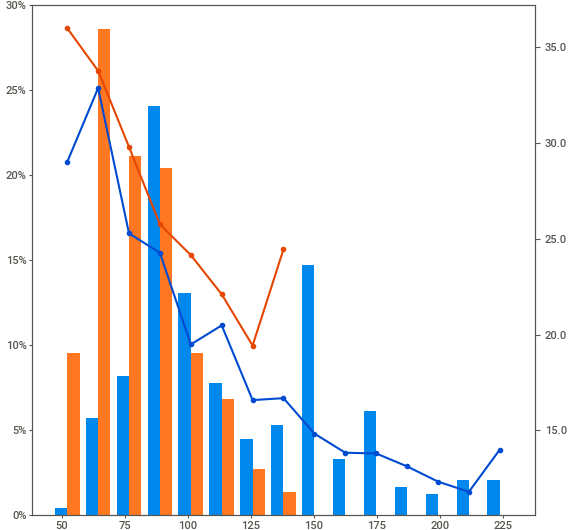
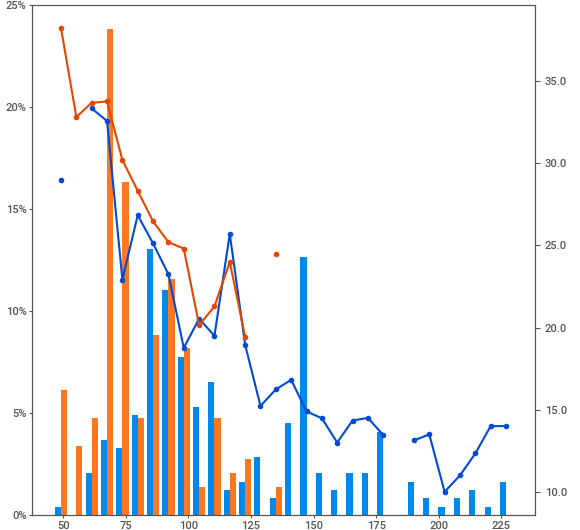
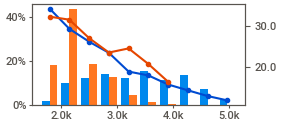
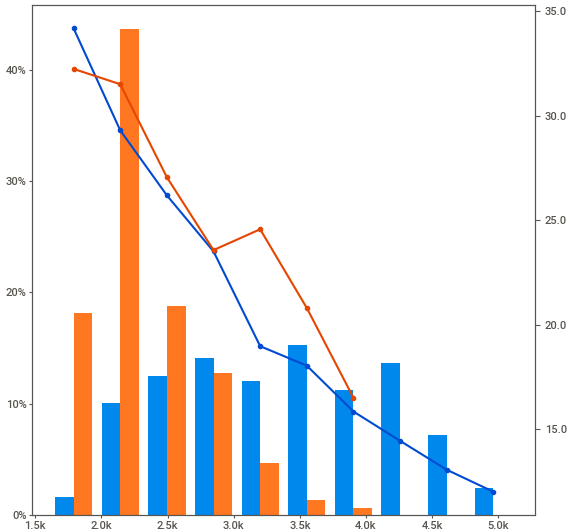
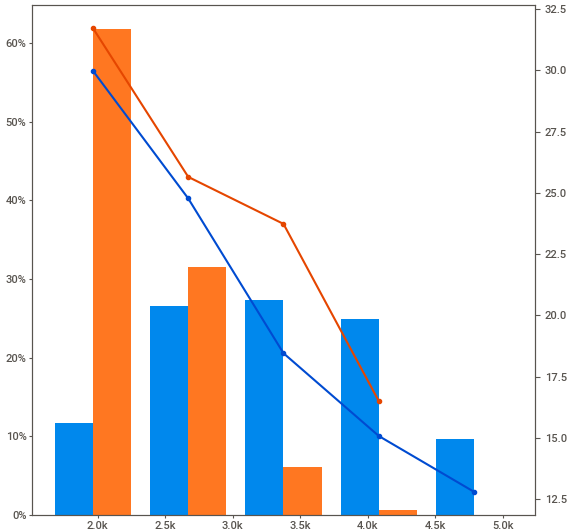
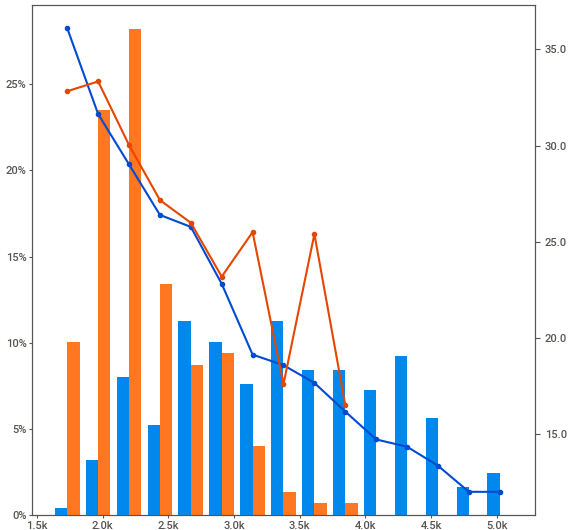
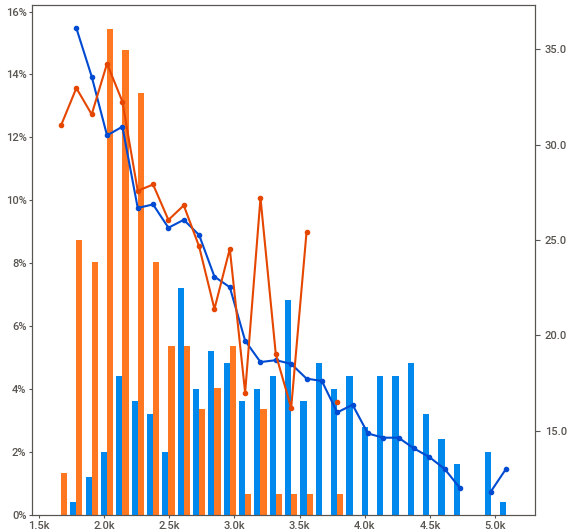
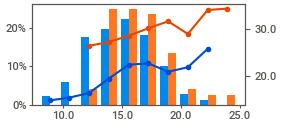
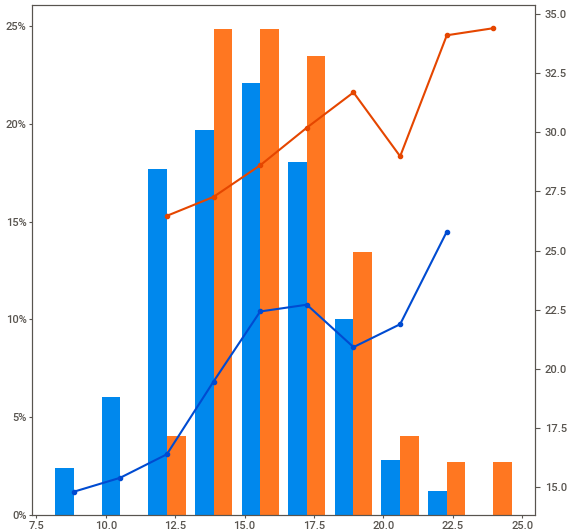
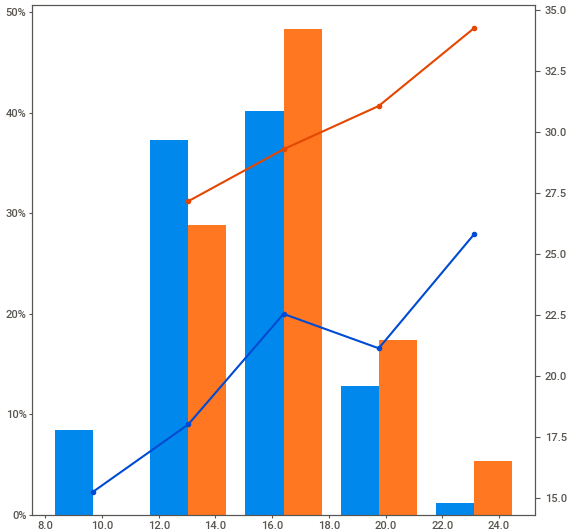
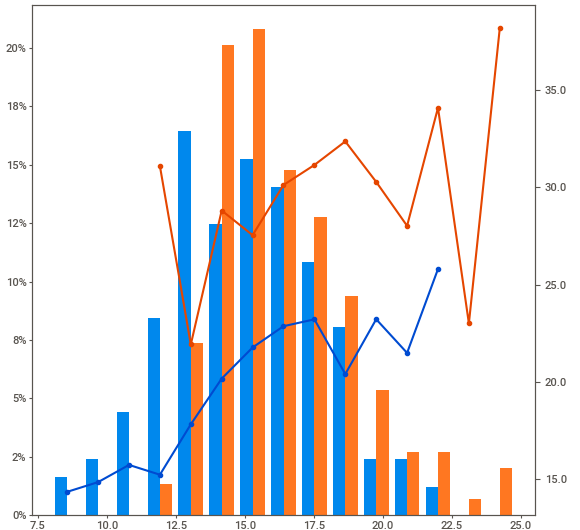
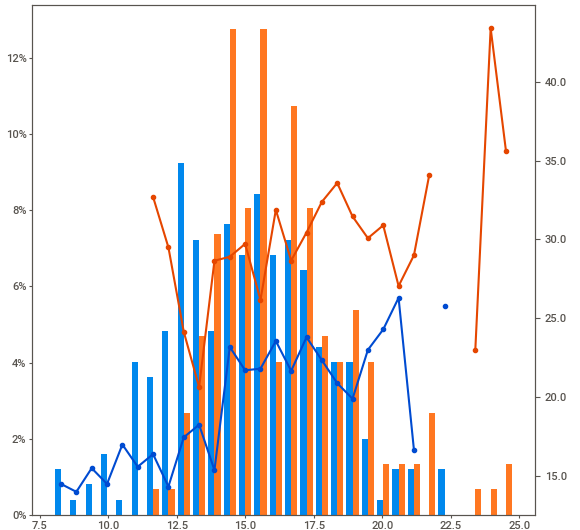
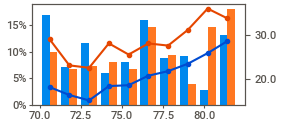
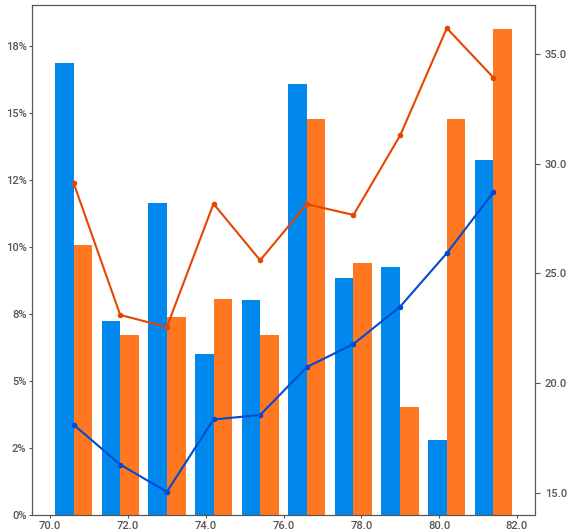
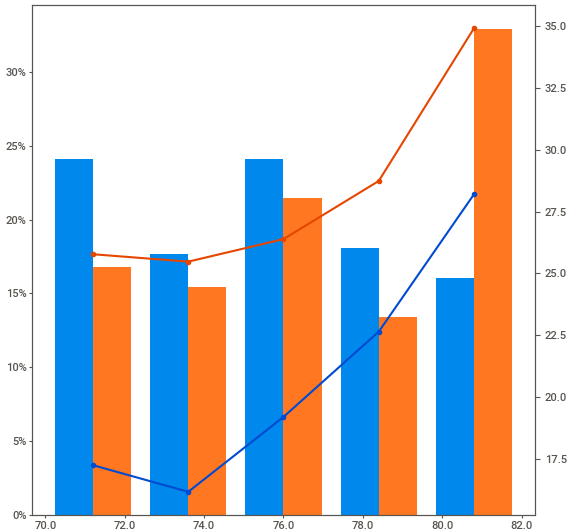
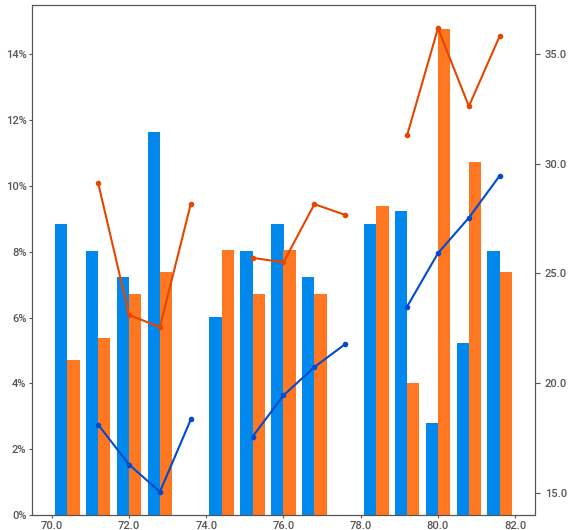
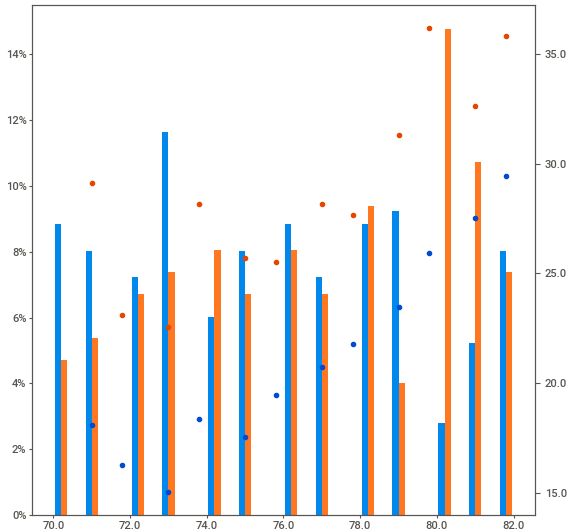
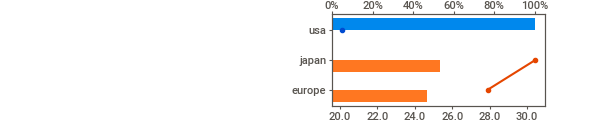
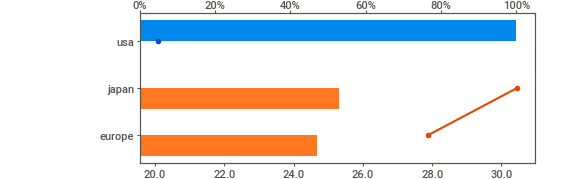
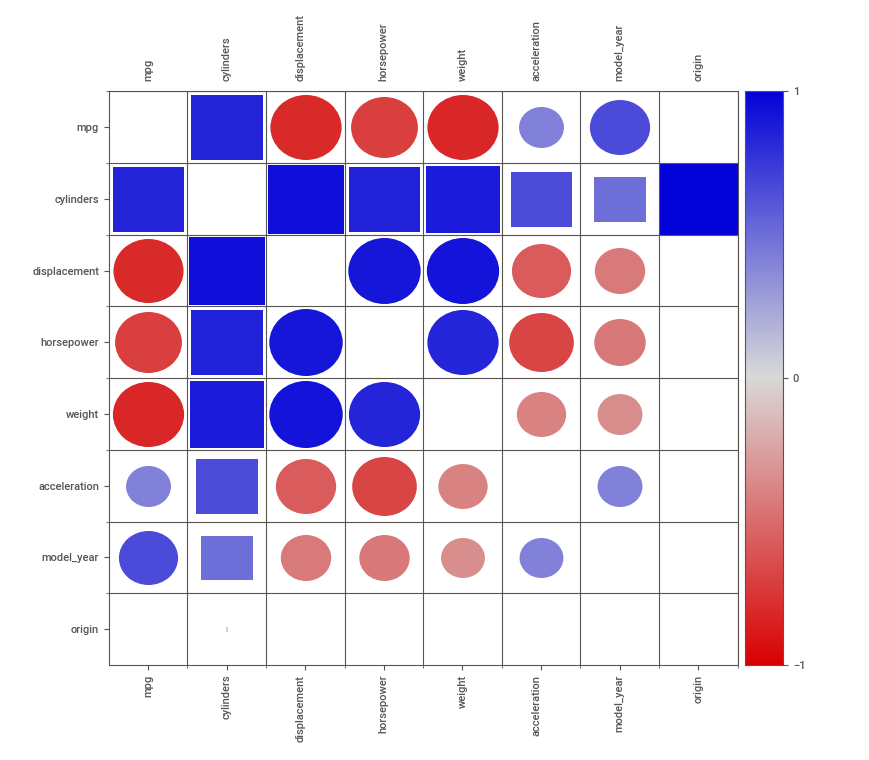
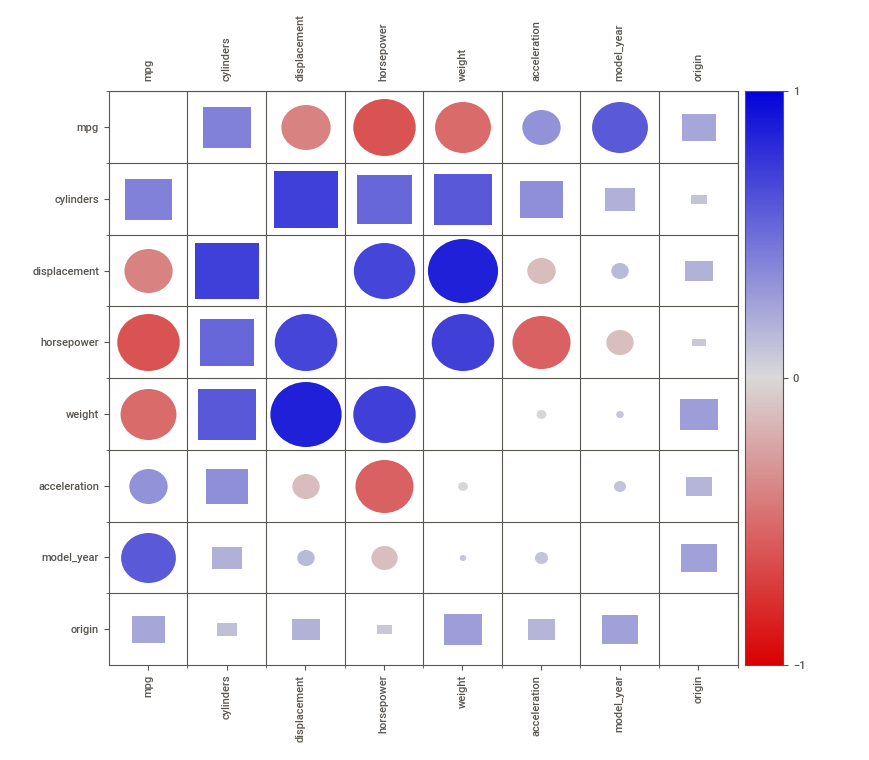

In [44]:
sv_report.show_notebook(w=900, h=450, scale=0.8)